# A. 데이터 전처리

## 1. 라이브러리 호출

In [189]:
import pandas as pd
import numpy as np
import pandas_profiling.profile_report

import re
import seaborn as sns
sns.set(style = 'white')

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, RocCurveDisplay, classification_report, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import RocCurveDisplay

In [2]:
color = ['#ec838a', '#9b9c9a', '#f3babc']

## 2. 데이터 호출

In [3]:
df = pd.read_csv('churn.csv', encoding='euc-kr')
df.head()
# df.profile_report()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

## 3. 데이터 구조 평가

In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [6]:
df.describe()

age  number_of_dependents      zip_code     latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         longitude  number_of_referrals  tenure_in_months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       avg_monthly_long_distance_charges  avg_monthly_gb_download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       total_long_distance_charges  total_revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

- **데이터는 통신사 고객이 평균 32개월동안 머물면서 (tenure in months) 월 64달러를 지불하고 있음(monthly charge)을 대략적으로 나타내고 있음.**

In [7]:
df.dtypes

customer_id                           object
gender                                object
age                                    int64
married                               object
number_of_dependents                   int64
city                                  object
zip_code                               int64
latitude                             float64
longitude                            float64
number_of_referrals                    int64
tenure_in_months                       int64
offer                                 object
phone_service                         object
avg_monthly_long_distance_charges    float64
multiple_lines                        object
internet_service                      object
internet_type                         object
avg_monthly_gb_download              float64
online_security                       object
online_backup                         object
device_protection_plan                object
premium_tech_support                  object
streaming_

##### 열 데이터 유형 확인

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'number_of_dependents', 'zip_code', 'number_of_referrals', 'tenure_in_months', 'total_extra_data_charges'], float64: ['latitude', 'longitude', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_long_distance_charges', 'total_revenue'], object: ['customer_id', 'gender', 'married', 'city', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'customer_status', 'churn_category', 'churn_reason']}

##### 결측치, 중복값 정리

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              7043 non-null   objec

In [10]:
df.duplicated('customer_id', keep=False).sum()

0

In [11]:
df.isnull().sum().to_frame('nan_count')

nan_count
customer_id                                0
gender                                     0
age                                        0
married                                    0
number_of_dependents                       0
city                                       0
zip_code                                   0
latitude                                   0
longitude                                  0
number_of_referrals                        0
tenure_in_months                           0
offer                                      0
phone_service                              0
avg_monthly_long_distance_charges        682
multiple_lines                           682
internet_service                           0
internet_type                           1526
avg_monthly_gb_download                 1526
online_security                         1526
online_backup                           1526
device_protection_plan                  1526
premium_tech_support                    1526
streaming_tv                            1526
streaming_movies                        1526
streaming_music                         1526
unlimited_data                          1526
contract                                   0
paperless_billing                          0
payment_method                             0
monthly_charge                             0
total_charges                              0
total_refunds                              0
total_extra_data_charges                   0
total_long_distance_charges                0
total_revenue                              0
customer_status                            0
churn_category                          5174
churn_reason                            5174

In [12]:
df['avg_monthly_long_distance_charges'] = df['avg_monthly_long_distance_charges'].fillna(round(df['avg_monthly_long_distance_charges'].mean()))
df.multiple_lines = df.multiple_lines.fillna('No Phone Service')

no_internet_service = ['internet_type', 'online_security', 'online_backup', 'device_protection_plan','premium_tech_support',
                       'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']
df[no_internet_service] = df[no_internet_service].fillna('No Internet Service')
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(round(df['avg_monthly_gb_download'].mean()))

In [13]:
df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                   0
phone_service                           0
avg_monthly_long_distance_charges       0
multiple_lines                          0
internet_service                        0
internet_type                           0
avg_monthly_gb_download                 0
online_security                         0
online_backup                           0
device_protection_plan                  0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

In [14]:
df.isna().any()

customer_id                          False
gender                               False
age                                  False
married                              False
number_of_dependents                 False
city                                 False
zip_code                             False
latitude                             False
longitude                            False
number_of_referrals                  False
tenure_in_months                     False
offer                                False
phone_service                        False
avg_monthly_long_distance_charges    False
multiple_lines                       False
internet_service                     False
internet_type                        False
avg_monthly_gb_download              False
online_security                      False
online_backup                        False
device_protection_plan               False
premium_tech_support                 False
streaming_tv                         False
streaming_m

In [15]:
# naCol = df.isna().any()
# naCol = naCol[naCol == True].reset_index()
# noCol = naCol['index'].tolist()
# for col in df.columns[:1]:
#     if col in naCol:
#         if df[col]dtype != 'object':
#             df[col] = df[col].fillna(df[col].mean()).round(0)

##### 고유값 식별

In [16]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}의 고유값 개수 : {df[col].nunique()}')

customer_id의 고유값 개수 : 7043
gender의 고유값 개수 : 2
married의 고유값 개수 : 2
city의 고유값 개수 : 1106
offer의 고유값 개수 : 6
phone_service의 고유값 개수 : 2
multiple_lines의 고유값 개수 : 3
internet_service의 고유값 개수 : 2
internet_type의 고유값 개수 : 4
online_security의 고유값 개수 : 3
online_backup의 고유값 개수 : 3
device_protection_plan의 고유값 개수 : 3
premium_tech_support의 고유값 개수 : 3
streaming_tv의 고유값 개수 : 3
streaming_movies의 고유값 개수 : 3
streaming_music의 고유값 개수 : 3
unlimited_data의 고유값 개수 : 3
contract의 고유값 개수 : 3
paperless_billing의 고유값 개수 : 2
payment_method의 고유값 개수 : 3
customer_status의 고유값 개수 : 3
churn_category의 고유값 개수 : 5
churn_reason의 고유값 개수 : 20


## 4. 대상 변수 분포 확인

In [17]:
df['customer_status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64

## 5. 데이터세트 클리닝

## 6. 누락 데이터 관리 및 재검증

In [18]:
df.isna().any()

customer_id                          False
gender                               False
age                                  False
married                              False
number_of_dependents                 False
city                                 False
zip_code                             False
latitude                             False
longitude                            False
number_of_referrals                  False
tenure_in_months                     False
offer                                False
phone_service                        False
avg_monthly_long_distance_charges    False
multiple_lines                       False
internet_service                     False
internet_type                        False
avg_monthly_gb_download              False
online_security                      False
online_backup                        False
device_protection_plan               False
premium_tech_support                 False
streaming_tv                         False
streaming_m

## 7. 고유값이 2개이하인 데이터 라벨 인코딩

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            print(f'{col} was label encoded.')
print(f'{le_count} columns were label encoded.')

gender was label encoded.
married was label encoded.
phone_service was label encoded.
internet_service was label encoded.
paperless_billing was label encoded.
5 columns were label encoded.


In [20]:
# print(encoder.inverse_transform(df["payment_method"]))

In [21]:
df.head()

customer_id  gender  age  married  number_of_dependents          city  \
0  0002-ORFBO       0   37        1                     0  Frazier Park   
1  0003-MKNFE       1   46        0                     0      Glendale   
2  0004-TLHLJ       1   50        0                     0    Costa Mesa   
3  0011-IGKFF       1   78        1                     0      Martinez   
4  0013-EXCHZ       0   75        1                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  ...   payment_method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  monthly_charge  total_charges  total_refunds total_extra_data_charges  \
0           65.6         593.30           0.00                        0   
1           -4.0         542.40          38.33                       10   
2           73.9         280.85           0.00                        0   
3           98.0        1237.85           0.00                        0   
4           83.9         267.40           0.00                        0   

   total_long_distance_charges total_revenue  customer_status  \
0                       381.51        974.81           Stayed   
1                        96.21        610.28           Stayed   
2                       134.60        415.45          Churned   
3                       361.66       1599.51          Churned   
4                        22.14        289.54          Churned   

    churn_category                   churn_reason  
0              NaN                            NaN  
1              NaN                            NaN  
2       Competitor  Competitor had better devices  
3  Dissatisfaction        Product dissatisfaction  
4  Dissatisfaction            Network reliability  

[5 rows x 38 columns]

# B.데이터 평가

## 8.EDA

### 8-1. 숫자형 변수에 대한 히스토그램

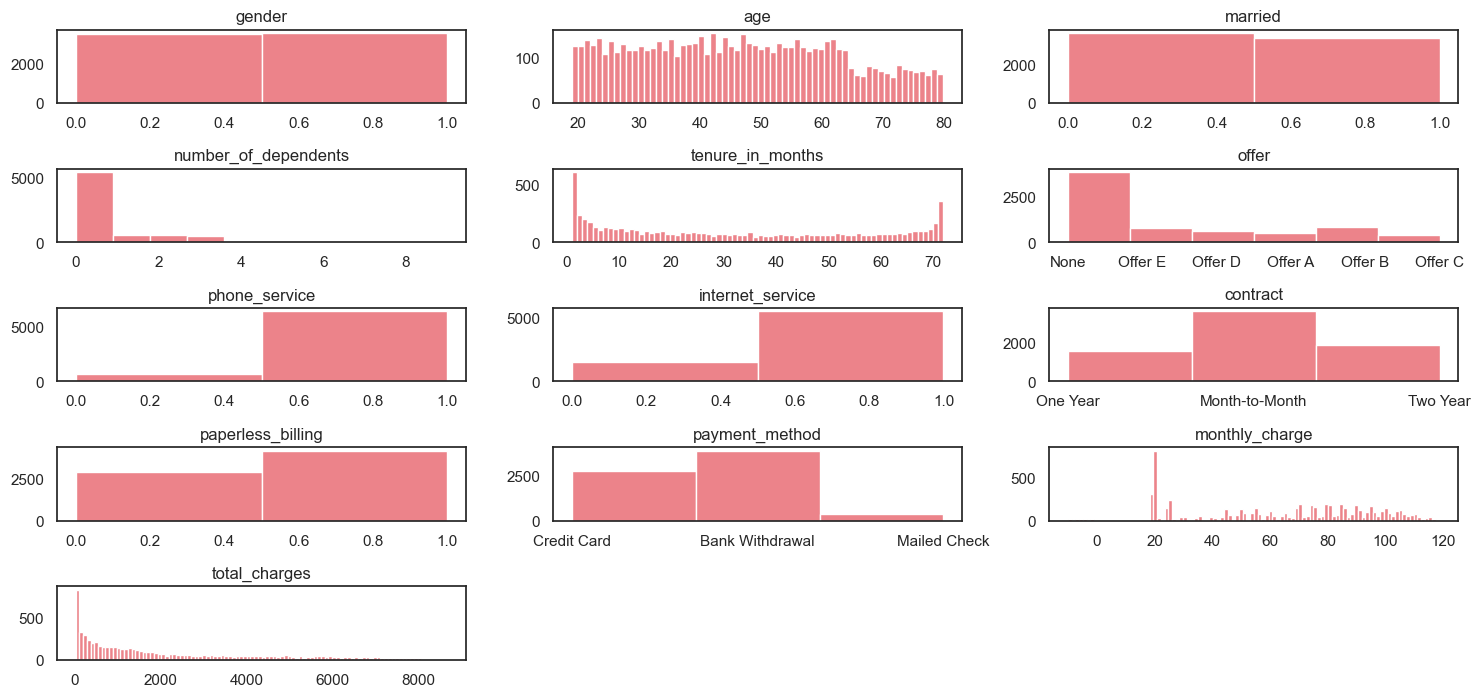

In [22]:
numDf = df[['gender', 'age', 'married', 'number_of_dependents',
           'tenure_in_months', 'offer', 'phone_service',
           'internet_service', 'contract', 'paperless_billing',
            'payment_method', 'monthly_charge', 'total_charges']]

fig = plt.figure(figsize = (15,12))
plt.title("Histograms of Numerical Columns")
for i in range(numDf.shape[1]):
    plt.subplot(8, 3, i+1)
    ax = plt.gca()
    ax.set_title(numDf.columns.values[i])
    
    # 고유값 개수만큼 막대바 설정해주기 + 고유값이 100개 이상이면 100으로 binning
    vals = np.size(numDf.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(numDf.iloc[:, i], bins = vals, color = color[0])

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 성별 분포: 남성과 여성 고객의 상대적으로 동일한 비율 특성
- 나이 분포: 대부분의 고객이 젊은 고객층 (Senior 고객층 65세 이상의 고객이 상대적으로 적음)
- 기혼 분포: 거의 절반이 파트너가 있는 반면, 부양 가족이 없는 고객이 많음
- 고객 분포: 10개월 이하의 신규 고객이 많고, 그 다음은 평균 70개월 이상 유지되는 충성 고객 존재
- 서비스 분포: 대다수의 고객의 전화 서비스를 사용하고, 그 중 3/4는 종이 없는 청구를 선택함. 절반 이상의 고객이 월 계약 선택함.
- 월별 요금은 약 20달러 - 120달러 사이로, 평균적으로 20달러 세그먼트에 있음.

In [23]:
df['age'] = df['age'].apply(lambda x: 1 if x >= 65 else 0)

### 8-2. 범주형 변수에 대한 히스토그램

#### 8-2. 1. 계약 유형

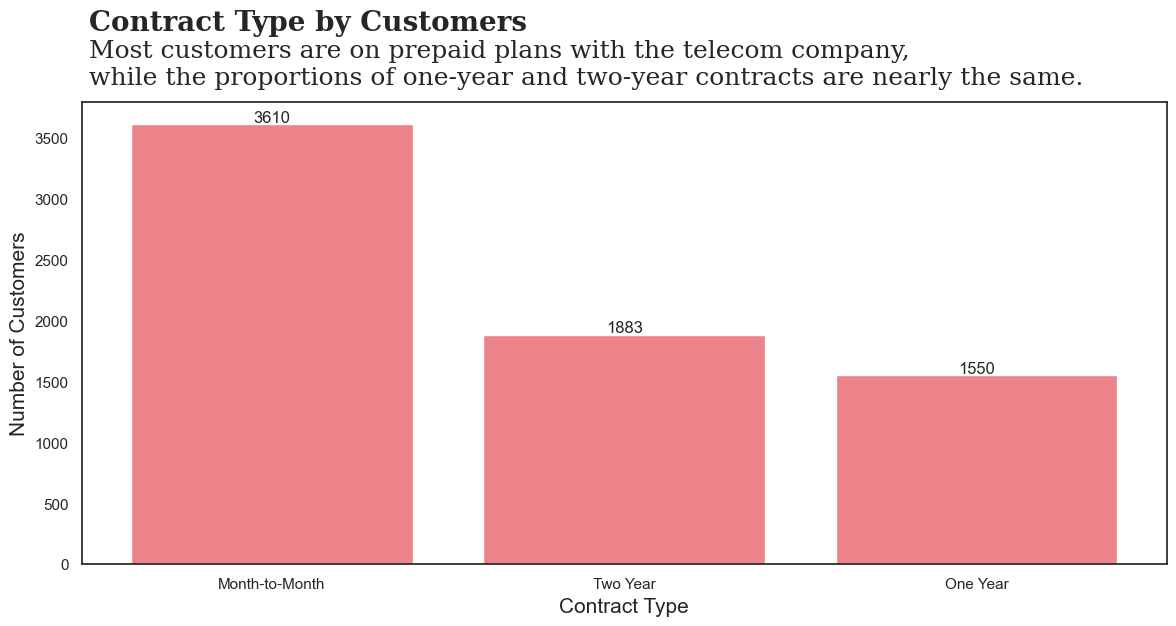

In [24]:
contract = df['contract'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Contract Type by Customers', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Most customers are on prepaid plans with the telecom company, \nwhile the proportions of one-year and two-year contracts are nearly the same."
, fontsize=18, fontweight='light', fontfamily='serif')

bars = ax.bar(contract.index, contract.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Contract Type', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

대부분의 고객은 통신사와 선불 연결을 하고 있는 반면, 1년 계약과 2년 계약 고객 비율은 거의 같습니다.

#### 8-2. 2. 결제 유형

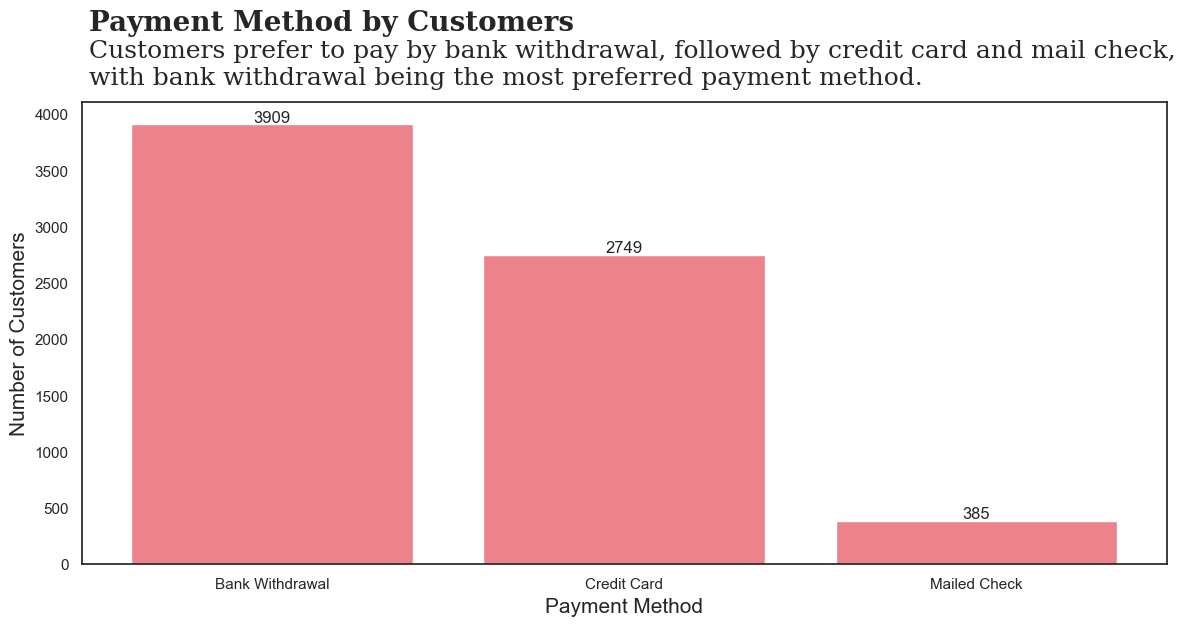

In [25]:
payment = df['payment_method'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Payment Method by Customers', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Customers prefer to pay by bank withdrawal, followed by credit card and mail check, \nwith bank withdrawal being the most preferred payment method."
, fontsize=18, fontweight='light', fontfamily='serif')

bars = ax.bar(payment.index, payment.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Payment Method', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

데이터 세트에 따르면 고객은 은행 송금, 신용 카드 및 메일 수표 순의 지불을 선호하며 가장 선호하는 것은 은행 송금으로 지불하는 것을 말해 주고 있습니다.

#### 8-2. 3. 서비스

In [26]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

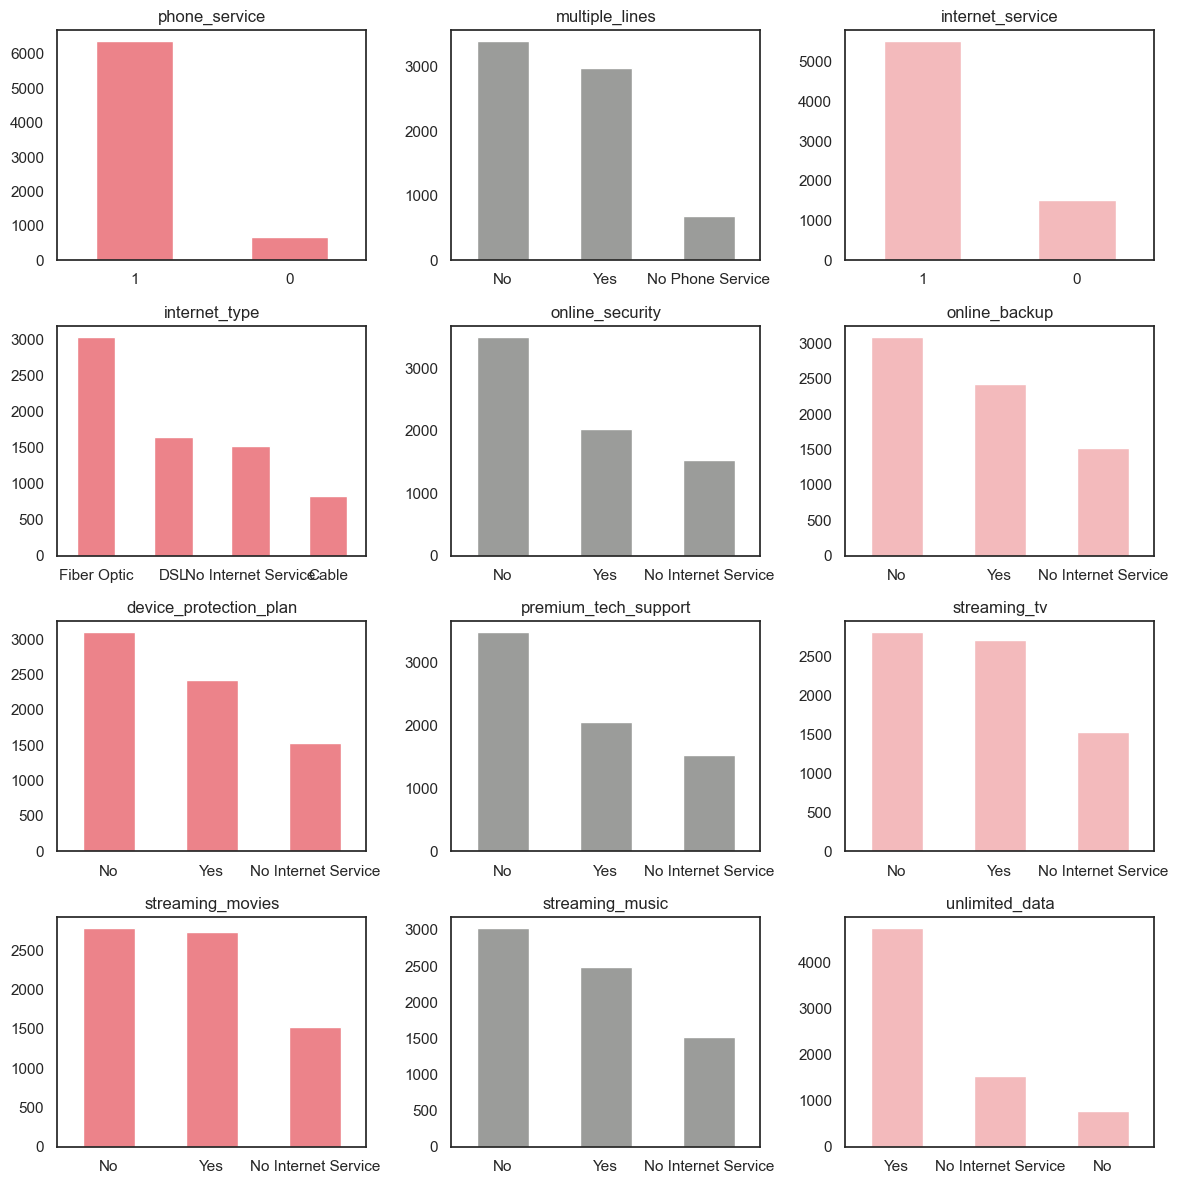

In [27]:
service = df[['phone_service', 'multiple_lines',
       'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data']]
service.head()

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (12,12))
for i, item in enumerate(service):
    ax = axes[i // 3, i % 3]
    df[item].value_counts().plot(kind='bar', ax=ax, rot=0, color=color[i % len(color)])
    ax.set_title(item)

plt.tight_layout()
plt.show()

- Most customers use phone service, with nearly half of them using multiple lines.
- Three-quarters of customers choose internet services through Fiber Optic and DSL connections. Nearly half of internet users subscribe to streaming TV, movie, and music services, and most people use unlimited data.
- Only a small number of customers use online backup, device protection, technical support, and online security features.

- 대부분의 고객은 전화 서비스를 이용하고 있으며 그 중 거의 절반이 여러 회선을 사용합니다.
- 고객의 3/4은 Fiber Optic 및 DSL 연결을 통한 인터넷 서비스를 선택했으며 인터넷 사용자의 거의 절반이 스트리밍 TV, 영화, 음악 서비스에 가입했고, 대부분의 사람이 무제한 데이터를 이용하고 있습니다.
- 온라인 백업, 장치 보호, 기술 지원 및 온라인 보안 기능을 사용한 고객은 소수입니다.

### 8-3. 범주형 변수로 이탈률 분석

#### 8-3. 1. 전체 고객 이탈 및 유지

In [28]:
customer = df['customer_status'].value_counts()
customerRatio = customer / df.shape[0] * 100
print(customer)
print(customerRatio)

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64
Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: customer_status, dtype: float64


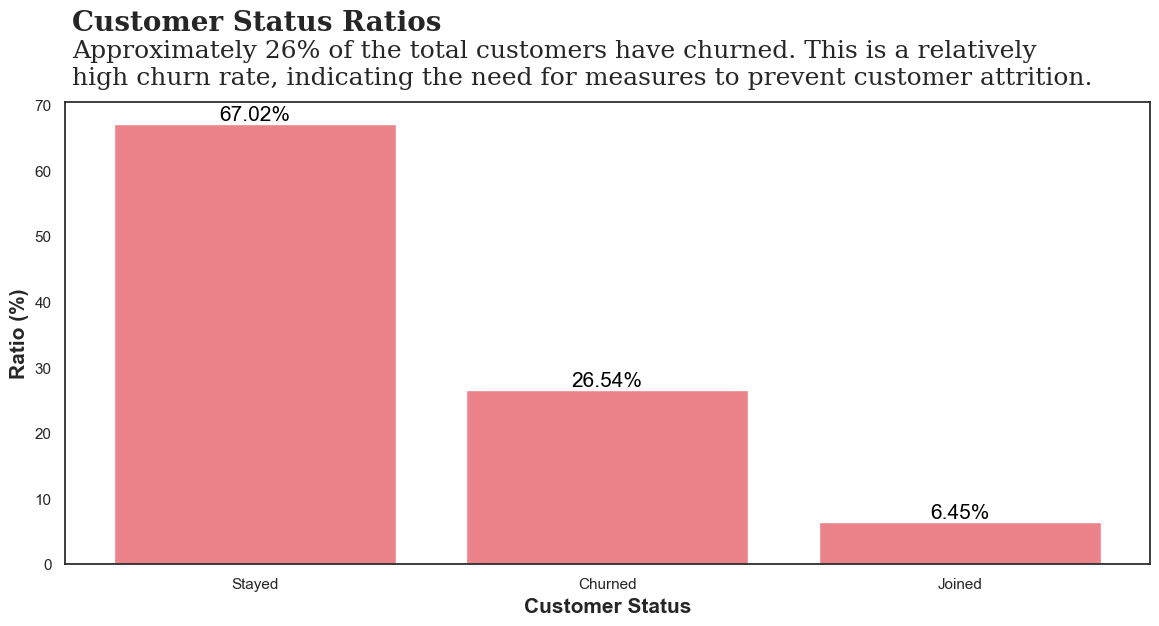

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Customer Status Ratios', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Approximately 26% of the total customers have churned. This is a relatively \nhigh churn rate, indicating the need for measures to prevent customer attrition."
, fontsize=18, fontweight='light', fontfamily='serif')
bars = ax.bar(customer.index, customerRatio, color=color[0])

for bar, ratio in zip(bars, customerRatio):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{ratio:.2f}%', 
             ha='center', va='bottom', fontsize=15, color='black')

plt.xlabel('Customer Status', fontsize=15, fontweight='bold')
plt.ylabel('Ratio (%)', fontsize=15, fontweight='bold')
plt.show()

전체 이탈률을 예비적으로 살펴보면 약 74%의 고객이 활성 상태임을 알 수 있습니다. 이것은 불균형 분류 문제입니다. 기계 학습 알고리즘은 각 클래스의 인스턴스 수가 거의 동일할 때 잘 작동합니다. 데이터 세트가 왜곡되어 있으므로 모델 선택을 위한 메트릭을 선택할 때 이 를 염두에 두어야 합니다.

##### 8-3. 1-1. 신규고객, 이탈고객, 충성고객의 월별 요금 확인

In [30]:
df.groupby('customer_status')['monthly_charge'].describe()

count       mean        std   min      25%     50%    75%  \
customer_status                                                               
Churned          1869.0  73.347592  26.373764 -10.0  55.3000  79.500  94.20   
Joined            454.0  42.775991  24.612329  -8.0  20.1625  43.975  64.35   
Stayed           4720.0  61.737415  32.198758 -10.0  25.1000  65.600  89.55   

                    max  
customer_status          
Churned          118.35  
Joined           107.95  
Stayed           118.75

In [31]:
median = df.groupby('customer_status')['monthly_charge'].median()
median

customer_status
Churned    79.500
Joined     43.975
Stayed     65.600
Name: monthly_charge, dtype: float64

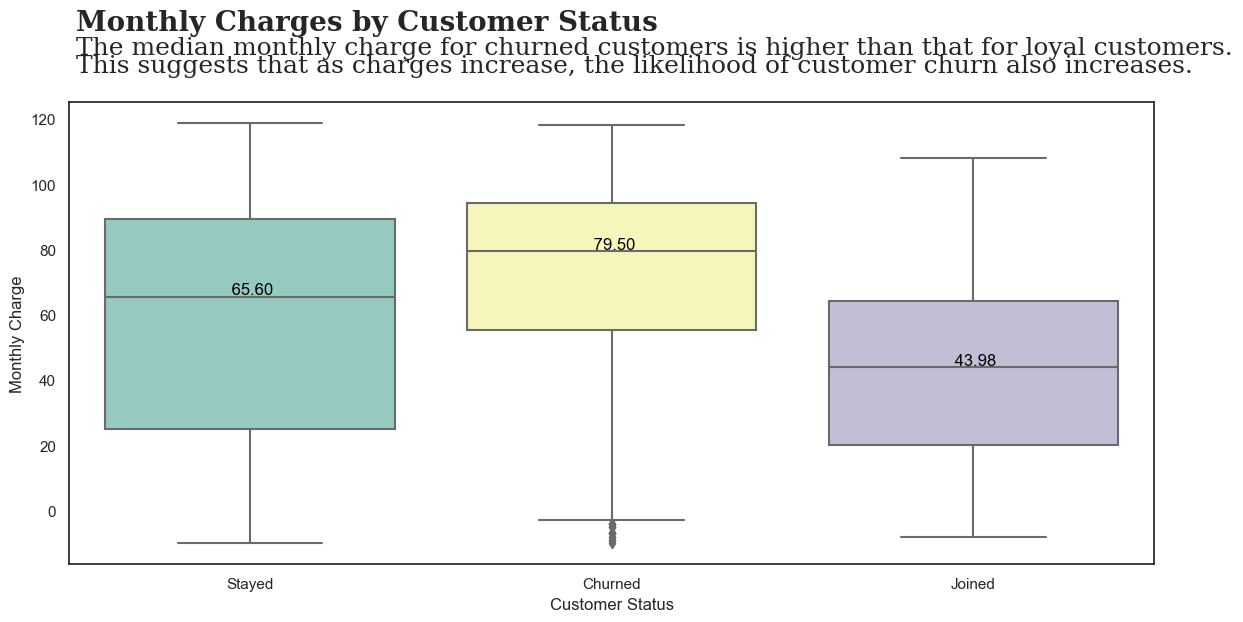

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Monthly Charges by Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.96, 
         "The median monthly charge for churned customers is higher than that for loyal customers."
         , fontsize=18, fontweight='light', fontfamily='serif')
fig.text(0.13, 0.93, 
         "This suggests that as charges increase, the likelihood of customer churn also increases."
         , fontsize=18, fontweight='light', fontfamily='serif')

box = sns.boxplot(data = df, x = 'customer_status', y = 'monthly_charge', palette='Set3')
order = box.get_xticklabels()
order = [label.get_text() for label in order]
median = median.reindex(order)

for status in median.index:
    val = median[status]
    x = list(median.index).index(status)
    plt.text(x = x, y = val+2, s = f'{val : .2f}', 
             ha = 'center', va = 'center', color = 'black', fontsize = 12
            )

plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.show()

##### 고객 이탈 및 유지
1. **이탈 고객 비율**: 전체 고객의 약 26%가 이탈했습니다. 이는 비교적 높은 이탈율로, 회사는 이탈을 방지하기 위한 대책이 필요합니다.
2. **이탈 고객의 월별 요금**: 이탈 고객의 월별 요금 중앙값이 충성 고객의 월별 요금 중앙값보다 높습니다. 이는 요금이 높아질수록 고객이 이탈할 가능성이 높다는 것을 시사합니다.
3. **신규 가입 고객 비율**: 전체 고객의 약 6%가 신규 가입했습니다. 이는 이탈률에 비해 낮은 비율로, 신규 고객 유치를 위한 전략이 필요합니다.

##### 고객 이탈로 인한 손실
- **고객 생애 가치 (CLV)**: 고객이 기업과 관계를 유지하는 동안 발생하는 총 매출
1. **이탈 고객 비율을 낮추는 전략**: 이탈 고객으로 인한 손실이 크다면, 이탈을 방지하기 위한 전략을 우선시하는 것이 효과적일 수 있습니다. 이를 위해 이탈 원인을 분석하고, 고객 생애 가치(CLV)를 높이는 방법을 모색해볼 수 있습니다.
2. **신규 가입 고객 비율을 높이는 전략**: 만약 신규 고객 유치 비용이 낮고, 신규 고객의 CLV가 높다면, 신규 가입 고객 비율을 높이는 전략도 고려할 수 있습니다.

##### 8-3. 1-2. 전체 매출과 이탈 고객으로 인한 손실

In [33]:
customerRevenue = df.groupby('customer_status')['total_charges'].sum()
totalRevenue = customerRevenue.sum()

churnLoss = customerRevenue['Churned'] / totalRevenue * 100

print(f"이탈 고객으로 인한 손실 비율: {churnLoss:.2f}%")
print(f"전체 매출: {totalRevenue:.2f}")
print(f"이탈 고객 매출: {customerRevenue['Churned']:.2f}")
print(f"신규 가입 고객 매출: {customerRevenue['Joined']:.2f}")
print(f"충성 고객 매출: {customerRevenue['Stayed']:.2f}")

이탈 고객으로 인한 손실 비율: 17.83%
전체 매출: 16060725.24
이탈 고객 매출: 2862926.90
신규 가입 고객 매출: 35998.90
충성 고객 매출: 13161799.44


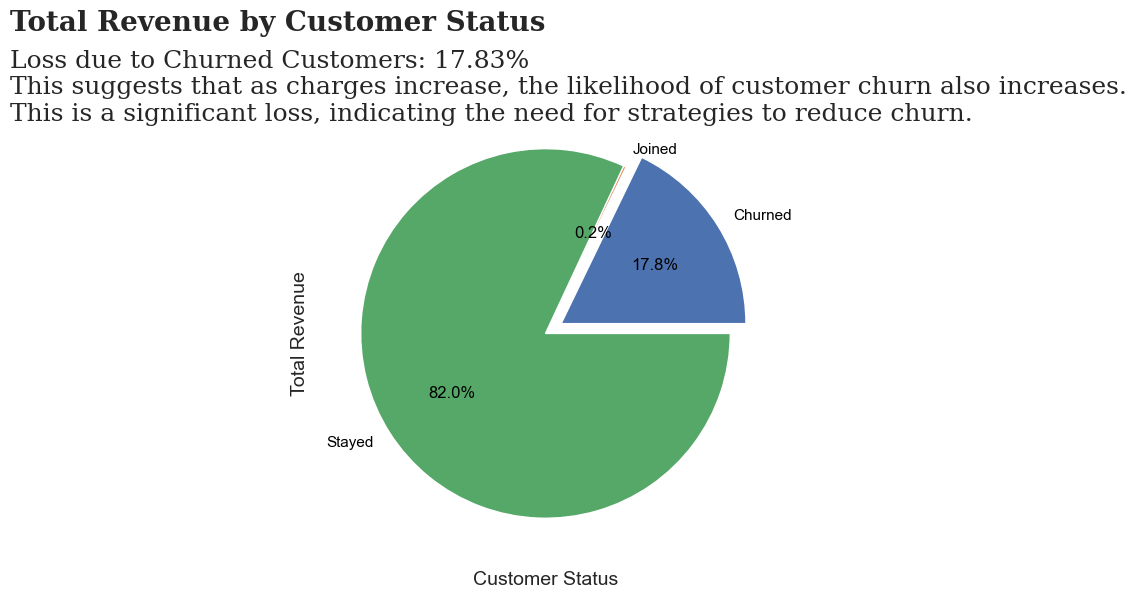

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Total Revenue by Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.85, 
         f'Loss due to Churned Customers: {churnLoss:.2f}% \nThis suggests that as charges increase, the likelihood of customer churn also increases. \nThis is a significant loss, indicating the need for strategies to reduce churn.'
         , fontsize=18, fontweight='light', fontfamily='serif')


labels = customerRevenue.index
sizes = customerRevenue.values

explode = [0.1 if label == 'Churned' else 0 for label in labels]

ax.pie(sizes, labels=labels, autopct='%1.1f%%', # counterclock = False,
       startangle=0, textprops=dict(color="black"), explode=explode)

ax.set_xlabel('Customer Status', fontsize=14)
ax.set_ylabel('Total Revenue', fontsize=14)

plt.show()


##### 8-3. 1-3. 결론
- **이탈 고객으로 인해 회사는 전체 매출의 약 17%를 잃었습니다. 이탈 고객이 지불한 총 요금은 약 286만 달러로, 이들 고객을 유지했을 때 회사의 수익에 크게 기여할 수 있었을 것입니다. 이는 상당한 손실이며, 이탈을 줄이기 위한 대책이 필요합니다. 뿐만 아니라, 신규 고객 유치 비용이 이탈을 줄이는 비용보다 많이 들고, 신규 고객의 CLV가 유의미하게 높지 않기에 이탈 원인을 분석하고 CLV를 높이는 방법을 모색하여 이탈 고객 비율을 낮추는 전략을 고려해야 합니다.**
- **신규 고객 + 유지 고객, 이탈 고객으로 목적 변수 변경**

In [35]:
df['churn'] = np.where(df['customer_status'] == 'Churned', 1, 0)
df = df.drop(columns=['customer_status'])
df.head()

customer_id  gender  age  married  number_of_dependents          city  \
0  0002-ORFBO       0    0        1                     0  Frazier Park   
1  0003-MKNFE       1    0        0                     0      Glendale   
2  0004-TLHLJ       1    0        0                     0    Costa Mesa   
3  0011-IGKFF       1    1        1                     0      Martinez   
4  0013-EXCHZ       0    1        1                     0     Camarillo   

   zip_code   latitude   longitude  number_of_referrals  ...   payment_method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  monthly_charge  total_charges  total_refunds total_extra_data_charges  \
0           65.6         593.30           0.00                        0   
1           -4.0         542.40          38.33                       10   
2           73.9         280.85           0.00                        0   
3           98.0        1237.85           0.00                        0   
4           83.9         267.40           0.00                        0   

   total_long_distance_charges total_revenue   churn_category  \
0                       381.51        974.81              NaN   
1                        96.21        610.28              NaN   
2                       134.60        415.45       Competitor   
3                       361.66       1599.51  Dissatisfaction   
4                        22.14        289.54  Dissatisfaction   

                    churn_reason churn  
0                            NaN     0  
1                            NaN     0  
2  Competitor had better devices     1  
3        Product dissatisfaction     1  
4            Network reliability     1  

[5 rows x 38 columns]

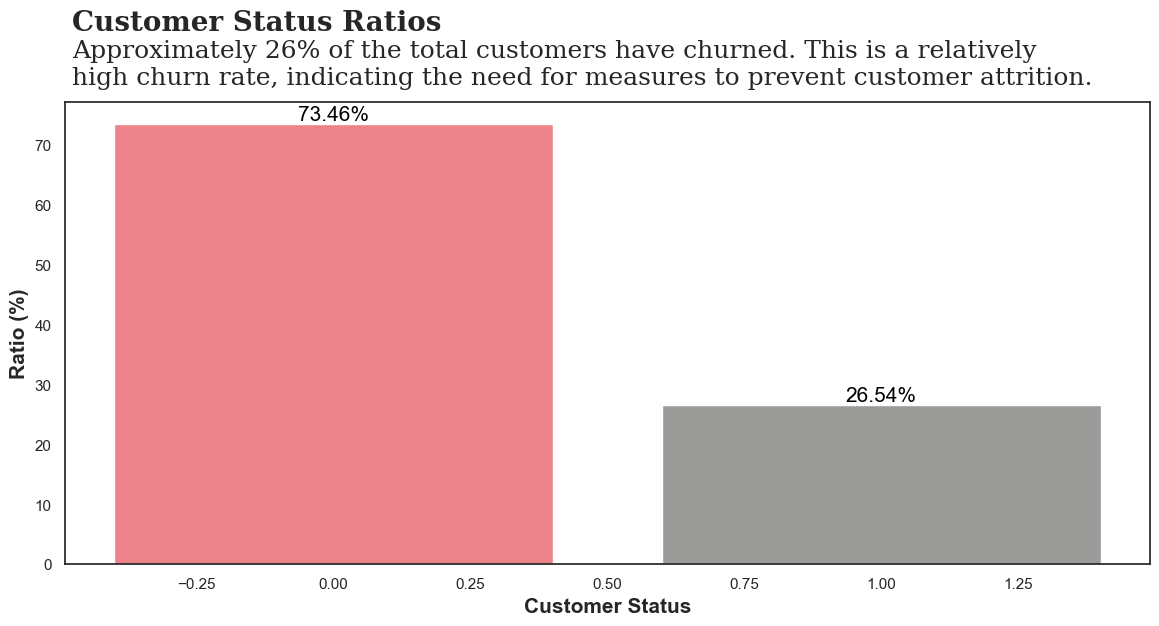

In [36]:
customer = df['churn'].value_counts()
customerRatio = customer / df.shape[0] * 100

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

fig.text(0.13, 1, 'Customer Status Ratios', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
"Approximately 26% of the total customers have churned. This is a relatively \nhigh churn rate, indicating the need for measures to prevent customer attrition."
, fontsize=18, fontweight='light', fontfamily='serif')
bars = ax.bar(customer.index, customerRatio, color=color[:2])

for bar, ratio in zip(bars, customerRatio):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{ratio:.2f}%', 
             ha='center', va='bottom', fontsize=15, color='black')

plt.xlabel('Customer Status', fontsize=15, fontweight='bold')
plt.ylabel('Ratio (%)', fontsize=15, fontweight='bold')
plt.show()

월 단위 연결 고객은 1년 계약 또는 2년 계약 고객에 비해 이탈할 확률이 높습니다.

#### 8-3. 2. 이탈 원인 분석

##### 8-3. 2-1. 이탈 원인 카테고리 그래프

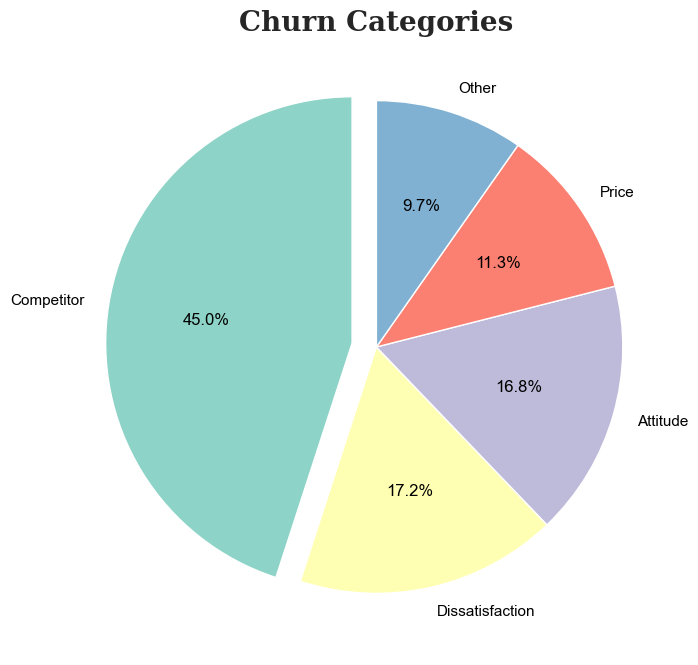

In [37]:
churnCategory = df[df['churn'] == 1]['churn_category'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,8))
explode = [0.1 if category == 'Competitor' else 0 for category in churnCategory.index]

wedges, texts, autotexts = ax.pie(churnCategory, labels = churnCategory.index,
                                  autopct = '%1.1f%%', startangle = 90, explode = explode,
                                  colors = sns.color_palette('Set3'),
                                  textprops = dict(color = 'black'))
ax.set_title('Churn Categories', fontsize = 20, fontweight = 'bold', fontfamily = 'serif')

# fig, axes = plt.subplots(len(churnCategory), 1, figsize = (8, len(churnCategory)*6))

# fig.subplots_adjust(hspace=0.5, top=0.95)

# for ax, category in zip(axes, churnCategory.index):
#     categoryData = df[(df['customer_status'] == 'Churned') & (df['churn_category'] == category)]
#     churnReason = categoryData['churn_reason'].value_counts()
#     reasonRatio = churnReason / churnReason.sum() * 100
    
#     wedges, texts, autotexts = ax.pie(churnReason, labels=churnReason.index, autopct='%1.1f%%', 
#                                       startangle=90, colors=sns.color_palette('Set3'), textprops=dict(color="black"))
#     ax.set_title(f'Churn Reasons for {category}', fontsize=16)

# fig.suptitle('Churn Categories and Reasons', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

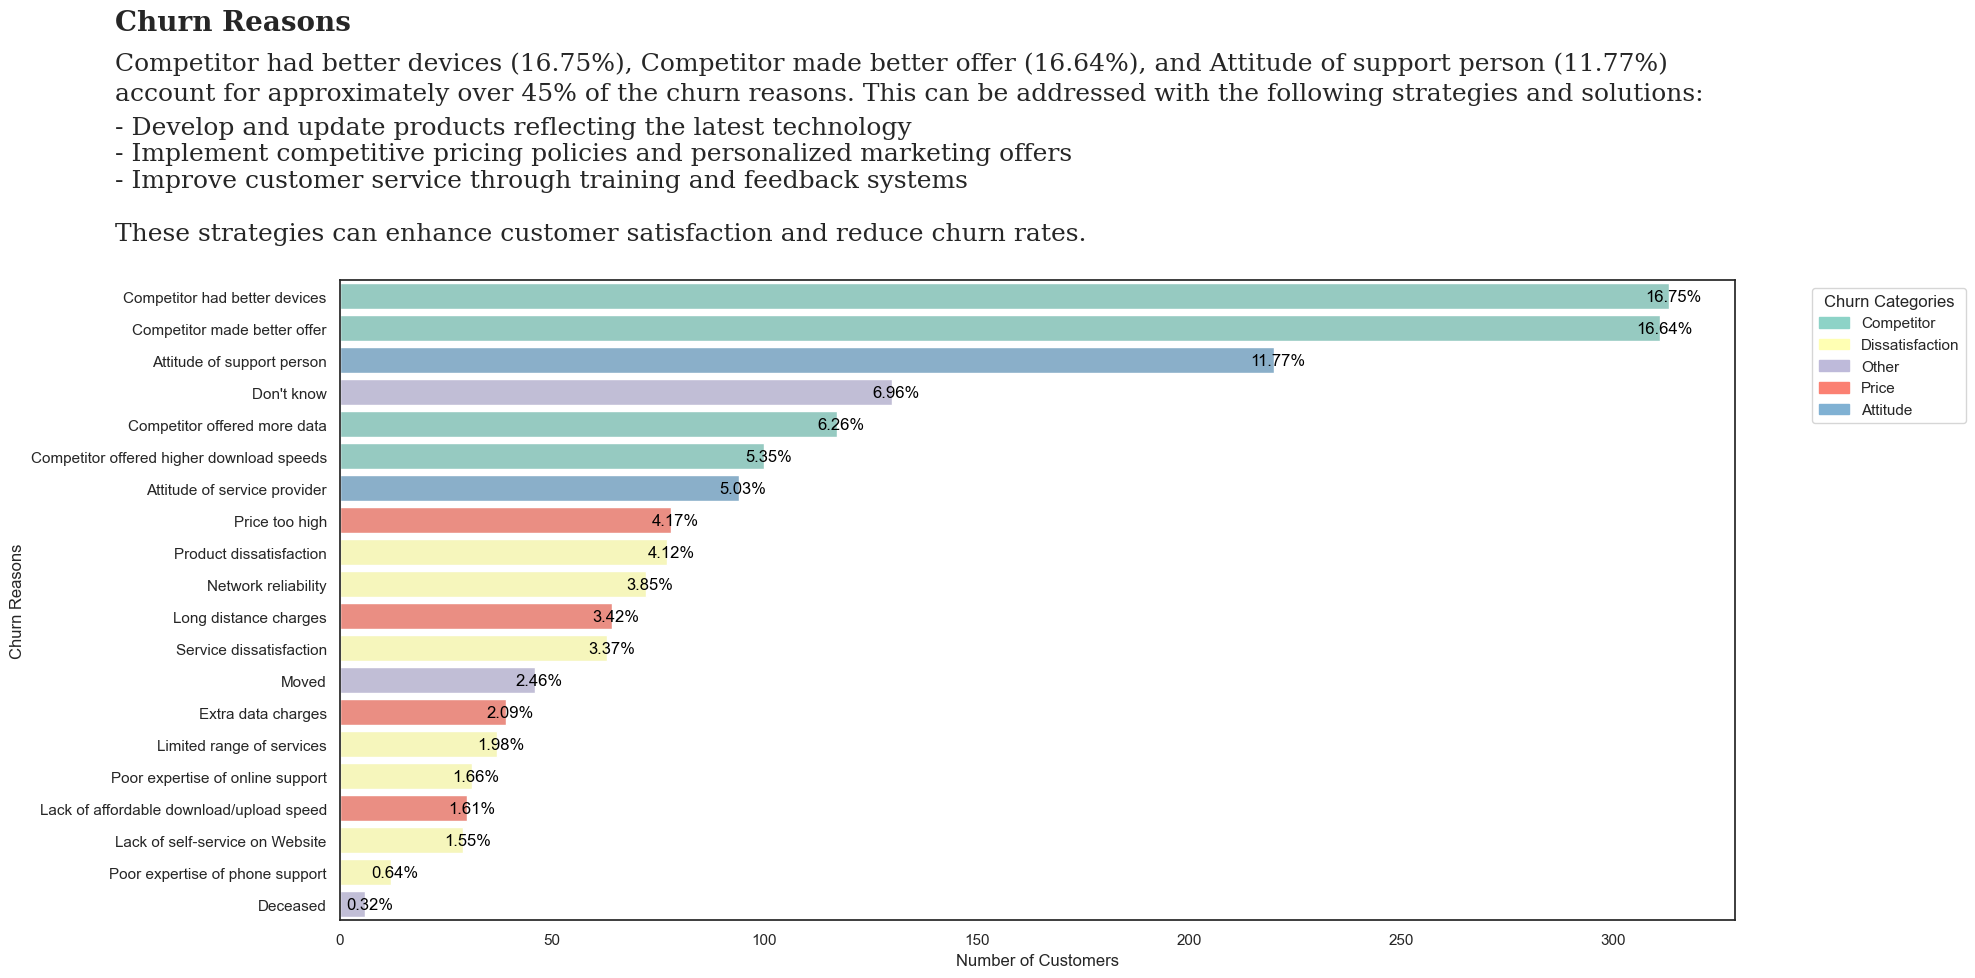

In [38]:
churnReason = df[df['churn'] == 1]['churn_reason'].dropna().value_counts()
reasonRatio = churnReason / churnReason.sum() * 100
top3 = reasonRatio.head(3)

# 이탈 원인별 카테고리 매핑
reaCatMapping = df[df['churn'] == 1][['churn_reason', 'churn_category']].dropna().drop_duplicates().set_index('churn_reason').to_dict()['churn_category']

# 이탈 원인에 대한 카테고리 컬러 설정
palette = sns.color_palette('Set3', n_colors=len(df['churn_category'].dropna().unique()))
colorMapping = {category: color for category, color in zip(df['churn_category'].dropna().unique(), palette)}
colors = [colorMapping[reaCatMapping[reason]] for reason in churnReason.index]

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
fig.subplots_adjust(top=0.75)

fig.text(0.00, 1, 'Churn Reasons', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.00, 0.96, 
         f'{top3.index[0]} ({top3.values[0]:.2f}%), {top3.index[1]} ({top3.values[1]:.2f}%), and {top3.index[2]} ({top3.values[2]:.2f}%)'
         , fontsize=18, fontweight='light', fontfamily='serif')

fig.text(0.00, 0.93, 
         f'account for approximately over {int(sum(top3.values))}% of the churn reasons. This can be addressed with the following strategies and solutions: '
         , fontsize=18, fontweight='light', fontfamily='serif')

fig.text(0.00, 0.79, 
         "\n- Develop and update products reflecting the latest technology \n- Implement competitive pricing policies and personalized marketing offers \n- Improve customer service through training and feedback systems \n\nThese strategies can enhance customer satisfaction and reduce churn rates."
         , fontsize=18, fontweight='light', fontfamily='serif')

sns.barplot(y=churnReason.index, x=churnReason.values, palette=colors)

for i, (count, percent) in enumerate(zip(churnReason, reasonRatio)):
    plt.text(count + 1, i, f'{percent:.2f}%', ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Number of Customers')
plt.ylabel('Churn Reasons')

# 범례 추가
handles = [plt.Rectangle((0,0),1,1, color=colorMapping[category]) for category in colorMapping]
labels = list(colorMapping.keys())
plt.legend(handles, labels, title="Churn Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [39]:
df = df.drop(columns = ['churn_category', 'churn_reason'])
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn'],
      dtype='object')

##### 8-3. 2-2. 이탈 원인
경쟁사의 더 나은 디바이스와 마케팅 제안, 그리고 고객 서비스의 태도가 이탈 원인의 45% 이상을 차지합니다. 이는 다음과 같은 전략과 솔루션을 통해 해결할 수 있습니다:

- 최신 기술을 반영한 제품 개발 및 업데이트
- 경쟁력 있는 가격 정책과 맞춤형 마케팅 제안
- 고객 서비스 개선을 위한 교육 및 피드백 시스템 도입

이러한 전략을 통해 고객 만족도를 높이고 이탈율을 감소시킬 수 있을 것입니다.

**Insights** <br/>
1. 경쟁사가 더 좋은 디바이스를 가지고 있다:

- 이탈 원인: 고객들이 더 나은 기술과 기능을 제공하는 경쟁사의 디바이스로 이동하고 있습니다.
- 전략/솔루션:
    - 제품 개선: 최신 기술과 기능을 갖춘 새로운 디바이스를 개발하여 고객의 요구를 충족시킵니다.
    - 제품 업데이트: 기존 제품의 성능을 향상시키고 소프트웨어 업데이트를 통해 새로운 기능을 추가합니다.
    - 파트너십: 최신 디바이스를 제공하는 기업과의 파트너십을 통해 다양한 제품을 고객에게 제공할 수 있도록 합니다.
    
    
2. 경쟁사가 더 좋은 마케팅 제안을 한다:

- 이탈 원인: 경쟁사가 더 매력적인 가격, 혜택, 또는 서비스 조건을 제시하여 고객을 유치하고 있습니다.
- 전략/솔루션:
    - 가격 경쟁력: 경쟁력 있는 가격 정책을 도입하고, 할인 및 프로모션을 통해 고객의 관심을 끌어냅니다.
    - 맞춤형 제안: 고객의 데이터를 분석하여 개인화된 마케팅 제안을 제공합니다.
    - 로열티 프로그램: 충성 고객을 위한 특별 혜택과 보상을 제공하여 고객의 이탈을 방지합니다.


3. Support person의 태도가 마음에 들지 않는다:

- 이탈 원인: 고객 서비스 담당자의 불친절한 태도나 비효율적인 문제 해결로 인해 고객이 불만을 느끼고 있습니다.
- 전략/솔루션:
    - 고객 서비스 교육: 고객 서비스 담당자에 대한 정기적인 교육을 통해 고객 응대 능력을 향상시킵니다.
    - 피드백 시스템: 고객의 피드백을 수집하고, 이를 바탕으로 서비스 품질을 개선합니다.
    - 서비스 모니터링: 고객 서비스 인터랙션을 모니터링하여 문제를 조기에 발견하고 개선할 수 있도록 합니다.

#### 8-3. 3. 계약 유형별 이탈률

In [40]:
contract = df.groupby(['contract', 'churn']).size().unstack()
contract.rename(columns = {0: 'No', 1: 'Yes'}, inplace = True)
contract

churn             No   Yes
contract                  
Month-to-Month  1955  1655
One Year        1384   166
Two Year        1835    48

In [41]:
allContract = contract.sum(axis=1)
contractRatio = contract.div(allContract, axis=0)
print(allContract) ; print(contractRatio)

contract
Month-to-Month    3610
One Year          1550
Two Year          1883
dtype: int64
churn                 No       Yes
contract                          
Month-to-Month  0.541551  0.458449
One Year        0.892903  0.107097
Two Year        0.974509  0.025491


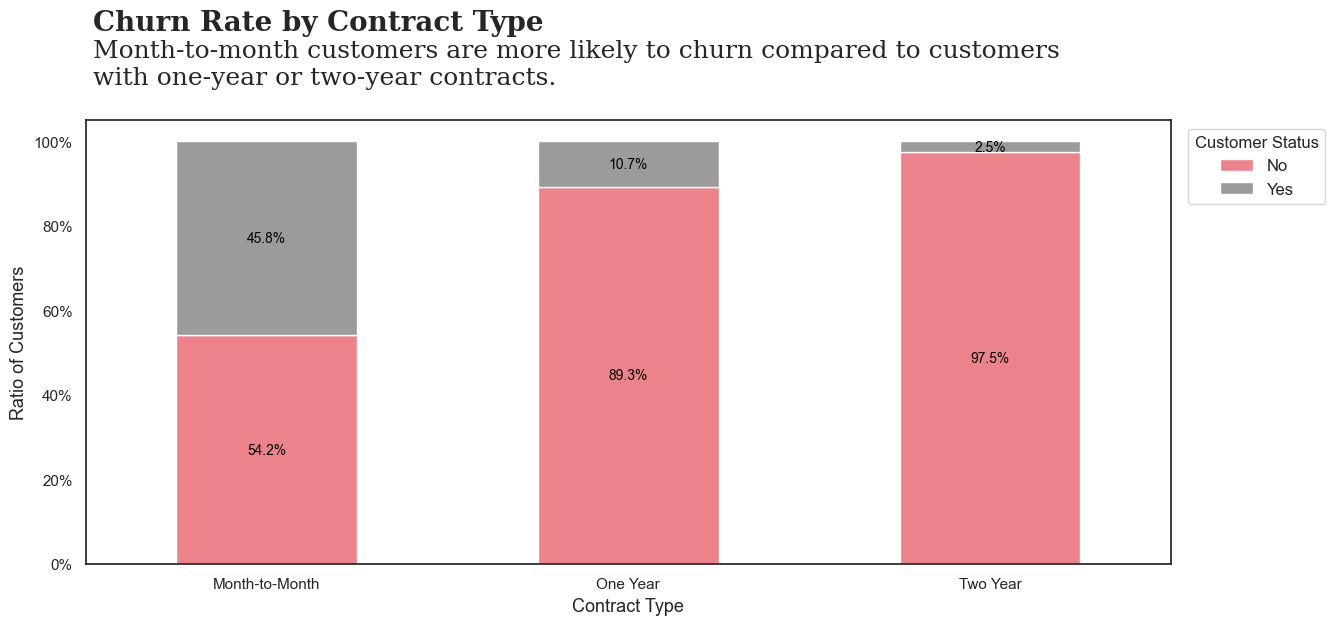

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn Rate by Contract Type', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
         "Month-to-month customers are more likely to churn compared to customers \nwith one-year or two-year contracts."
         , fontsize=18, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.85)


contractRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color[:2])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Contract Type', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title='Customer Status', fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0)
plt.show()

#### 8-3. 4. 결제 유형별 이탈률

In [43]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn'],
      dtype='object')

In [44]:
paymentChurn = df.groupby(['contract', 'payment_method']).size().unstack()
paymentChurn

payment_method  Bank Withdrawal  Credit Card  Mailed Check
contract                                                  
Month-to-Month             2240         1136           234
One Year                    797          671            82
Two Year                    872          942            69

In [45]:
allPayment = paymentChurn.sum(axis=1)
paymentRatio = paymentChurn.div(allPayment, axis=0)
print(allPayment) ; print(paymentRatio)

contract
Month-to-Month    3610
One Year          1550
Two Year          1883
dtype: int64
payment_method  Bank Withdrawal  Credit Card  Mailed Check
contract                                                  
Month-to-Month         0.620499     0.314681      0.064820
One Year               0.514194     0.432903      0.052903
Two Year               0.463091     0.500266      0.036644


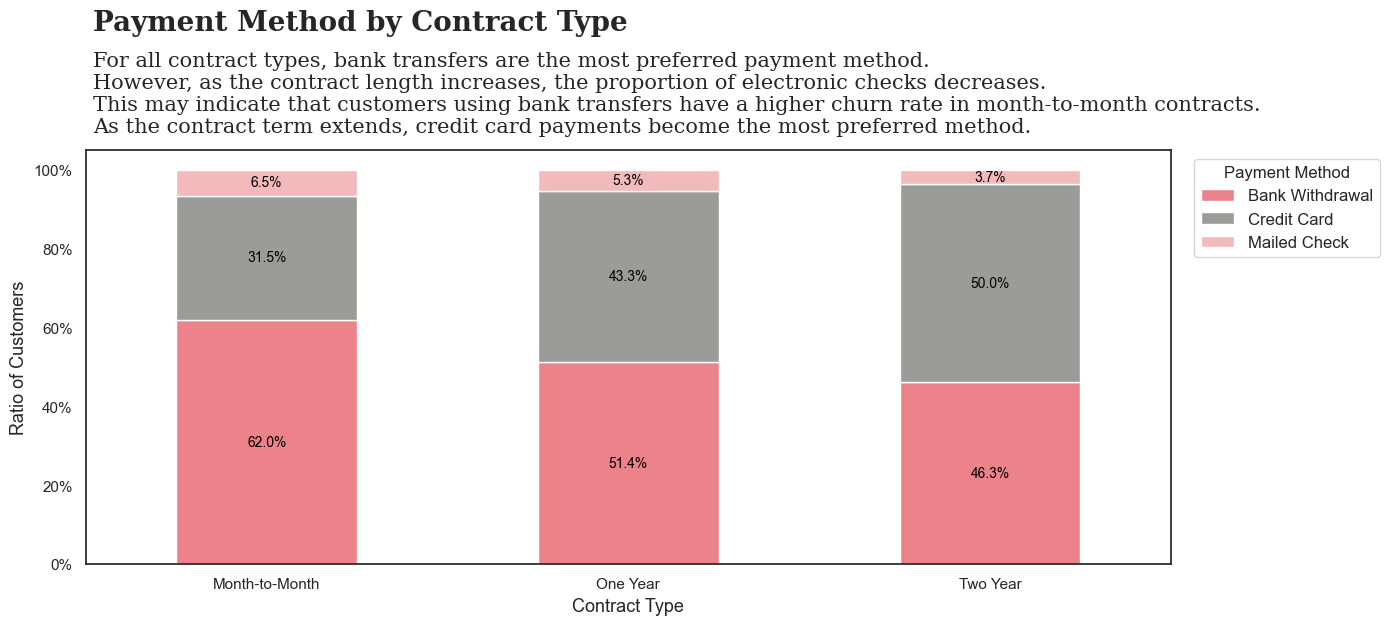

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Payment Method by Contract Type', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.83, 
         "For all contract types, bank transfers are the most preferred payment method. \nHowever, as the contract length increases, the proportion of electronic checks decreases. \nThis may indicate that customers using bank transfers have a higher churn rate in month-to-month contracts. \nAs the contract term extends, credit card payments become the most preferred method."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.80)


paymentRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Contract Type', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title='Payment Method', fontsize=12, loc='upper right', bbox_to_anchor=(1.20, 1))
plt.xticks(rotation=0)
plt.show()

1. 데이터 세트에 따르면 고객은 은행 송금, 신용 카드 및 메일 수표 순의 지불을 선호하며 가장 선호하는 것은 은행 송금으로 지불하는 것을 말해 주고 있습니다.
2. 모든 계약 유형의 경우 은행 송금을 가장 선호하지만, 계약 기간이 길어질수록 전자 수표의 비율이 낮아지는 경향을 보입니다. 이는 은행 송금을 사용하는 고객들이 월 단위 계약에서 이탈률이 높다는 것을 의미할 수 있습니다.
3. 장기계약으로 갈수록 신용카드 결제 방식을 가장 선호합니다.

In [47]:
churnCus = df[df['churn'] == 1]
stayCus = df[df['churn'] == 0]

churnPayment = churnCus.groupby(['contract', 'payment_method']).size().unstack()
churnAllPayment = churnPayment.sum(axis=1)
churnPaymentRatio = churnPayment.div(churnAllPayment, axis=0)

stayPayment = stayCus.groupby(['contract', 'payment_method']).size().unstack()
stayAllPayment = stayPayment.sum(axis=1)
stayPaymentRatio = stayPayment.div(stayAllPayment, axis=0)

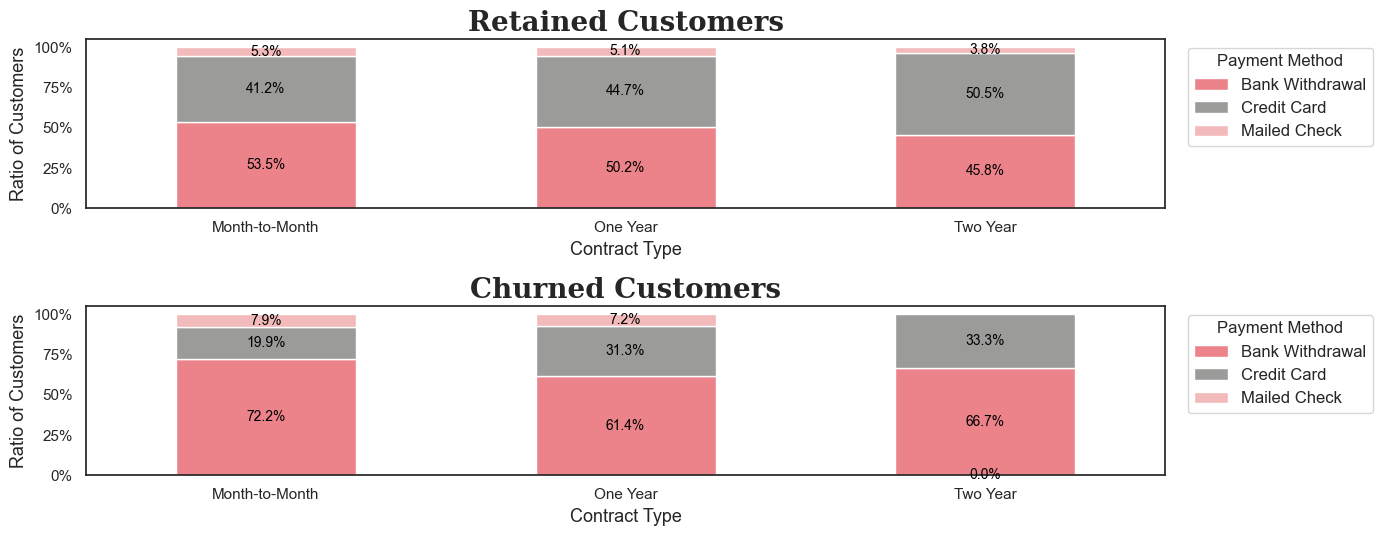

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))

# fig.text(0.13, 1, 'Payment Method by Contract Type (Retained Customers)', fontsize=20, fontweight='bold', fontfamily='serif')
# fig.text(0.13, 0.91, 
#          ""
#          , fontsize=15, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.85)

stayPaymentRatio.plot(kind='bar', stacked=True, ax=ax1, color=color)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.set_title('Retained Customers', fontweight = 'bold', fontsize = 20, fontfamily='serif')
ax1.set_xlabel('Contract Type', fontsize=13)
ax1.set_ylabel('Ratio of Customers', fontsize=13)
ax1.legend(title='Payment Method', fontsize=12, loc='upper right', bbox_to_anchor=(1.20, 1))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for container in ax1.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax1.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

churnPaymentRatio.plot(kind = 'bar', stacked = True, ax=ax2, color = color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))   
# ax.autoscale(enable=False, axis = 'both', tight = False)
ax2.set_title('Churned Customers', fontweight = 'bold', fontsize = 20, fontfamily='serif')
ax2.set_xlabel('Contract Type', fontsize=13)
ax2.set_ylabel('Ratio of Customers', fontsize=13)
ax2.legend(title='Payment Method', fontsize=12, loc='upper right', bbox_to_anchor=(1.20, 1))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
for container in ax2.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax2.bar_label(container, labels=labels, label_type='center', fontsize = 10, color = 'black')
 
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


1. 은행 인출 방식을 사용하는 고객이 Month-to-Month 계약에서 높은 이탈률을 보입니다. 이는 은행 인출 방식이 이탈률을 높이는 원인이 될 수 있음을 시사합니다.
2. 반면, 신용카드 사용 비율이 높은 Two Year 계약에서는 유지 고객 비율이 더 높습니다. 이는 신용카드 결제가 더 안정적인 고객 유지를 유도할 수 있음을 나타냅니다.
3. 신용카드 결제를 장려하거나 은행 인출 방식을 사용하는 고객에게 추가 혜택을 제공하는 등의 방법을 통해 이탈률을 낮출 수 있을 것입니다.

#### 8-3. 5. 마케팅 실적

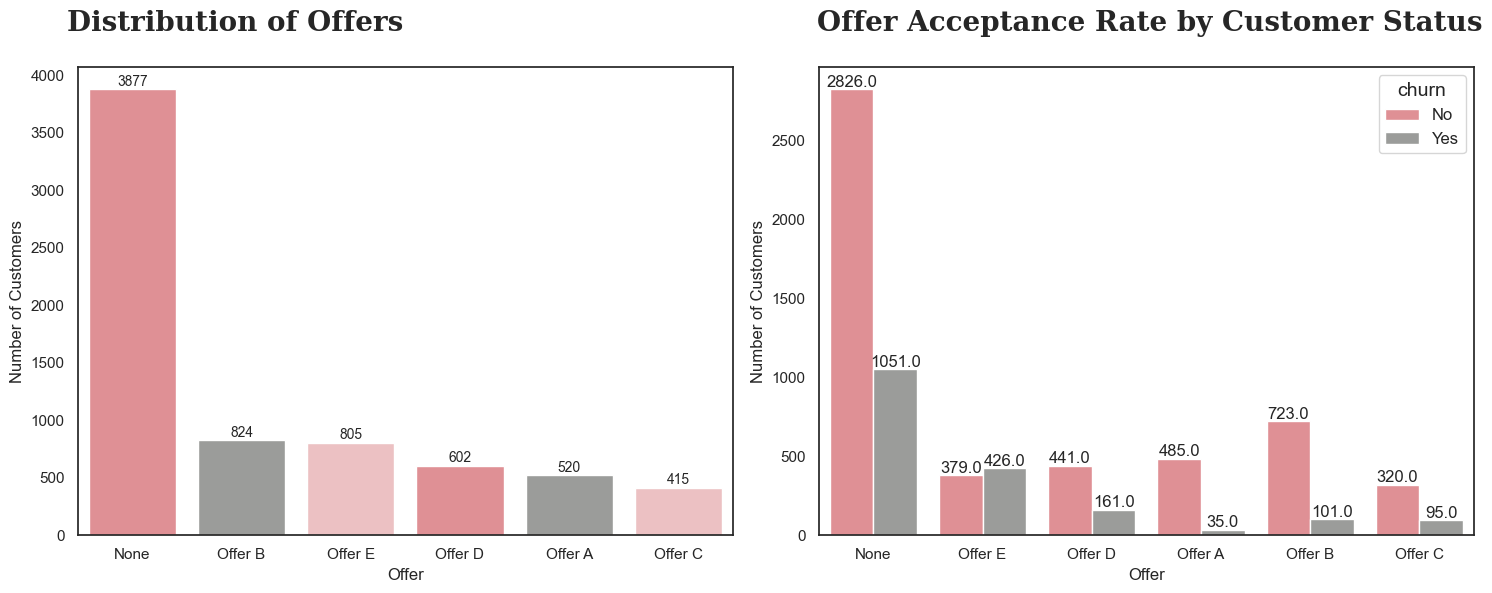

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (15,6))

ax1 = axes[0]
fig.text(0.05, 0.98, 'Distribution of Offers', fontsize=20, fontweight='bold', fontfamily='serif')
sns.barplot(x = df['offer'].value_counts().index, y = df['offer'].value_counts().values, palette = color, ax=ax1)
for i, count in enumerate(df['offer'].value_counts().values):
    ax1.text(i, count + 5, str(count), ha='center', va = 'bottom', fontsize = 10)
ax1.set_xlabel('Offer')
ax1.set_ylabel('Number of Customers')

ax2 = axes[1]
fig.text(0.55, 0.98, 'Offer Acceptance Rate by Customer Status', fontsize=20, fontweight='bold', fontfamily='serif')
sns.countplot(data=df, x='offer', hue='churn', palette=color, ax=ax2)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
ax2.set_xlabel('Offer')
ax2.set_ylabel('Number of Customers')
ax2.legend(['No', 'Yes'], title='churn', fontsize=12, title_fontsize=14)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 마케팅 분석
1. 고객의 오퍼 수락율 분석:
    * None 오퍼가 가장 많은 비율을 차지하고 있으므로, 대부분의 고객이 특별한 오퍼를 받지 않았거나 수락하지 않았음을 나타냅니다. 이는 오퍼의 매력도가 낮거나, 오퍼의 전달 방법이 효과적이지 않았을 가능성을 시사합니다.
    * 오퍼를 받지 않았어도 남아있는 고객, 이탈한 고객, 새로 가입한 고객이 많습니다. 
    * 특정 오퍼가 더 많이 수락된 이유를 분석하여 성공적인 오퍼의 특징을 파악할 필요가 있습니다.

2. 오퍼 전략 재검토:
    * Offer B와 Offer E가 상대적으로 높은 수락율을 보이고 있습니다. 하지만 Offer E를 수락한 고객의 이탈율이 높음을 확인할 수 있습니다.
    * Offer B는 남아있는 고객(Stayed)과 새로 가입한 고객(Joined)에게 효과적입니다. 이 오퍼의 성공 요인을 분석하고, 유사한 오퍼를 더 많이 제공하는 것이 좋습니다.
    * Offer D를 수락한 고객의 이탈율이 Offer E 수락한 고객의 이탈율 다음으로 높습니다.
    * Offer E와 Offer D는 이탈한 고객(Churned)에게 많이 수락되었습니다. 이는 이 오퍼들이 고객을 유지하는 데 효과적이지 않을 수 있음을 나타냅니다. 이 오퍼들의 내용을 재검토하고 개선할 필요가 있습니다.
    * Offer C는 가장 적은 수락율을 보이고 있습니다. 이 오퍼의 내용을 재검토하거나 다른 오퍼로 대체하는 것이 필요합니다.
3. 새로운 고객 유치 전략:
    * Offer B와 같은 오퍼가 새로 가입한 고객(Joined)에게 효과적이므로, 이 오퍼를 통해 더 많은 신규 고객을 유치할 수 있습니다.
    * 가입 초기 고객에게는 특히 매력적인 혜택을 제공하여 초기 이탈을 방지하는 것이 중요합니다.
4. 맞춤형 마케팅:
    * 다양한 오퍼를 분석하여 고객 세그먼트별로 맞춤형 마케팅 전략을 수립할 수 있습니다. 예를 들어, 특정 오퍼가 특정 고객군에게 더 잘 작동하는지 확인하고, 이를 기반으로 타겟 마케팅을 강화합니다.
    * 남아있는 고객(Stayed)에게 더 많은 혜택을 제공하여 충성도를 높일 수 있습니다. 특히, Offer B와 같은 성공적인 오퍼를 활용합니다.
    * 이탈 가능성이 높은 고객(Churned)에게 맞춤형 오퍼를 제공하여 이탈을 방지할 수 있습니다. 이탈 원인을 분석하고, 이를 해결하는 오퍼를 개발합니다.
5. 오퍼 효과성 평가:
    * 각 오퍼가 고객 유지 및 이탈 방지에 얼마나 효과적인지 평가해야 합니다. 어떤 오퍼가 가장 효과적인지, 어떤 오퍼가 개선이 필요한지를 지속적으로 모니터링합니다. 이를 통해 더 효과적인 오퍼를 개발하고, 덜 효과적인 오퍼는 개선하거나 제거할 수 있습니다.
    * 오퍼를 수락한 고객과 수락하지 않은 고객의 이탈율을 비교하여 오퍼의 실질적인 효과를 평가합니다.
6. 오퍼 전달 방법 개선:
    * 오퍼 전달 방법에 대한 개선이 필요할 수 있습니다. 이메일, 문자 메시지, 전화 등을 통한 오퍼 전달 방법의 효과성을 분석하여, 가장 효과적인 전달 방법을 채택합니다.
    * 오퍼의 전달 타이밍도 중요한 요소일 수 있으므로, 이를 최적화하는 방안을 모색합니다.
7. 추가 인센티브 제공:
    * 오퍼 수락율을 높이기 위해 추가적인 인센티브를 제공할 수 있습니다. 예를 들어, 오퍼와 함께 제공되는 할인, 포인트 적립, 무료 서비스 등의 혜택을 강화합니다.

##### 결론
고객 상태와 오퍼 수락율을 분석한 결과를 바탕으로, 오퍼 전략을 재검토하고, 맞춤형 오퍼를 제공하며, 신규 고객 유치 전략을 강화할 수 있는 방안을 도출할 수 있습니다. 이를 통해 고객 이탈을 줄이고, 충성 고객을 확보하며, 더 많은 신규 고객을 유치할 수 있습니다. 고객 세그먼트별로 오퍼 수락율과 고객 상태를 분석하여, 특정 세그먼트에 맞는 오퍼를 제공할 수 있습니다. 예를 들어, 특정 연령대나 지역의 고객에게 더 효과적인 오퍼를 식별합니다.

#### 8-3. 6. 주소지

In [50]:
df.groupby('zip_code')['total_long_distance_charges'].describe()

count       mean         std     min       25%       50%        75%  \
zip_code                                                                        
90001       4.0   327.9925  628.505525    0.00    0.0000    20.840   348.8325   
90002       4.0  1014.7350  562.478014  581.06  602.7350   846.700  1258.7000   
90003       5.0   230.1620  412.218495   20.94   43.5700    57.540    61.7500   
90004       5.0   325.9780  448.154537    0.00    3.0900   133.380   429.1200   
90005       4.0   449.3675  445.533807   18.24  104.3325   416.615   761.6500   
...         ...        ...         ...     ...       ...       ...        ...   
96143       4.0   555.5375  547.571228   87.24   99.2100   479.055   935.3825   
96145       3.0  1199.0900  962.750386  309.96  687.8550  1065.750  1643.6550   
96146       4.0   534.4650  559.159660   45.12   57.5850   499.470   976.3500   
96148       4.0   292.8275  304.428582   35.37   43.1925   241.270   490.9050   
96150       2.0   144.2500  202.402245    1.13   72.6900   144.250   215.8100   

              max  
zip_code           
90001     1270.29  
90002     1784.48  
90003      967.01  
90004     1064.30  
90005      946.00  
...           ...  
96143     1176.80  
96145     2221.56  
96146     1093.80  
96148      653.40  
96150      287.37  

[1626 rows x 8 columns]

In [51]:
df.groupby('zip_code').size()

zip_code
90001    4
90002    4
90003    5
90004    5
90005    4
        ..
96143    4
96145    3
96146    4
96148    4
96150    2
Length: 1626, dtype: int64

In [52]:
df.groupby('zip_code').size().max()

43

In [53]:
df.groupby('zip_code').size().mean()

4.331488314883149

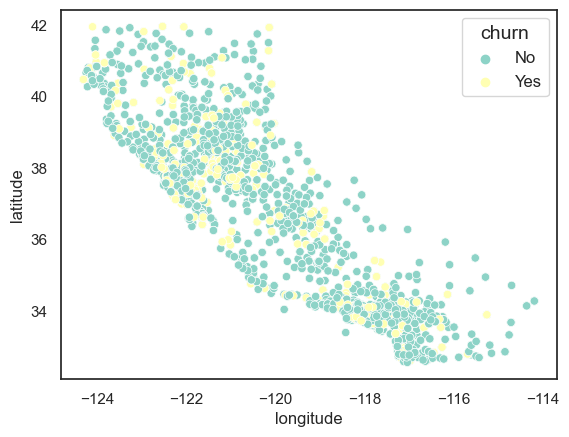

In [54]:
ax = sns.scatterplot(data = df, x='longitude', y='latitude', hue='churn', palette = 'Set3')
# plt.legend(['No', 'Yes'], title='churn', fontsize=12, title_fontsize=14)

handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes'] if labels == ['0', '1'] else labels
ax.legend(handles=handles, labels=labels, title='churn', fontsize=12, title_fontsize=14)


##### 결론
한 우편번호 당 최대 43명이 살고 있는 구역도 있지만 각 우편번호 당 평균 4.5명의 고객이 살고 있다. 지역별로 보았을 때 한 곳에 이탈고객이 몰려있거나 하는 특징은 없다.

In [55]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn'],
      dtype='object')

In [56]:
df = df.drop(columns = ['city', 'zip_code', 'latitude', 'longitude'])
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn'],
      dtype='object')

#### 8-3. 7. 결혼 여부, 부양 가족 여부, 추천 여부, 나이

In [57]:
df2 = df[['age', 'married', 'number_of_dependents', 'number_of_referrals', 'churn']]
df2['churn'] = df2['churn'].map({0: 'Retained', 1: 'Churned'})
df2['married'] = df2['married'].map({0: 'No', 1: 'Yes'})
df2.head(3)

age married  number_of_dependents  number_of_referrals     churn
0    0     Yes                     0                    2  Retained
1    0      No                     0                    0  Retained
2    0      No                     0                    0   Churned

In [58]:
churnMarried = df2.groupby(['churn', 'married']).size().unstack()
allCM = churnMarried.sum(axis=1)
cmRatio = churnMarried.div(allCM, axis=0)
cmRatio

married         No       Yes
churn                       
Churned   0.642055  0.357945
Retained  0.471782  0.528218

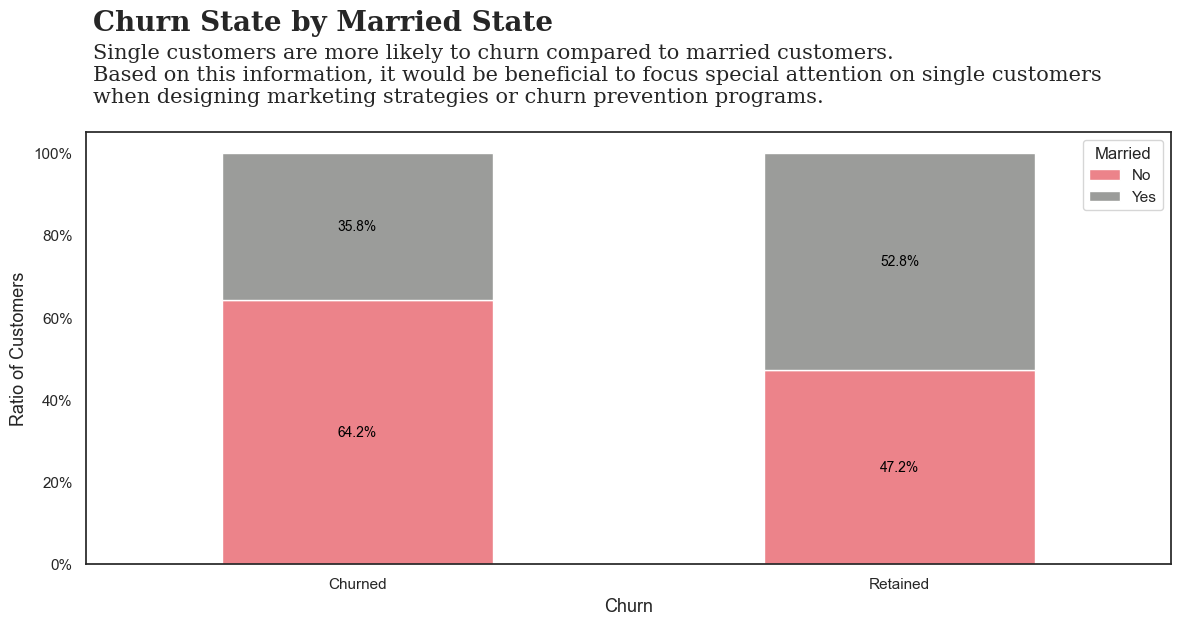

In [59]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn State by Married State', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "Single customers are more likely to churn compared to married customers. \nBased on this information, it would be beneficial to focus special attention on single customers \nwhen designing marketing strategies or churn prevention programs."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


cmRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Churn', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title = 'Married', labels = ['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

1. 이탈한 고객 중 미혼 고객이 3/4를 차지합니다.
2. 이탈하지 않은 고객의 결혼 여부는 거의 비슷합니다.
3. 미혼 고객이 기혼 고객보다 이탈할 가능성이 더 크다는 것을 알 수 있습니다.

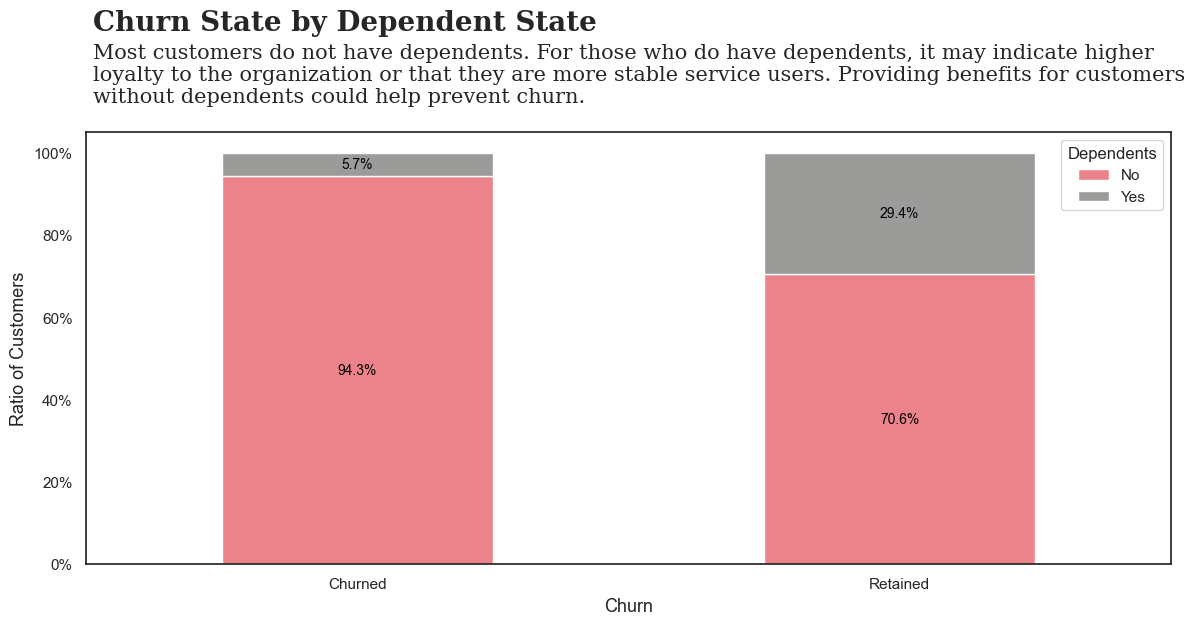

In [60]:
df2['dependents'] = df2['number_of_dependents'].apply(lambda x: 'Yes' if x > 0 else 'No')
churnDep = df2.groupby(['churn', 'dependents']).size().unstack()
allCD = churnDep.sum(axis=1)
cdRatio = churnDep.div(allCD, axis=0)

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn State by Dependent State', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "Most customers do not have dependents. For those who do have dependents, it may indicate higher \nloyalty to the organization or that they are more stable service users. Providing benefits for customers \nwithout dependents could help prevent churn."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


cdRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Churn', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title = 'Dependents', labels = ['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

1. 이 결과는 부양가족이 없는 고객이 부양가족이 있는 고객보다 이탈할 가능성이 훨씬 높다는 것을 시사합니다.
- 부양가족이 없는 고객 (No Dependents): 이 그룹은 이탈률이 높으며, 이는 고객 유지 전략에서 중요한 시사점을 제공합니다. 부양가족이 없는 고객은 이탈할 위험이 높으므로, 이 그룹을 타겟으로 한 고객 유지 프로그램을 설계할 필요가 있습니다.
- 부양가족이 있는 고객 (Yes Dependents): 이 그룹은 상대적으로 이탈률이 낮습니다. 이는 부양가족이 있는 고객이 회사에 더 충성도가 높거나, 더 안정적인 서비스 사용자임을 나타낼 수 있습니다.
2. 마케팅 전략:
- 부양가족이 없는 고객을 위한 특별한 혜택 제공: 이 그룹은 이탈 위험이 높으므로, 이들에게 특별한 혜택이나 맞춤형 서비스 제공을 통해 이탈을 방지할 수 있습니다.
- 고객 충성도 프로그램 강화: 부양가족이 있는 고객의 충성도를 유지하면서, 부양가족이 없는 고객에게도 비슷한 프로그램을 적용하여 이탈률을 줄일 수 있습니다.

In [61]:
df2['referrals'] = df2['number_of_referrals'].apply(lambda x: 'Yes' if x > 0 else 'No')

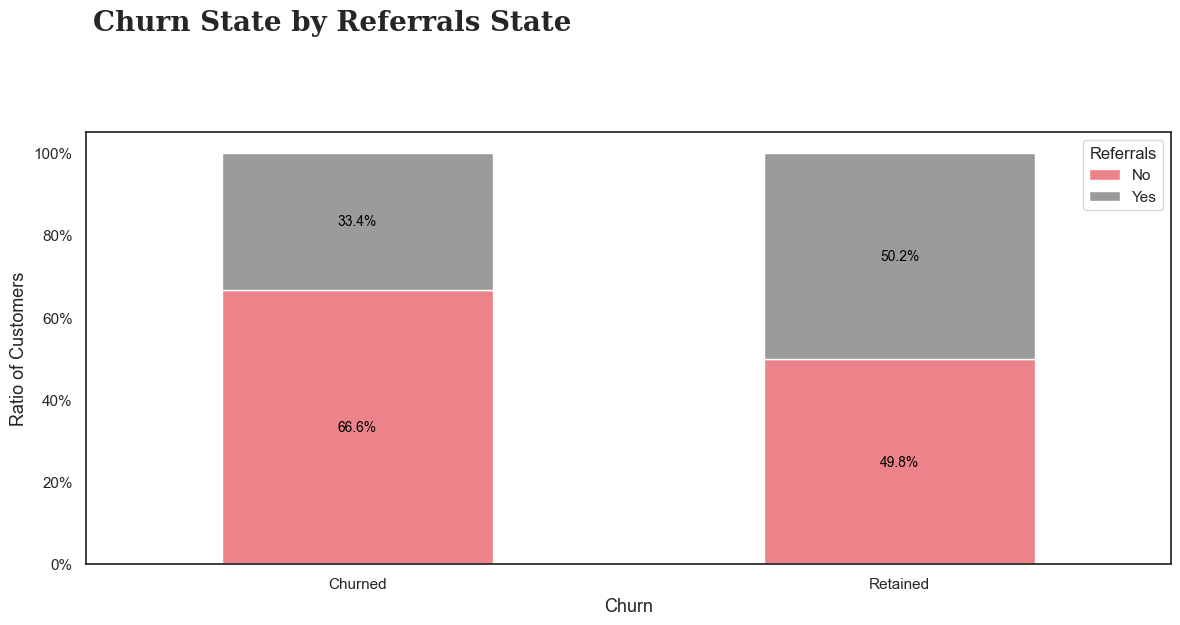

In [62]:
churnRef = df2.groupby(['churn', 'referrals']).size().unstack()
allREF = churnRef.sum(axis=1)
refRatio = churnRef.div(allREF, axis=0)

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn State by Referrals State', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88, 
         "", fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)


refRatio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Churn', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title = 'Referrals', labels = ['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [63]:
df.age.value_counts()

0    5901
1    1142
Name: age, dtype: int64

In [64]:
df2.age.unique()

array([0, 1])

In [65]:
df2['age'] = df['age'].apply(lambda x: 'Senior' if x == 1 else 'Young')
grouped = df2.groupby(['age', 'churn']).size().unstack() #.fillna(0)

In [66]:
grouped['Total'] = grouped.sum(axis=1)

grouped['Churn Rate'] = grouped['Churned'] / grouped['Total'] * 100
grouped['Retained Rate'] = grouped['Retained'] / grouped['Total'] * 100
print(grouped)

# 이탈 비율과 유지 비율을 하나의 데이터프레임으로 결합
grouped_melted = grouped[['Churn Rate', 'Retained Rate']].reset_index().melt(id_vars=['age'], value_vars=['Churn Rate', 'Retained Rate'])
print(grouped_melted)

churn   Churned  Retained  Total  Churn Rate  Retained Rate
age                                                        
Senior      476       666   1142   41.681261      58.318739
Young      1393      4508   5901   23.606168      76.393832
      age          churn      value
0  Senior     Churn Rate  41.681261
1   Young     Churn Rate  23.606168
2  Senior  Retained Rate  58.318739
3   Young  Retained Rate  76.393832


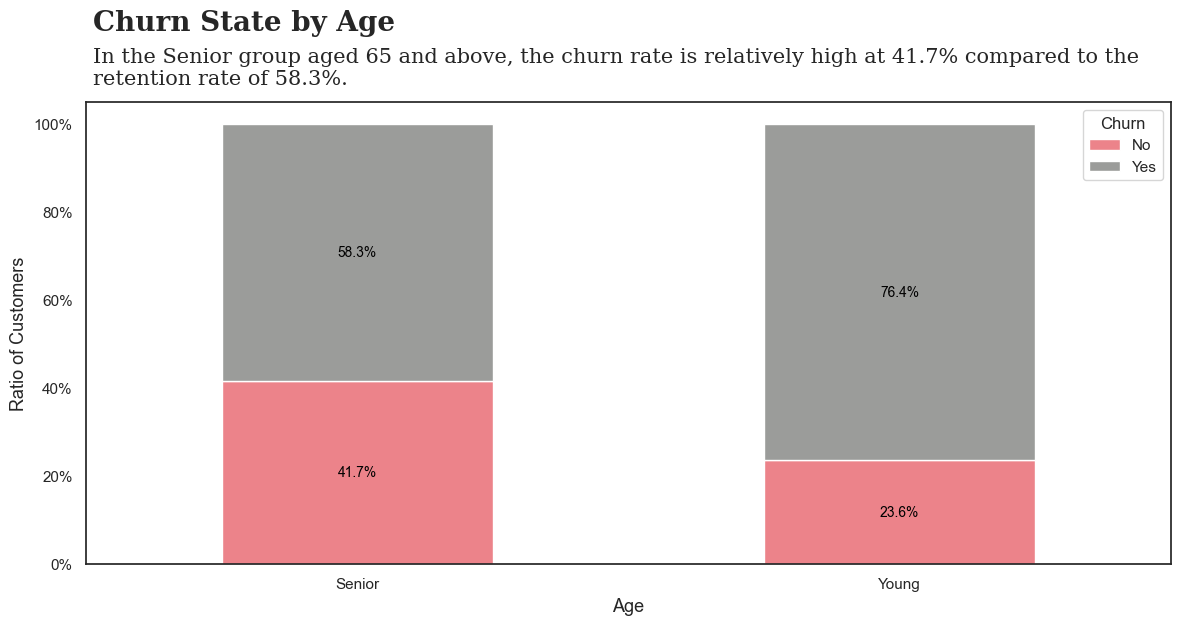

In [67]:
ages = df2.groupby(['age', 'churn']).size().unstack()
allG = ages.sum(axis=1)
ratio = ages.div(allG, axis=0)


fig, ax = plt.subplots(1, 1, figsize = (14, 6))

fig.text(0.13, 1, 'Churn State by Age', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.91, 
         "In the Senior group aged 65 and above, the churn rate is relatively high at 41.7% compared to the \nretention rate of 58.3%."
         , fontsize=15, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.88)


ratio.plot(kind = 'bar', stacked = True, ax=ax, color = color)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for container in ax.containers:
    labels = [f'{h*100:.1f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

ax.autoscale(enable=False, axis='both', tight=False)

plt.xlabel('Age', fontsize=13)
plt.ylabel('Ratio of Customers', fontsize=13)
# plt.legend(title='Customer Status', fontsize=12)
plt.legend(title = 'Churn', labels = ['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

### 8-4. 상관관계

In [68]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn'],
      dtype='object')

In [69]:
df2 = df[['gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'phone_service',
       'internet_service','paperless_billing',
       'monthly_charge', 'total_charges', 'total_refunds', 'total_revenue']]
df2

gender  age  married  number_of_dependents  number_of_referrals  \
0          0    0        1                     0                    2   
1          1    0        0                     0                    0   
2          1    0        0                     0                    0   
3          1    1        1                     0                    1   
4          0    1        1                     0                    3   
...      ...  ...      ...                   ...                  ...   
7038       0    0        0                     0                    0   
7039       1    0        1                     0                    1   
7040       1    0        0                     0                    0   
7041       1    0        1                     0                    5   
7042       1    0        1                     0                    1   

      tenure_in_months  phone_service  internet_service  paperless_billing  \
0                    9              1                 1                  1   
1                    9              1                 1                  0   
2                    4              1                 1                  1   
3                   13              1                 1                  1   
4                    3              1                 1                  1   
...                ...            ...               ...                ...   
7038                13              1                 1                  0   
7039                22              1                 1                  1   
7040                 2              1                 1                  1   
7041                67              1                 1                  0   
7042                63              0                 1                  0   

      monthly_charge  total_charges  total_refunds  total_revenue  
0              65.60         593.30           0.00         974.81  
1              -4.00         542.40          38.33         610.28  
2              73.90         280.85           0.00         415.45  
3              98.00        1237.85           0.00        1599.51  
4              83.90         267.40           0.00         289.54  
...              ...            ...            ...            ...  
7038           55.15         742.90           0.00        1349.74  
7039           85.10        1873.70           0.00        2230.10  
7040           50.30          92.75           0.00         129.99  
7041           67.85        4627.65           0.00        4769.69  
7042           59.00        3707.60           0.00        3707.60  

[7043 rows x 13 columns]

In [70]:
correlations = df2.corrwith (df.churn)
correlations = correlations [correlations!=1]

positive_correlations = correlations[correlations >0].sort_values (ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending= False)

print('Most Positive Correlations: \n', positive_correlations)
print ('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 internet_service     0.227890
paperless_billing    0.191825
monthly_charge       0.187833
age                  0.150889
phone_service        0.011942
dtype: float64

Most Negative Correlations: 
 gender                 -0.008612
total_refunds          -0.033709
married                -0.150448
total_charges          -0.198546
number_of_dependents   -0.218780
total_revenue          -0.223003
number_of_referrals    -0.286540
tenure_in_months       -0.352861
dtype: float64


### 8-5. 상관관계 그래프

Text(0, 0.5, 'Features')

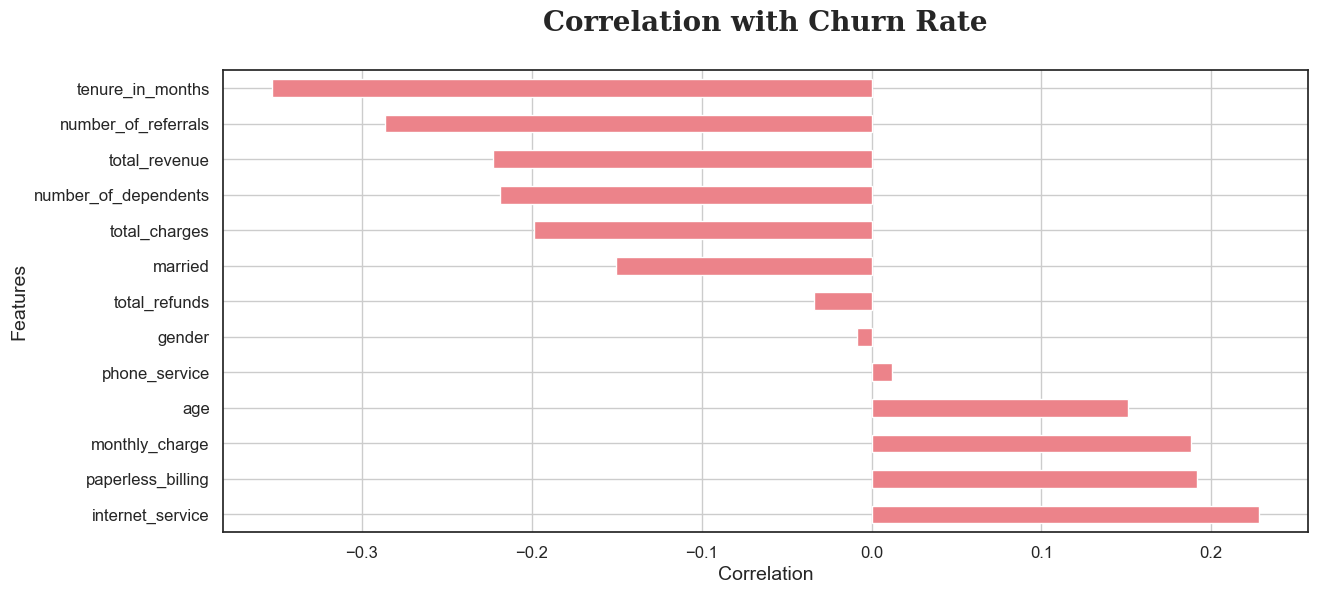

In [71]:
correlations = correlations.sort_values(ascending = False)
correlations.plot.barh(figsize = (14,6), fontsize = 12, color = color[0], rot = 0, grid = True)
plt.title('Correlation with Churn Rate\n', fontsize = 20, fontfamily = 'serif', fontweight = 'bold')
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('Features', fontsize=14)


### 8-6. 상관관계 매트릭스

<AxesSubplot: >

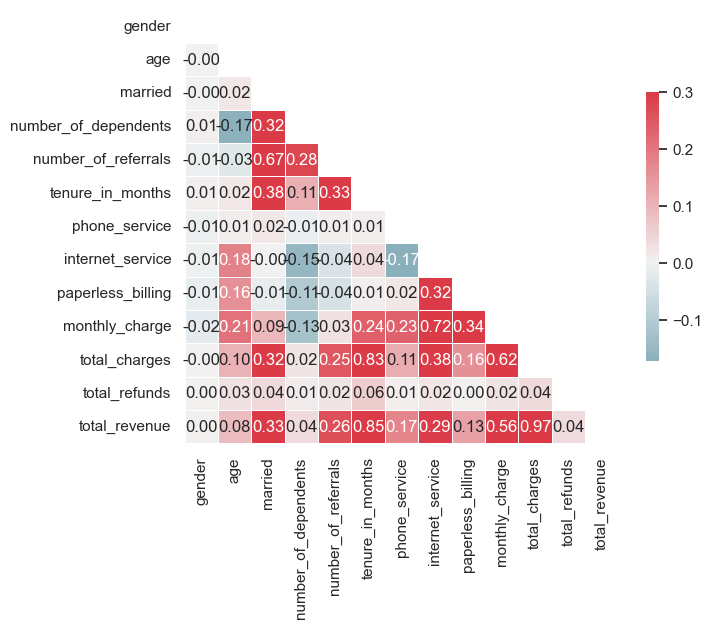

In [72]:
corr = df2.corr()
plt.figure(figsize = (7,7))
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, fmt = ".2f", mask = mask, cmap = cmap, annot = True,
           vmax = .3, 
            center = 0, square = True, linewidths = .5, cbar_kws = {"shrink" : .5})

### 8-7. VIF 사용하여 다중공선성 확인

- VIF (Variable Inflation Factors)를 사용하여 다중공선성을 본다 상관 관계 매트릭스와는 달리 VIF는 데이터 세트의 다른 독립 변수 그룹과 변수의 상관 관계 강도를 결정한다. VIF는 일반적으로 1에서 시작하며 어떤 지표에서든 이 값이 10을 초과한다는 것은 독립 변수 간의 다중공선성이 높다는 것을 의미한다.

In [ ]:
# plt.figure(figsize=(14, 6))
# plt.scatter(x=df2['monthly_charge'], y=df2['internet_service'], color=color[0])

# plt.title('Collinearity of Total Revenue and Total Charges', fontsize=20, fontweight = 'bold', fontfamily = 'serif')
# plt.xlabel('Monthly Charges', fontsize=14)
# plt.ylabel('Internet Service', fontsize=14)

# plt.show()

In [94]:
cols = []
for col in df.columns[:-1]:
    if df[col].dtype != 'object':
        cols.append(col)
print(cols)

['gender', 'age', 'married', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'avg_monthly_long_distance_charges', 'internet_service', 'avg_monthly_gb_download', 'paperless_billing', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


In [95]:
df3 = df[['gender', 'age', 'married', 'number_of_dependents', 'number_of_referrals', 
          'tenure_in_months', 'phone_service', 'avg_monthly_long_distance_charges', 'internet_service', 'avg_monthly_gb_download', 'paperless_billing', 
          'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']]

In [96]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(df3)

variables        VIF
0                              gender   1.978492
1                                 age   1.345673
2                             married   3.911034
3                number_of_dependents   1.537103
4                 number_of_referrals   2.665481
5                    tenure_in_months  11.628995
6                       phone_service   8.986613
7   avg_monthly_long_distance_charges   7.269276
8                    internet_service  12.258074
9             avg_monthly_gb_download   3.517700
10                  paperless_billing   2.821382
11                     monthly_charge  24.462162
12                      total_charges        inf
13                      total_refunds        inf
14           total_extra_data_charges        inf
15        total_long_distance_charges        inf
16                      total_revenue        inf

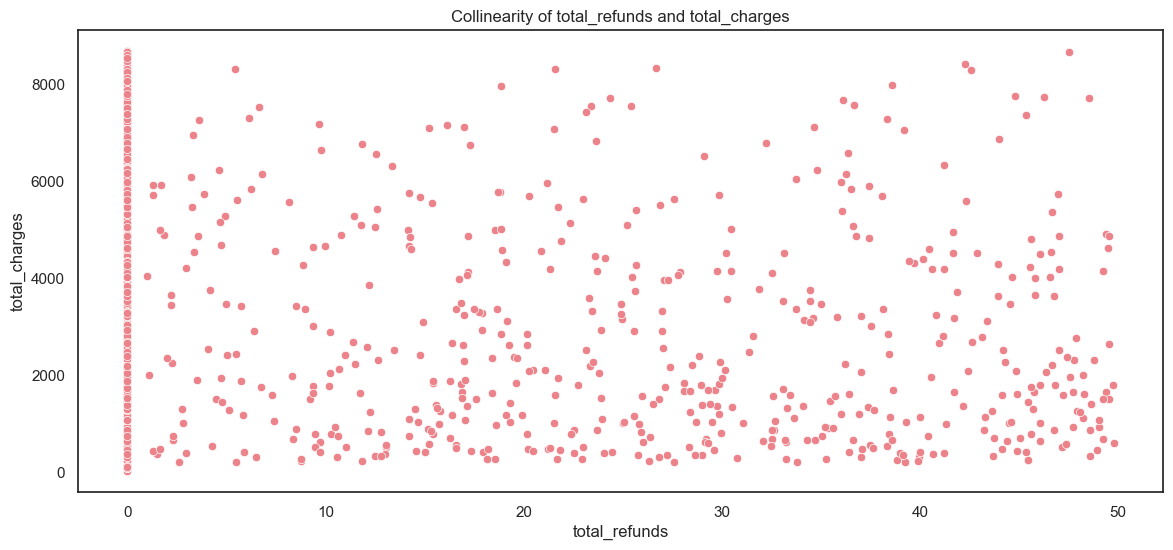

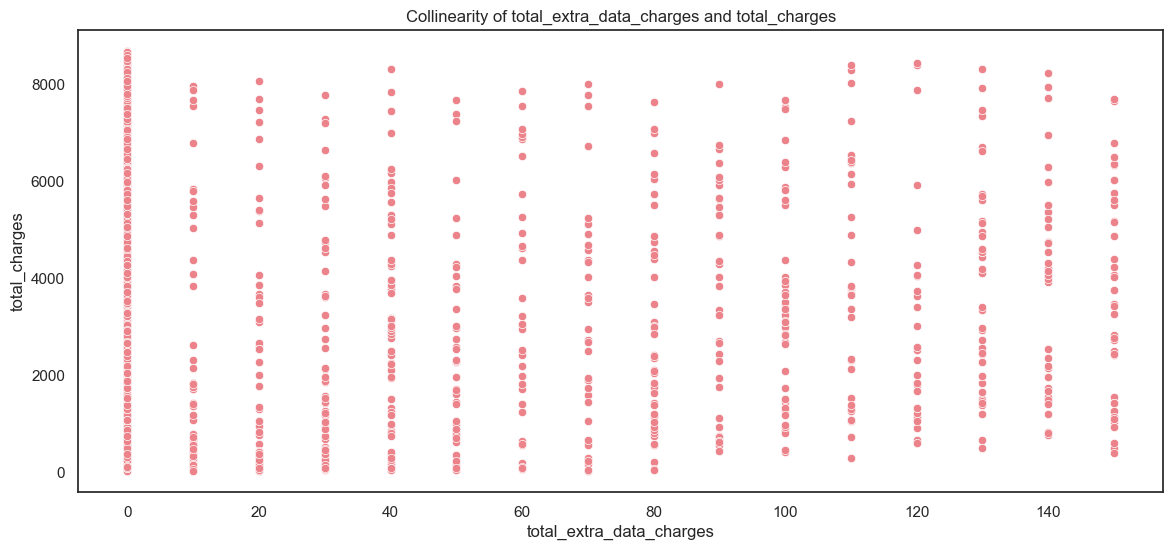

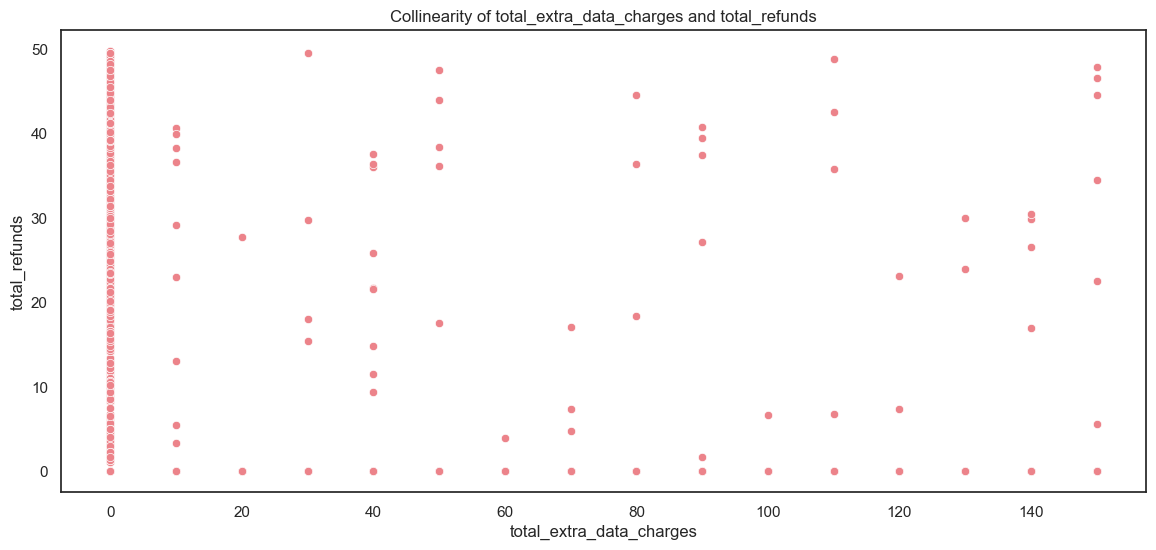

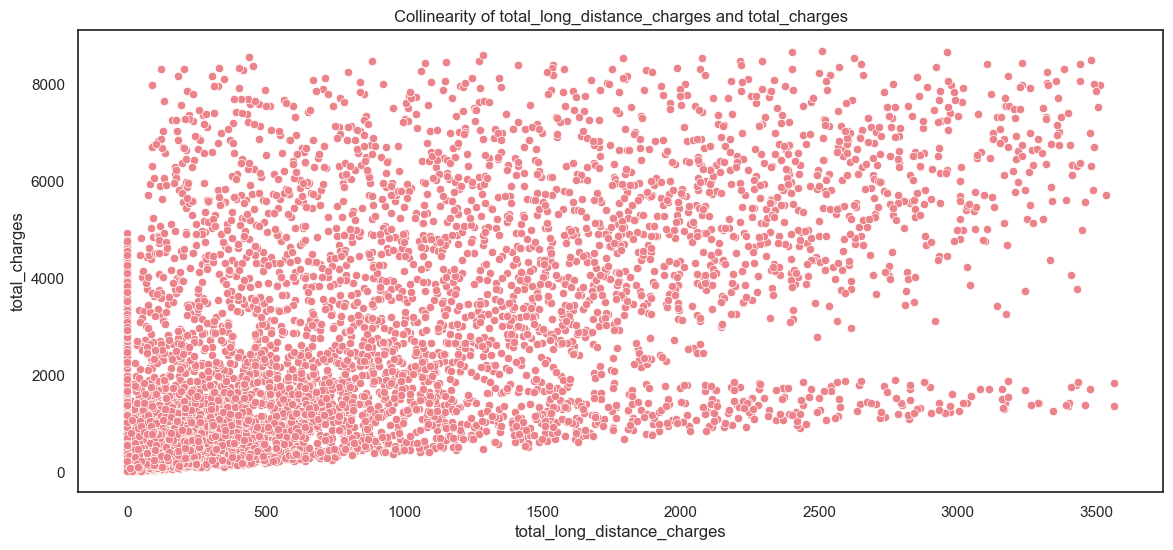

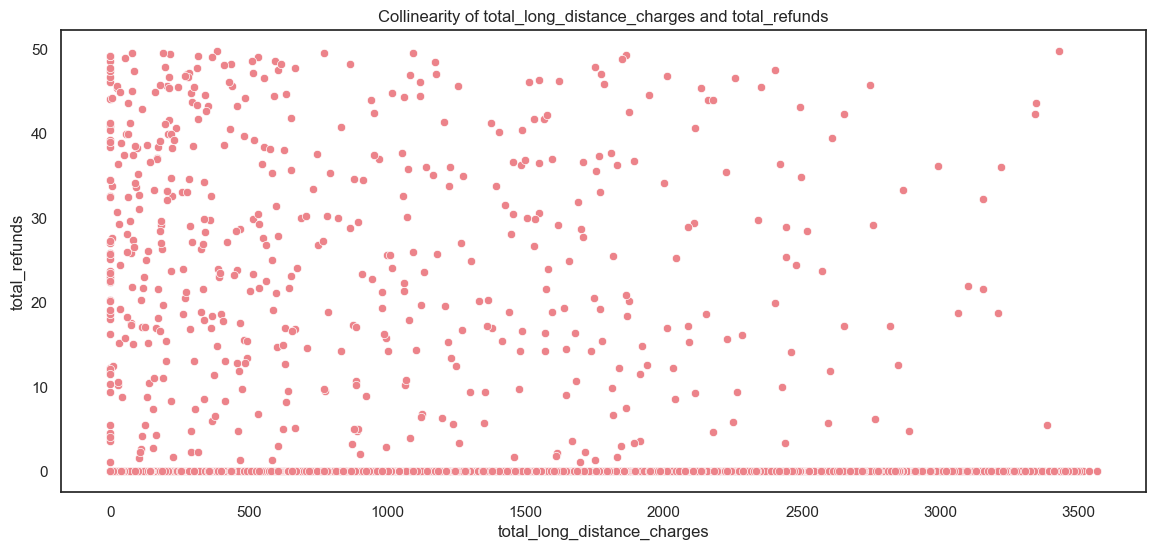

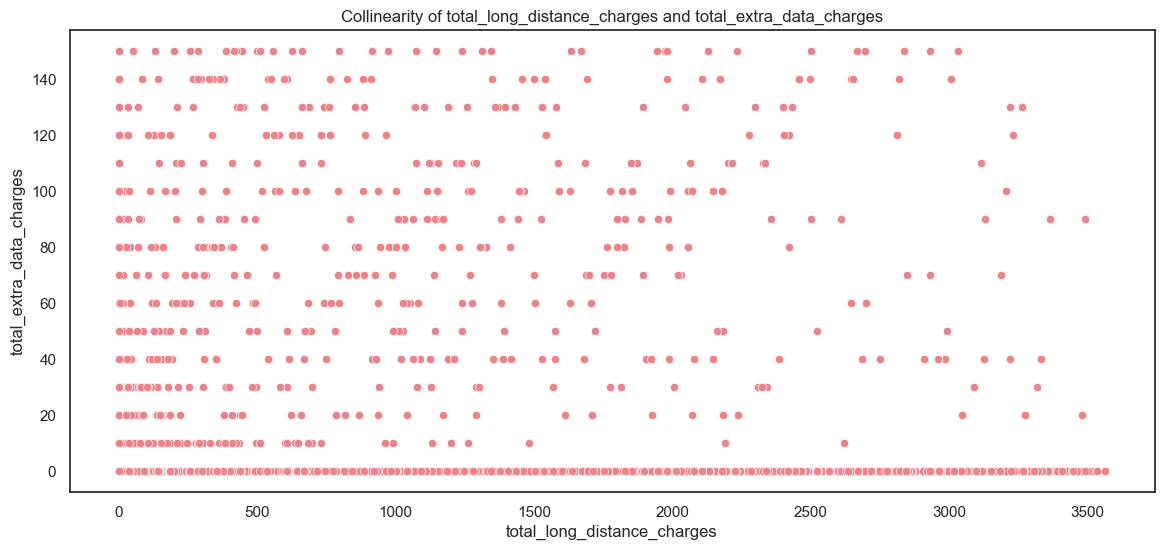

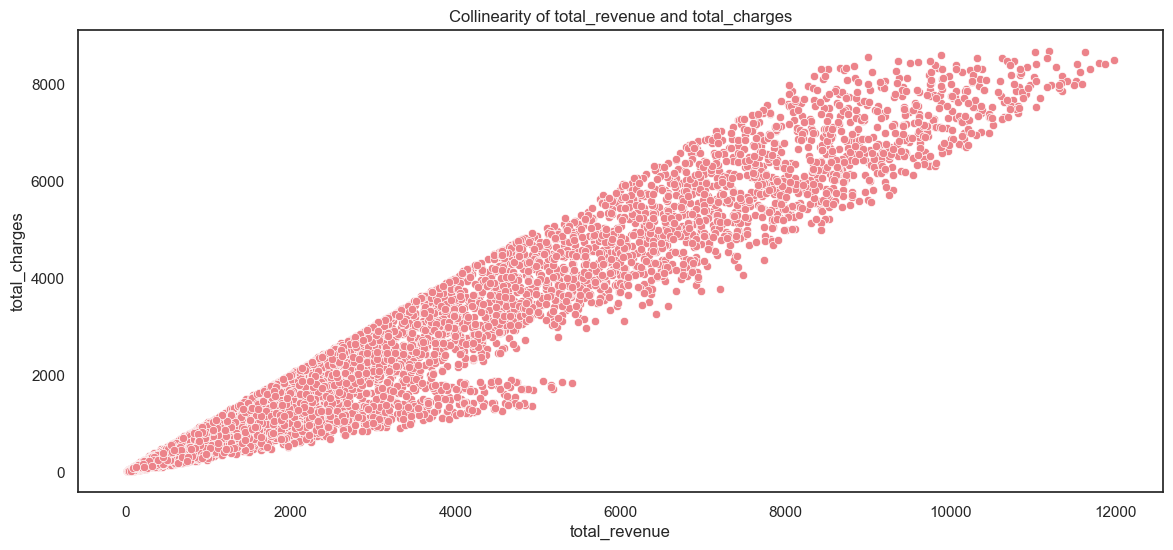

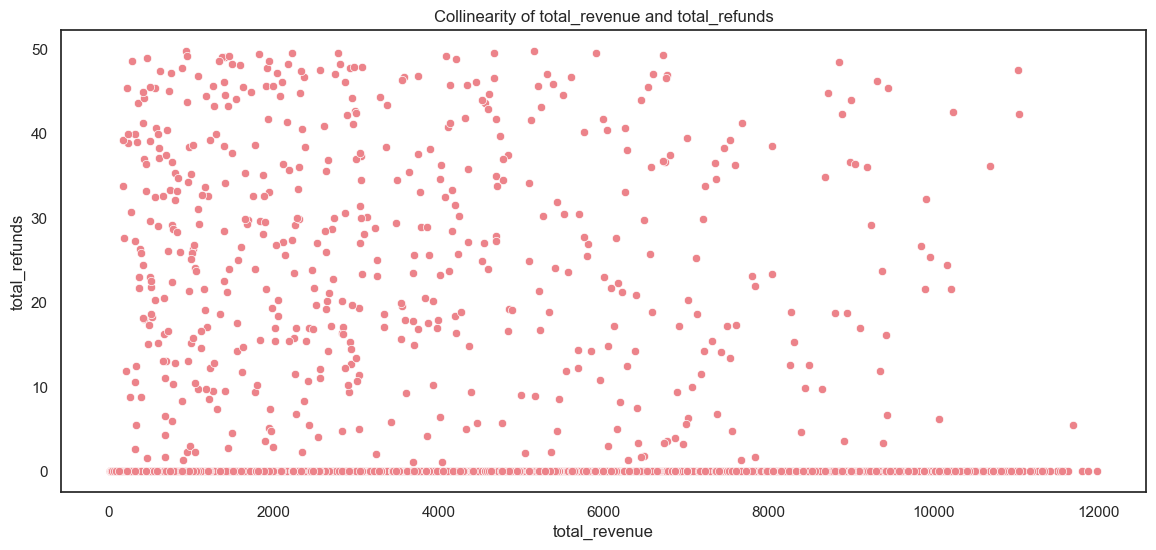

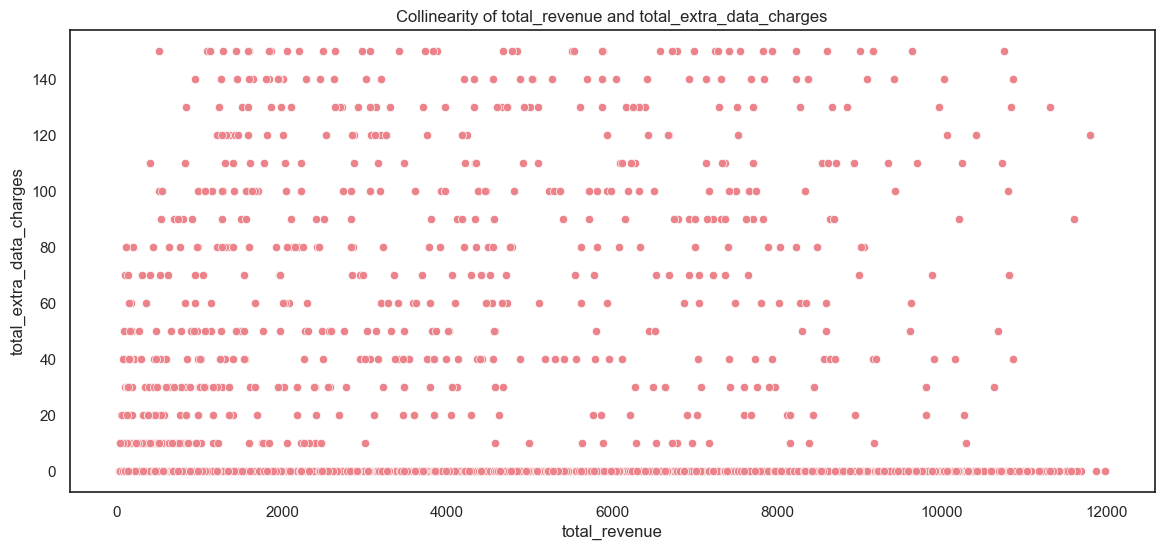

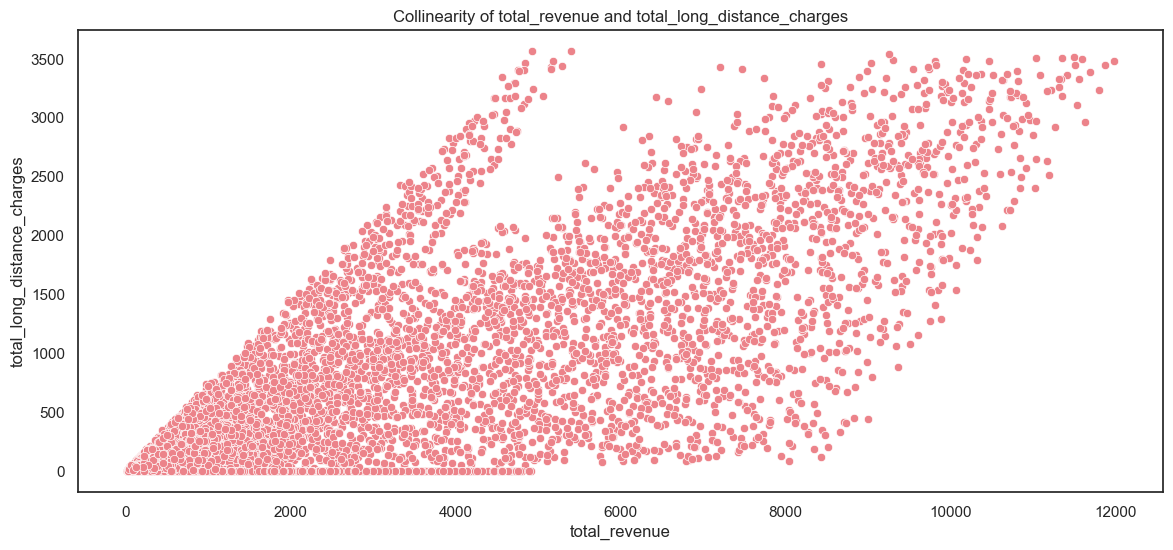

In [118]:
variables = ['total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']

for i in range(len(variables)):
    for j in range(len(variables)):
        if variables[i] == variables[j]:
            continue
        elif i < j:
            continue
        else:
            # print(variables[i], variables[j])
            plt.figure(figsize=(14, 6))
            sns.scatterplot(x=df[variables[i]], y=df[variables[j]], color=color[0])
            plt.title(f'Collinearity of {variables[i]} and {variables[j]}')
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.show()
        


In [102]:
df3 = df3.drop(columns = 'total_revenue')

In [104]:
calc_vif(df3)

variables        VIF
0                              gender   1.978492
1                                 age   1.345673
2                             married   3.911034
3                number_of_dependents   1.537103
4                 number_of_referrals   2.665481
5                    tenure_in_months  11.628995
6                       phone_service   8.986613
7   avg_monthly_long_distance_charges   7.269276
8                    internet_service  12.258074
9             avg_monthly_gb_download   3.517700
10                  paperless_billing   2.821382
11                     monthly_charge  24.462162
12                      total_charges  14.747887
13                      total_refunds   1.069947
14           total_extra_data_charges   1.105644
15        total_long_distance_charges   6.522577

In [105]:
print(calc_vif(df3))

                            variables        VIF
0                              gender   1.978492
1                                 age   1.345673
2                             married   3.911034
3                number_of_dependents   1.537103
4                 number_of_referrals   2.665481
5                    tenure_in_months  11.628995
6                       phone_service   8.986613
7   avg_monthly_long_distance_charges   7.269276
8                    internet_service  12.258074
9             avg_monthly_gb_download   3.517700
10                  paperless_billing   2.821382
11                     monthly_charge  24.462162
12                      total_charges  14.747887
13                      total_refunds   1.069947
14           total_extra_data_charges   1.105644
15        total_long_distance_charges   6.522577


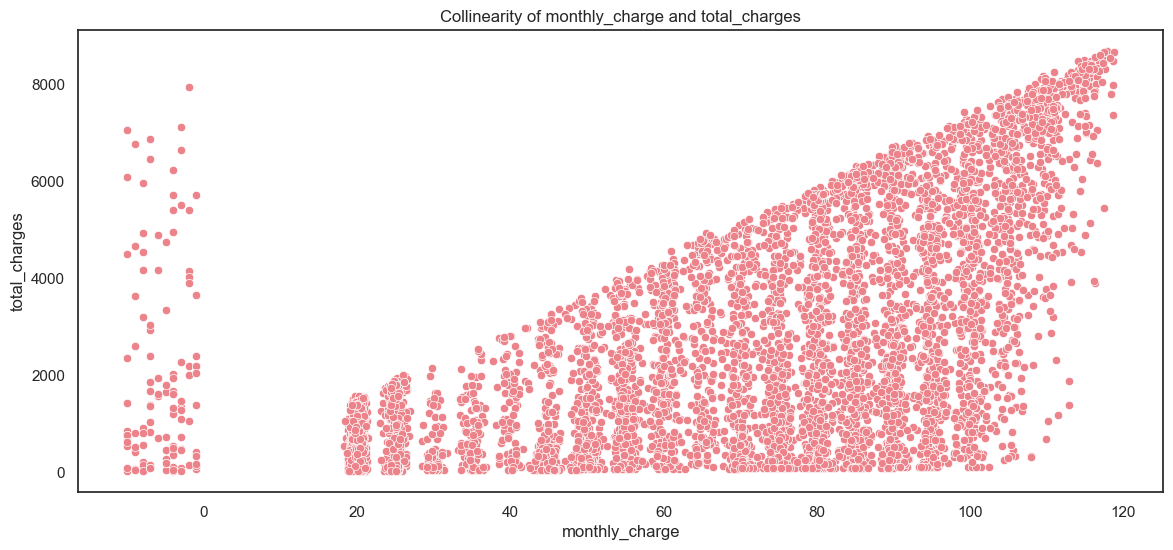

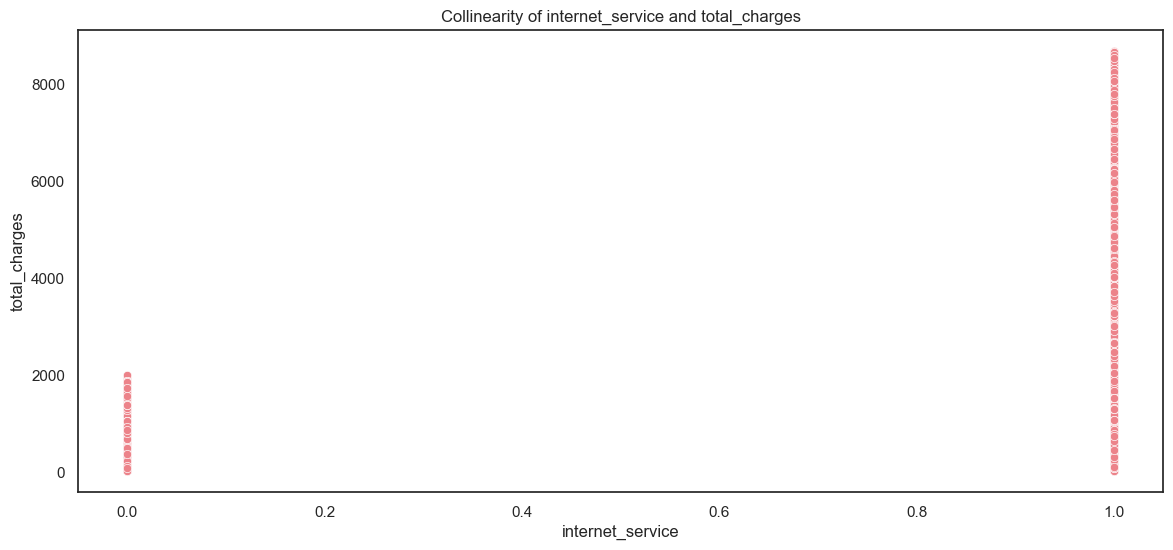

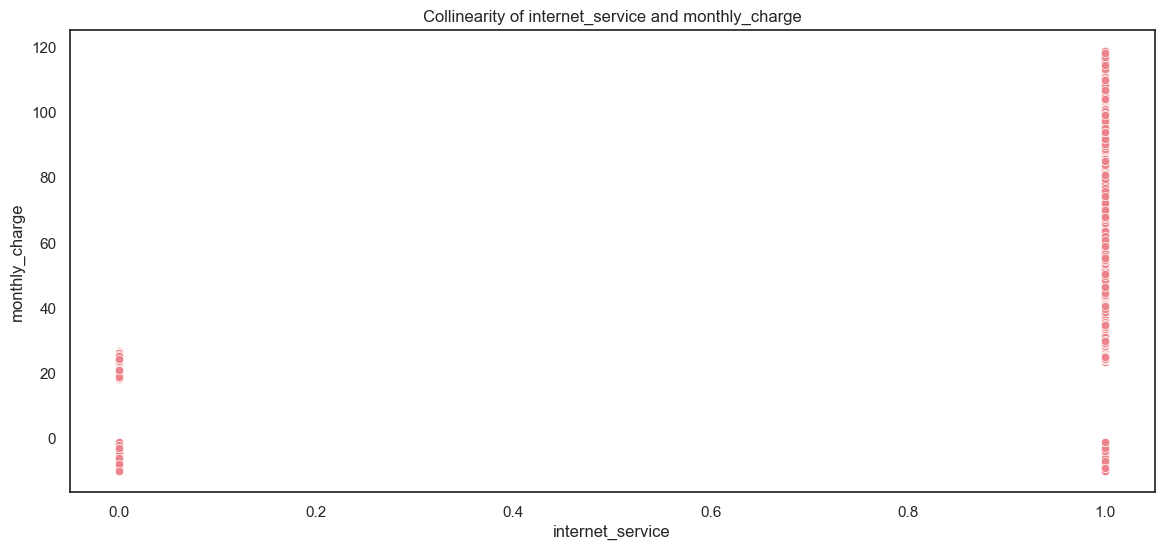

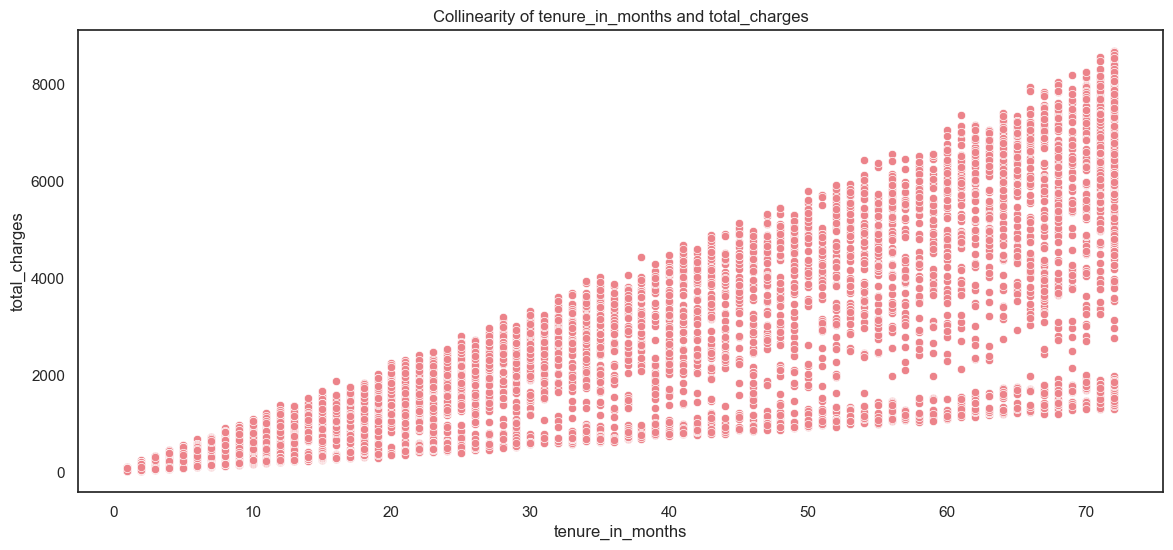

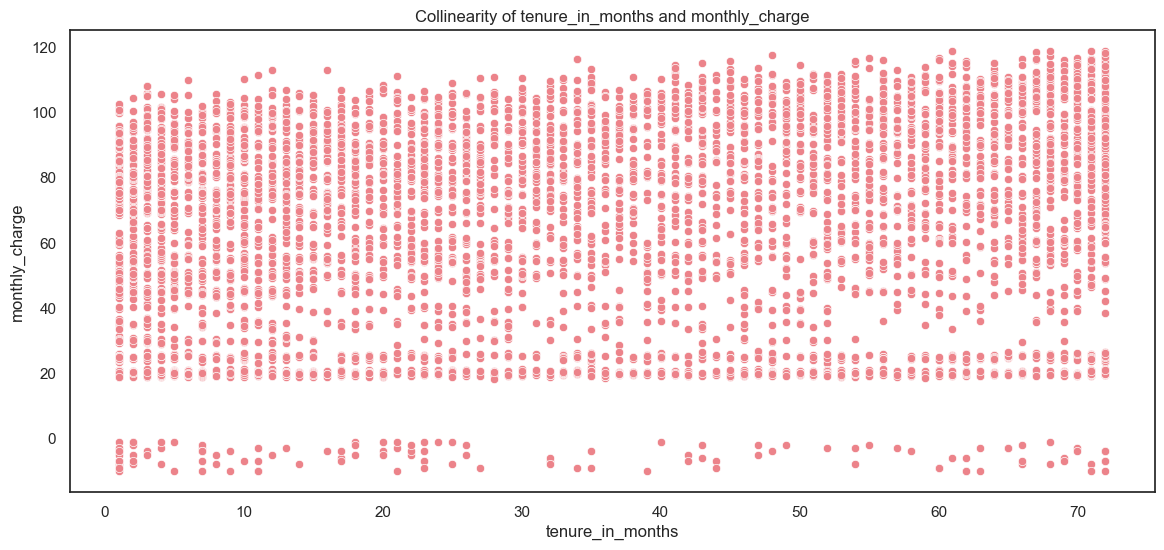

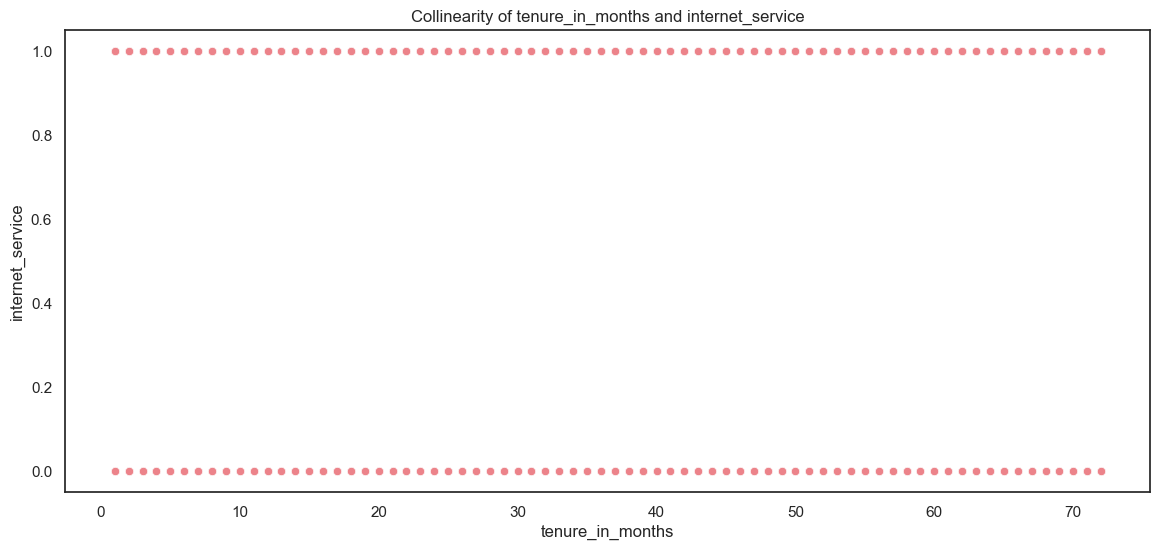

In [119]:
variables = ['total_charges', 'monthly_charge', 'internet_service', 'tenure_in_months']

for i in range(len(variables)):
    for j in range(len(variables)):
        if variables[i] == variables[j]:
            continue
        elif i < j:
            continue
        else:
            # print(variables[i], variables[j])
            plt.figure(figsize=(14, 6))
            sns.scatterplot(x=df[variables[i]], y=df[variables[j]], color=color[0])
            plt.title(f'Collinearity of {variables[i]} and {variables[j]}')
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.show()
        


In [120]:
df3 = df3.drop(columns = 'total_charges')

KeyError: "['total_charges'] not found in axis"

In [121]:
calc_vif(df3)

variables        VIF
0                              gender   1.975784
1                                 age   1.345050
2                             married   3.909172
3                number_of_dependents   1.536735
4                 number_of_referrals   2.664541
5                    tenure_in_months   6.144328
6                       phone_service   7.713572
7   avg_monthly_long_distance_charges   6.299669
8                    internet_service  12.248584
9             avg_monthly_gb_download   3.511496
10                  paperless_billing   2.817897
11                     monthly_charge  16.808739
12                      total_refunds   1.067779
13           total_extra_data_charges   1.105266
14        total_long_distance_charges   5.600230

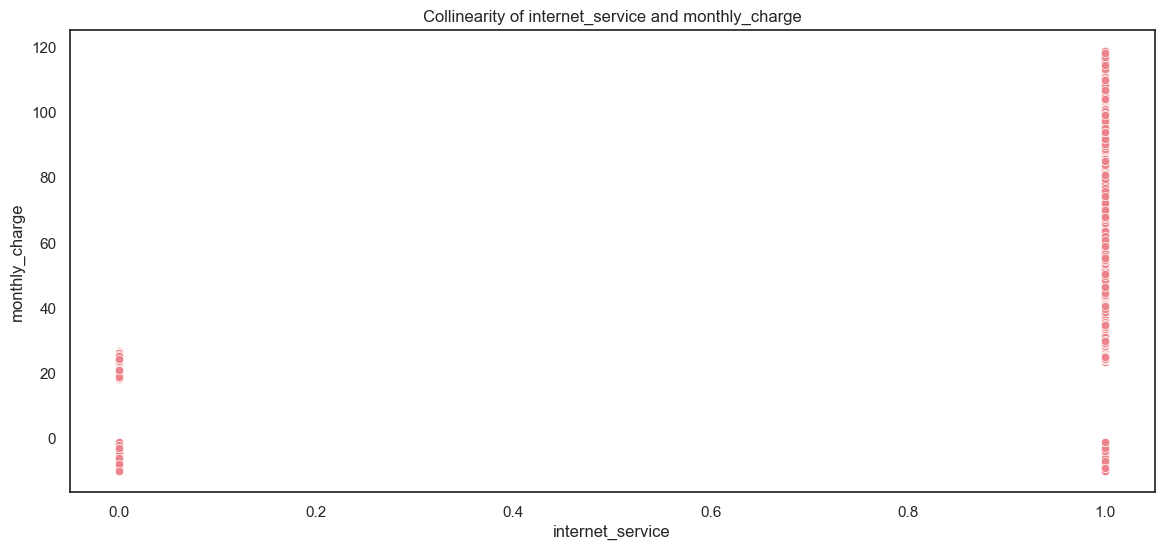

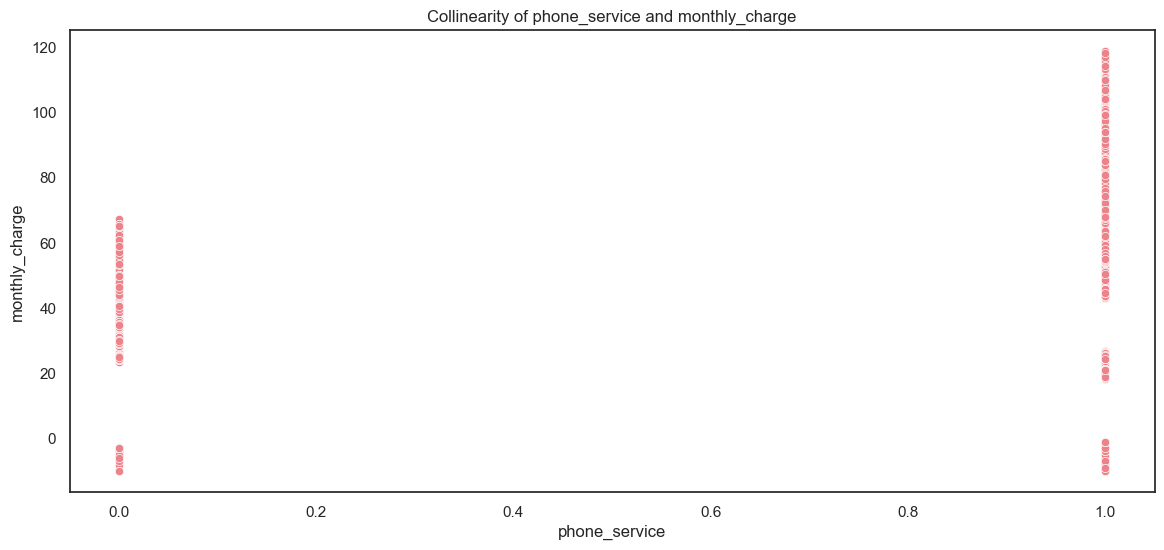

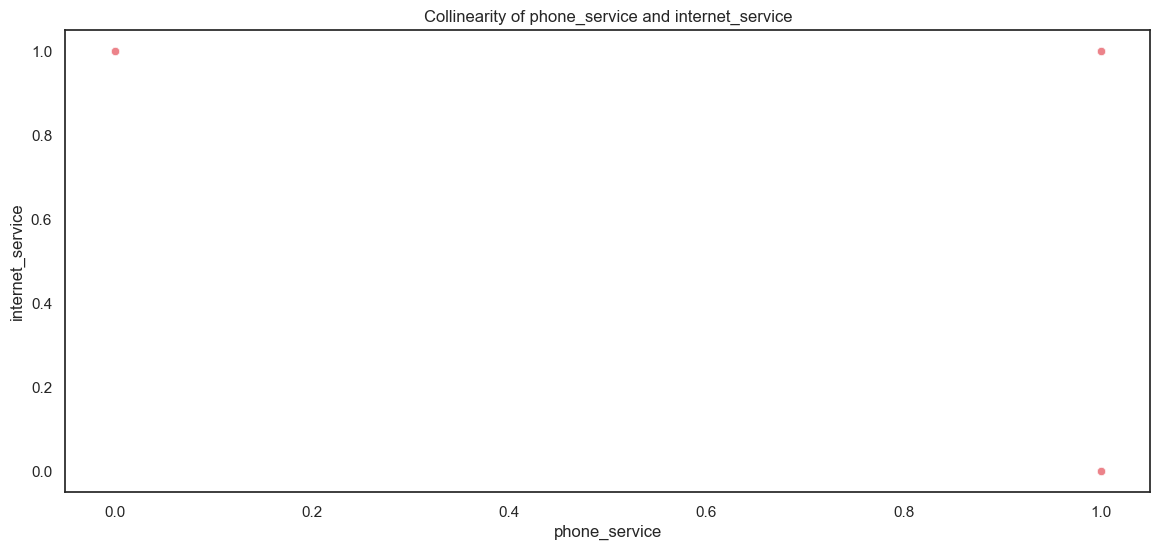

In [122]:
variables = ['monthly_charge', 'internet_service', 'phone_service']

for i in range(len(variables)):
    for j in range(len(variables)):
        if variables[i] == variables[j]:
            continue
        elif i < j:
            continue
        else:
            # print(variables[i], variables[j])
            plt.figure(figsize=(14, 6))
            sns.scatterplot(x=df[variables[i]], y=df[variables[j]], color=color[0])
            plt.title(f'Collinearity of {variables[i]} and {variables[j]}')
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.show()
        


In [123]:
df3 = df3.drop(columns = 'internet_service')
calc_vif(df3)

variables       VIF
0                              gender  1.962156
1                                 age  1.342506
2                             married  3.908843
3                number_of_dependents  1.534243
4                 number_of_referrals  2.664432
5                    tenure_in_months  6.056857
6                       phone_service  7.055868
7   avg_monthly_long_distance_charges  5.536799
8             avg_monthly_gb_download  3.452759
9                   paperless_billing  2.776400
10                     monthly_charge  6.968786
11                      total_refunds  1.066775
12           total_extra_data_charges  1.098914
13        total_long_distance_charges  5.021049

In [124]:
df = df.drop(columns = ['total_revenue', 'total_charges', 'internet_service'])
df.head()

customer_id  gender  age  married  number_of_dependents  \
0  0002-ORFBO       0    0        1                     0   
1  0003-MKNFE       1    0        0                     0   
2  0004-TLHLJ       1    0        0                     0   
3  0011-IGKFF       1    1        1                     0   
4  0013-EXCHZ       0    1        1                     0   

   number_of_referrals  tenure_in_months    offer  phone_service  \
0                    2                 9     None              1   
1                    0                 9     None              1   
2                    0                 4  Offer E              1   
3                    1                13  Offer D              1   
4                    3                 3     None              1   

   avg_monthly_long_distance_charges  ... streaming_music unlimited_data  \
0                              42.39  ...              No            Yes   
1                              10.69  ...             Yes             No   
2                              33.65  ...              No            Yes   
3                              27.82  ...              No            Yes   
4                               7.38  ...              No            Yes   

         contract paperless_billing   payment_method monthly_charge  \
0        One Year                 1      Credit Card           65.6   
1  Month-to-Month                 0      Credit Card           -4.0   
2  Month-to-Month                 1  Bank Withdrawal           73.9   
3  Month-to-Month                 1  Bank Withdrawal           98.0   
4  Month-to-Month                 1      Credit Card           83.9   

  total_refunds total_extra_data_charges total_long_distance_charges churn  
0          0.00                        0                      381.51     0  
1         38.33                       10                       96.21     0  
2          0.00                        0                      134.60     1  
3          0.00                        0                      361.66     1  
4          0.00                        0                       22.14     1  

[5 rows x 29 columns]

## 9. 범주형 데이터 인코딩
- 2개 이상의 고유 값이 있는 범주형 변수는 get_dummies 메서드를 사용하여 레이블 인코딩 및 원-핫 인코딩 처리했습니다.

In [125]:
df.head()

customer_id  gender  age  married  number_of_dependents  \
0  0002-ORFBO       0    0        1                     0   
1  0003-MKNFE       1    0        0                     0   
2  0004-TLHLJ       1    0        0                     0   
3  0011-IGKFF       1    1        1                     0   
4  0013-EXCHZ       0    1        1                     0   

   number_of_referrals  tenure_in_months    offer  phone_service  \
0                    2                 9     None              1   
1                    0                 9     None              1   
2                    0                 4  Offer E              1   
3                    1                13  Offer D              1   
4                    3                 3     None              1   

   avg_monthly_long_distance_charges  ... streaming_music unlimited_data  \
0                              42.39  ...              No            Yes   
1                              10.69  ...             Yes             No   
2                              33.65  ...              No            Yes   
3                              27.82  ...              No            Yes   
4                               7.38  ...              No            Yes   

         contract paperless_billing   payment_method monthly_charge  \
0        One Year                 1      Credit Card           65.6   
1  Month-to-Month                 0      Credit Card           -4.0   
2  Month-to-Month                 1  Bank Withdrawal           73.9   
3  Month-to-Month                 1  Bank Withdrawal           98.0   
4  Month-to-Month                 1      Credit Card           83.9   

  total_refunds total_extra_data_charges total_long_distance_charges churn  
0          0.00                        0                      381.51     0  
1         38.33                       10                       96.21     0  
2          0.00                        0                      134.60     1  
3          0.00                        0                      361.66     1  
4          0.00                        0                       22.14     1  

[5 rows x 29 columns]

In [126]:
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines', 'internet_type',
       'avg_monthly_gb_download', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charge',
       'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'churn'],
      dtype='object')

In [127]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['gender', 'age', 'married', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'phone_service', 'paperless_billing', 'total_extra_data_charges', 'churn'], float64: ['avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_refunds', 'total_long_distance_charges'], object: ['customer_id', 'offer', 'multiple_lines', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'payment_method']}

In [128]:
identity = df['customer_id']
df = df.drop(['customer_id'], axis = 1)
df.head()

gender  age  married  number_of_dependents  number_of_referrals  \
0       0    0        1                     0                    2   
1       1    0        0                     0                    0   
2       1    0        0                     0                    0   
3       1    1        1                     0                    1   
4       0    1        1                     0                    3   

   tenure_in_months    offer  phone_service  \
0                 9     None              1   
1                 9     None              1   
2                 4  Offer E              1   
3                13  Offer D              1   
4                 3     None              1   

   avg_monthly_long_distance_charges multiple_lines  ... streaming_music  \
0                              42.39             No  ...              No   
1                              10.69            Yes  ...             Yes   
2                              33.65             No  ...              No   
3                              27.82             No  ...              No   
4                               7.38             No  ...              No   

   unlimited_data        contract paperless_billing   payment_method  \
0             Yes        One Year                 1      Credit Card   
1              No  Month-to-Month                 0      Credit Card   
2             Yes  Month-to-Month                 1  Bank Withdrawal   
3             Yes  Month-to-Month                 1  Bank Withdrawal   
4             Yes  Month-to-Month                 1      Credit Card   

  monthly_charge total_refunds total_extra_data_charges  \
0           65.6          0.00                        0   
1           -4.0         38.33                       10   
2           73.9          0.00                        0   
3           98.0          0.00                        0   
4           83.9          0.00                        0   

  total_long_distance_charges churn  
0                      381.51     0  
1                       96.21     0  
2                      134.60     1  
3                      361.66     1  
4                       22.14     1  

[5 rows x 28 columns]

In [129]:
df = pd.get_dummies(df)
df = pd.concat([df, identity], axis = 1)
df.head()

gender  age  married  number_of_dependents  number_of_referrals  \
0       0    0        1                     0                    2   
1       1    0        0                     0                    0   
2       1    0        0                     0                    0   
3       1    1        1                     0                    1   
4       0    1        1                     0                    3   

   tenure_in_months  phone_service  avg_monthly_long_distance_charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   
2                 4              1                              33.65   
3                13              1                              27.82   
4                 3              1                               7.38   

   avg_monthly_gb_download  paperless_billing  ...  unlimited_data_No  \
0                     16.0                  1  ...                  0   
1                     10.0                  0  ...                  1   
2                     30.0                  1  ...                  0   
3                      4.0                  1  ...                  0   
4                     11.0                  1  ...                  0   

   unlimited_data_No Internet Service  unlimited_data_Yes  \
0                                   0                   1   
1                                   0                   0   
2                                   0                   1   
3                                   0                   1   
4                                   0                   1   

   contract_Month-to-Month  contract_One Year  contract_Two Year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   

   payment_method_Bank Withdrawal  payment_method_Credit Card  \
0                               0                           1   
1                               0                           1   
2                               1                           0   
3                               1                           0   
4                               0                           1   

   payment_method_Mailed Check  customer_id  
0                            0   0002-ORFBO  
1                            0   0003-MKNFE  
2                            0   0004-TLHLJ  
3                            0   0011-IGKFF  
4                            0   0013-EXCHZ  

[5 rows x 59 columns]

## 10. 데이터 분할

In [130]:
X = df.drop(columns = 'churn')
y = df['churn']

## 11. 데이터 분할

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 58) (5634,)
(1409, 58) (1409,)


## 12. 식별자 제거

In [132]:
train_identity = X_train['customer_id']
X_train = X_train.drop(['customer_id'], axis = 1)

test_identity = X_test['customer_id']
X_test = X_test.drop(['customer_id'], axis = 1)

## 13. 특징 조정 수행 (정규화)

In [133]:
scX = StandardScaler()
X_train2 = pd.DataFrame(scX.fit_transform(X_train))
X_train2.columns = X_train2.columns.values
X_train = X_train2

X_test2 = pd.DataFrame(scX.fit_transform(X_test))
X_test2.columns = X_test2.columns.values
X_test = X_test2

# C. 모델 선택

In [134]:
df.head()

gender  age  married  number_of_dependents  number_of_referrals  \
0       0    0        1                     0                    2   
1       1    0        0                     0                    0   
2       1    0        0                     0                    0   
3       1    1        1                     0                    1   
4       0    1        1                     0                    3   

   tenure_in_months  phone_service  avg_monthly_long_distance_charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   
2                 4              1                              33.65   
3                13              1                              27.82   
4                 3              1                               7.38   

   avg_monthly_gb_download  paperless_billing  ...  unlimited_data_No  \
0                     16.0                  1  ...                  0   
1                     10.0                  0  ...                  1   
2                     30.0                  1  ...                  0   
3                      4.0                  1  ...                  0   
4                     11.0                  1  ...                  0   

   unlimited_data_No Internet Service  unlimited_data_Yes  \
0                                   0                   1   
1                                   0                   0   
2                                   0                   1   
3                                   0                   1   
4                                   0                   1   

   contract_Month-to-Month  contract_One Year  contract_Two Year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   

   payment_method_Bank Withdrawal  payment_method_Credit Card  \
0                               0                           1   
1                               0                           1   
2                               1                           0   
3                               1                           0   
4                               0                           1   

   payment_method_Mailed Check  customer_id  
0                            0   0002-ORFBO  
1                            0   0003-MKNFE  
2                            0   0004-TLHLJ  
3                            0   0011-IGKFF  
4                            0   0013-EXCHZ  

[5 rows x 59 columns]

## 14-1. 기본 분류 알고리즘 : 1차

In [135]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0),
    'SVC': SVC(kernel='linear', random_state=0),
    'Kernel SVM': SVC(kernel='rbf', random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced', random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0),
    'XGBoost': XGBClassifier(tree_method='hist', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=0),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=0),
    'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced', random_state=0), n_estimators=10, random_state=0),
    'Voting': VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)),
                                           ('rf', RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced', random_state=0)), 
                                           ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))],
                               voting='soft')
}

In [136]:
accResults = []
aucResults = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
modelResults = pd.DataFrame(columns = col)

i = 0

for model_name, model in models.items():
    
    print(f"{model_name} 훈련 시작")
    
    kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 0) #, max_iter = 10000000)
    
    cvACCresults = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    cvAUCresults = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')

    accResults.append(cvACCresults)
    aucResults.append(cvAUCresults)
    names.append(model_name)
    
    modelResults.loc[i] = [model_name,
                            round(cvAUCresults.mean()*100, 2),
                            round(cvAUCresults.std()*100, 2),
                            round(cvACCresults.mean()*100, 2),
                            round(cvACCresults.std()*100, 2)
                           ]
    i += 1

# modelResults = modelResults(ignore_index = True)
modelResults.sort_values(by = ['ROC AUC Mean'], ascending=False)

Logistic Regression 훈련 시작
SVC 훈련 시작
Kernel SVM 훈련 시작
KNN 훈련 시작
Decision Tree 훈련 시작
Random Forest 훈련 시작
Gradient Boosting 훈련 시작
XGBoost 훈련 시작
LightGBM 훈련 시작
Bagging 훈련 시작
Voting 훈련 시작


Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
6     Gradient Boosting         90.82         1.22          84.68   
10               Voting         90.72         1.19          84.29   
8              LightGBM         90.27         1.17          82.37   
0   Logistic Regression         90.00         1.18          79.78   
1                   SVC         89.92         1.27          84.15   
9               Bagging         89.61         1.66          83.69   
5         Random Forest         89.51         1.51          83.67   
7               XGBoost         89.36         1.51          82.68   
2            Kernel SVM         88.59         1.23          83.90   
3                   KNN         81.21         1.92          78.43   
4         Decision Tree         73.60         3.10          79.09   

    Accuracy STD  
6           1.51  
10          1.33  
8           1.20  
0           1.64  
1           1.52  
9           1.76  
5           1.76  
7           1.89  
2           1.58  
3           1.43  
4           2.19

## 14-2. 분류 알고리즘 결과 비교표 시각화

### 14-2. 1. 정확도 이용

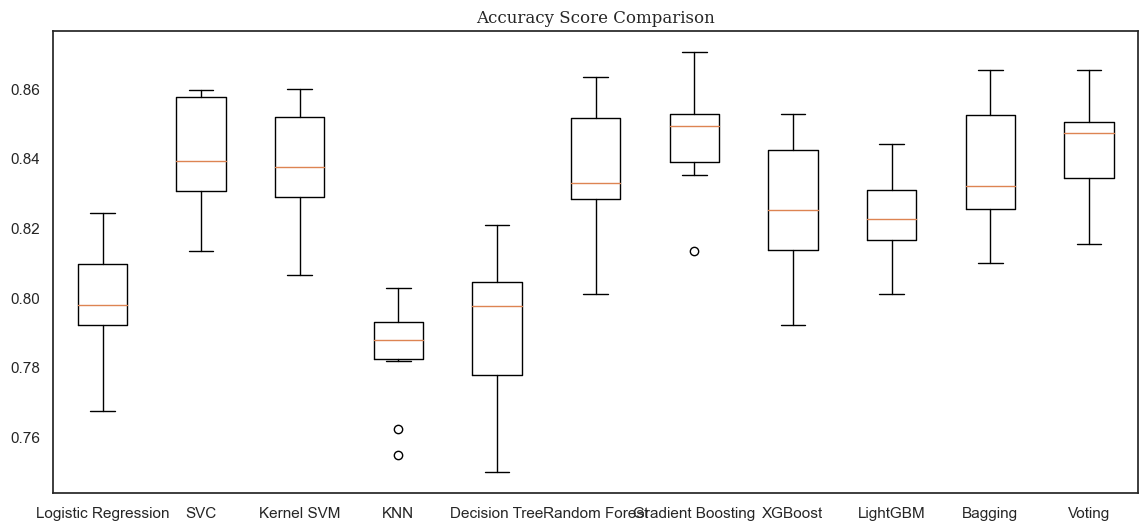

In [137]:
fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(111)
plt.boxplot(accResults)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison', fontfamily = 'serif')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()


### 14-2. 2. ROC 곡선 내 면적 이용

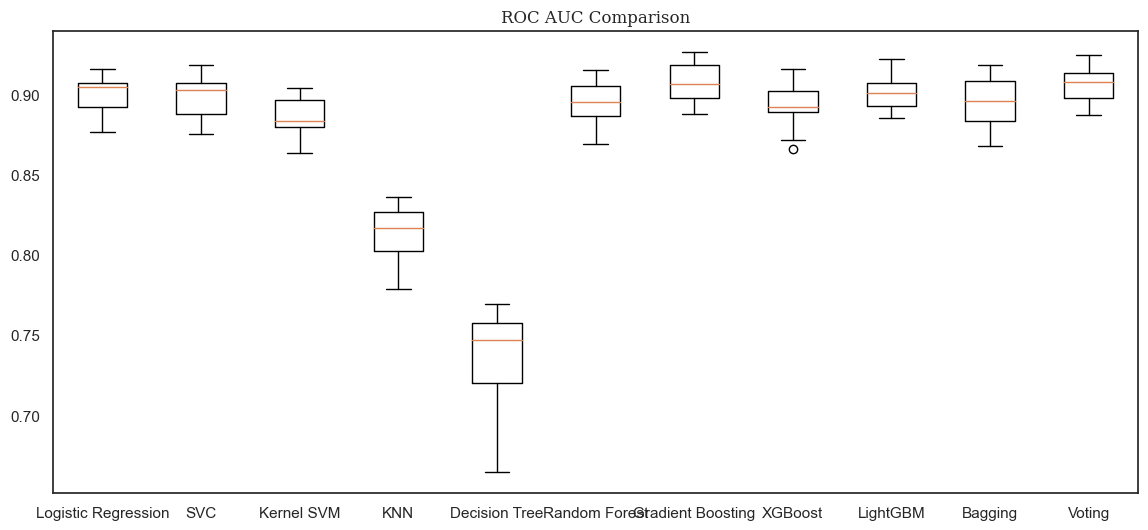

In [138]:
fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(111)
plt.boxplot(aucResults)
ax.set_xticklabels(names)

plt.title('ROC AUC Comparison', fontfamily = 'serif')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()


## 14-3. 파라미터 튜닝

### 14-3. 1. KNN : 최적의 이웃 수

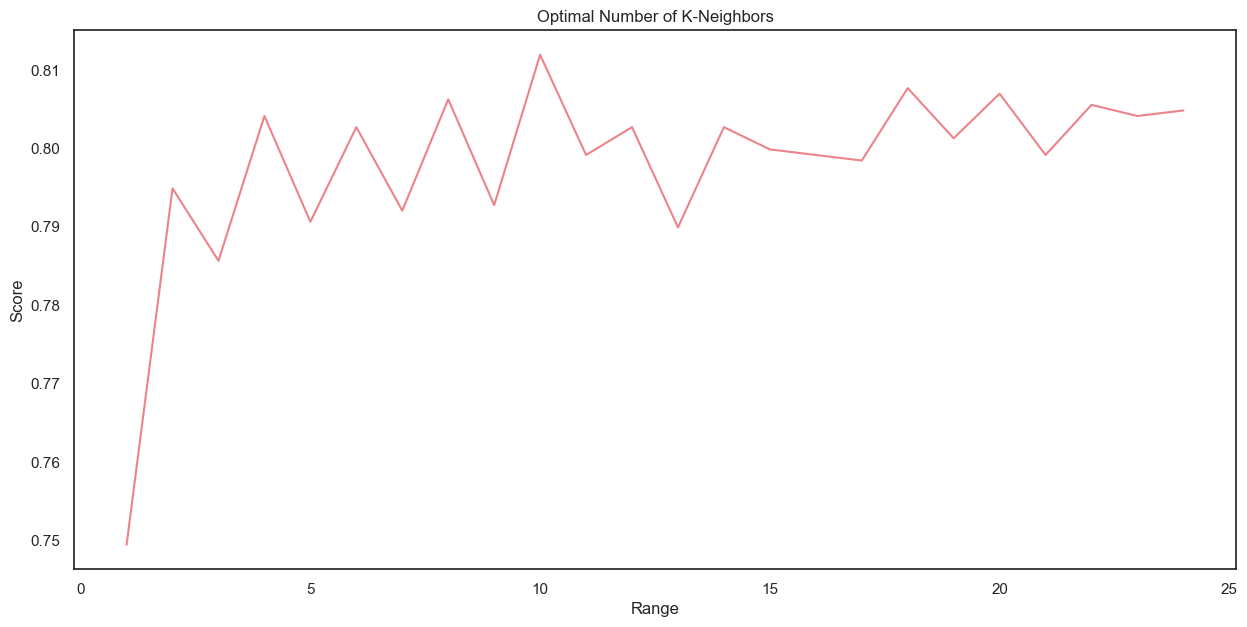

The optimal number of neighbors is 10 with an accuracy score of 0.8119


In [141]:
scoreArray = []
for each in range(1,25):
    knnLoop = KNeighborsClassifier(n_neighbors = each)
    knnLoop.fit(X_train, y_train)
    scoreArray.append(knnLoop.score(X_test,y_test))

optimalK = np.argmax(scoreArray) + 1

fig = plt.figure(figsize = (15, 7))
plt.plot(range(1, 25), scoreArray, color = color[0])
plt.xlabel('Range')
plt.ylabel('Score')
plt.title('Optimal Number of K-Neighbors')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

print(f"The optimal number of neighbors is {optimalK} with an accuracy score of {max(scoreArray):.4f}")

### 14-3. 2. RF : 최적의 트리 수

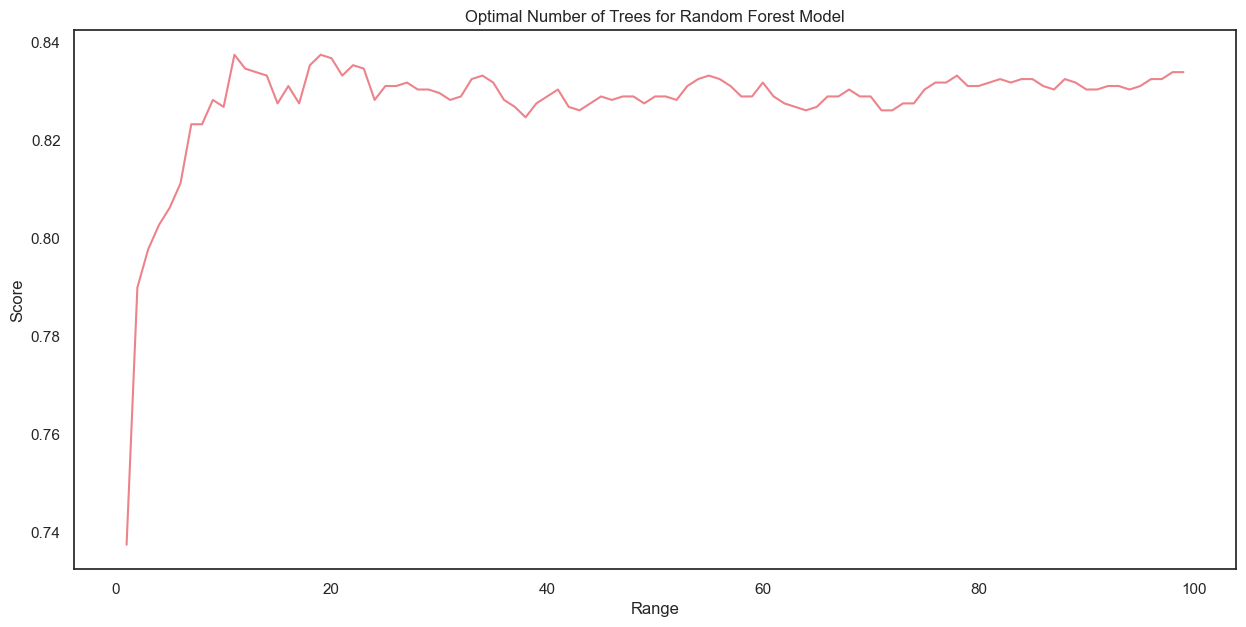

The optimal number of trees is 11 with an accuracy score of 0.8375


In [139]:
scoreArray = []
for each in range(1,100):
    # rfLoop = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced', random_state=0)
    rfLoop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rfLoop.fit(X_train, y_train)
    scoreArray.append(rfLoop.score(X_test,y_test))

optimalK = np.argmax(scoreArray) + 1

fig = plt.figure(figsize = (15, 7))
plt.plot(range(1, 100), scoreArray, color = color[0])
plt.xlabel('Range')
plt.ylabel('Score')
plt.title('Optimal Number of Trees for Random Forest Model')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

print(f"The optimal number of trees is {optimalK} with an accuracy score of {max(scoreArray):.4f}")

## 15. 기본 분류 알고리즘 : 2차

- 거짓음성(FN)이 거짓양성(FP)보다 비용이 더 큽니다.
- 거짓음성(FN)의 경우, 이탈할 고객을 이탈하지 않을 고객으로 예측하므로, 마케팅을 통해 고객을 잡아둘 수 있는 기회를 놓치고, 매출 손실로 이어질 수 있습니다.
- 거짓양성(FP)의 경우, 이탈하지 않을 고객을 이탈할 고객으로 예측하면서, 불필요한 마케팅 비용이 발생할 수 있으나, 실제로 고객이 이탈하지 않기 때문에 매출 손실로는 이어지지 않습니다.
- 1인당 마케팅 비용으로 인한 지출보다 매출 손실이 더 큽니다.
- 따라서, 고객 이탈 예측 모델에서는 거짓 음성을 최소화하는 것이 중요합니다. 이탈할 가능성이 있는 고객을 최대한 정확하게 예측하여 이탈을 방지하기 위해서 입니다. 이러한 이유로, 고객 이탈 예측에서는 거짓음성(FN)을 줄이기 위해 모델의 **민감도(재현율, recall)** 을 높이는 것이 중요합니다. 높은 재현율을 갖춘 모델은 실제 이탈 고객을 잘 찾아내어 이탈을 방지하는 데 도움이 됩니다.

- 정밀도: 긍정 클래스(고객이탈)로 예측한 샘플 중 실제 긍정 클래스인 샘플의 비율
- 재현율: 실제 긍정 클래스 샘플 중 긍정 클래스로 올바르게 예측한 샘플의 비율
- F2: 정밀도와 재현율의 조화 평균 계산, 재현율에 더 큰 비중을 두는 매트릭 (재현율을 정밀도보다 2배 더 중요하게 고려함)

In [144]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0),
    'SVC': SVC(kernel='linear', random_state=0),
    'Kernel SVM': SVC(kernel='rbf', random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2),
    'Random Forest': RandomForestClassifier(n_estimators=11, criterion='entropy', class_weight='balanced', random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0),
    'XGBoost': XGBClassifier(tree_method='hist', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=0),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=0),
    'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced', random_state=0), n_estimators=10, random_state=0),
    'Voting': VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)),
                                           ('rf', RandomForestClassifier(n_estimators=11, criterion='entropy', class_weight='balanced', random_state=0)), 
                                           ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))],
                               voting='soft')
}

In [145]:
accResults = []
precResults = []
recResults = []
f1Results = []
f2Results = []
# aucResults = []

names = []

col = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score']
modelResults = pd.DataFrame(columns = col)

i = 0

for model_name, model in models.items():

    print(f"{model_name} 훈련 시작")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)
    
    
    accResults.append(acc)
    precResults.append(prec)
    recResults.append(rec)
    f1Results.append(f1)
    f2Results.append(f2)
    names.append(model_name)
    
    modelResults.loc[i] = [model_name,
                           acc,
                           prec,
                           rec,
                           f1,
                           f2
                           ]
    i += 1

modelResults.sort_values(by = ['Precision', 'Recall', 'F2 Score'], ascending=False)

Logistic Regression 훈련 시작
SVC 훈련 시작
Kernel SVM 훈련 시작
KNN 훈련 시작
Random Forest 훈련 시작
Gradient Boosting 훈련 시작
XGBoost 훈련 시작
LightGBM 훈련 시작
Bagging 훈련 시작
Voting 훈련 시작


Model  Accuracy  Precision    Recall  F1 Score  F2 Score
5    Gradient Boosting  0.842441   0.745161  0.617647  0.675439  0.639535
8              Bagging  0.836764   0.743243  0.588235  0.656716  0.613839
2           Kernel SVM  0.833925   0.718750  0.614973  0.662824  0.633260
1                  SVC  0.834634   0.704348  0.649733  0.675939  0.659967
9               Voting  0.837473   0.688312  0.708556  0.698287  0.704413
4        Random Forest  0.811214   0.671975  0.564171  0.613372  0.582873
6              XGBoost  0.742370   0.657143  0.061497  0.112469  0.075114
3                  KNN  0.811923   0.656160  0.612299  0.633472  0.620596
7             LightGBM  0.824698   0.637744  0.786096  0.704192  0.751150
0  Logistic Regression  0.780696   0.559199  0.820856  0.665222  0.750611

1. Voting 모델은 F2 점수(0.703250)가 가장 높으며, 이는 재현율과 정밀도의 균형을 잘 맞추고 있다는 것을 의미합니다. 따라서, 거짓음성을 낮추고 이탈 고객을 잘 예측하기 위해서는 Voting 모델이 가장 적합할 것으로 보입니다.

2. Gradient Boosting 모델은 높은 정밀도(0.745161)를 보이지만, 재현율(0.617647)과 F2 점수(0.639535)가 상대적으로 낮습니다.

3. SVC 모델은 정밀도(0.704348), 재현율(0.649733), F2 점수(0.659967)에서 중간 정도의 성능을 보입니다.

4. 따라서, 거짓음성을 낮추면서도 정밀도, 재현율, F2 점수를 고려한 최적의 모델은 Voting 모델입니다.

## 15-1. 최종 분류 모델 비교 : 3차

In [148]:
models = {
    # 'Logistic Regression': LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0),
    'SVC': SVC(kernel='linear', random_state=0, probability=True),
    # 'Kernel SVM': SVC(kernel='rbf', random_state=0),
    # 'KNN': KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2),
    # 'Random Forest': RandomForestClassifier(n_estimators=11, criterion='entropy', class_weight='balanced', random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0),
    # 'XGBoost': XGBClassifier(tree_method='hist', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=0),
    # 'LightGBM': LGBMClassifier(class_weight='balanced', random_state=0),
    # 'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced', random_state=0), n_estimators=10, random_state=0),
    'Voting': VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)),
                                           ('rf', RandomForestClassifier(n_estimators=11, criterion='entropy', class_weight='balanced', random_state=0)), 
                                           ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))],
                               voting='soft')
}

SVC 훈련 시작
  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   SVC  0.834634   0.704348  0.649733  0.675939  0.659967
SVC Accuracy : 0.84 (+/- 0.04)


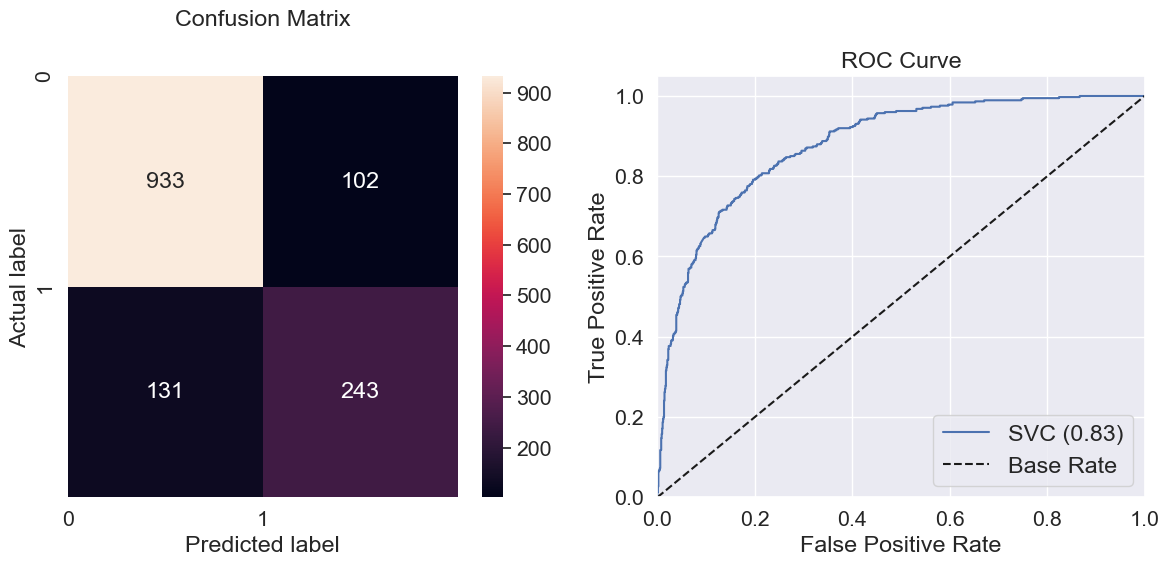

Gradient Boosting 훈련 시작
               Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Gradient Boosting  0.842441   0.745161  0.617647  0.675439  0.639535
Gradient Boosting Accuracy : 0.85 (+/- 0.04)


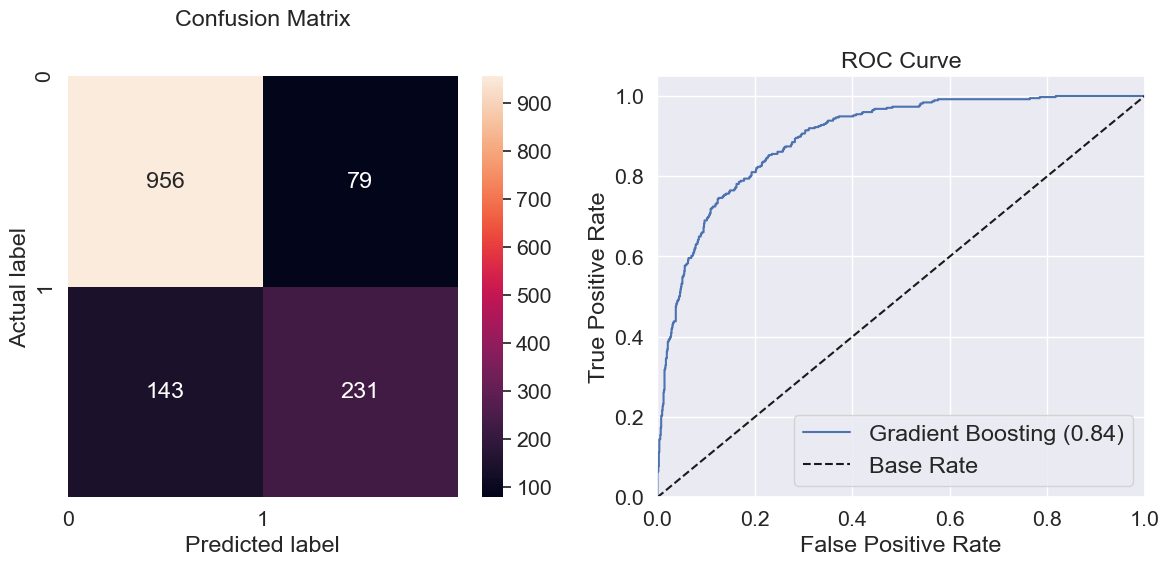

Voting 훈련 시작
    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Voting  0.837473   0.688312  0.708556  0.698287  0.704413
Voting Accuracy : 0.84 (+/- 0.04)


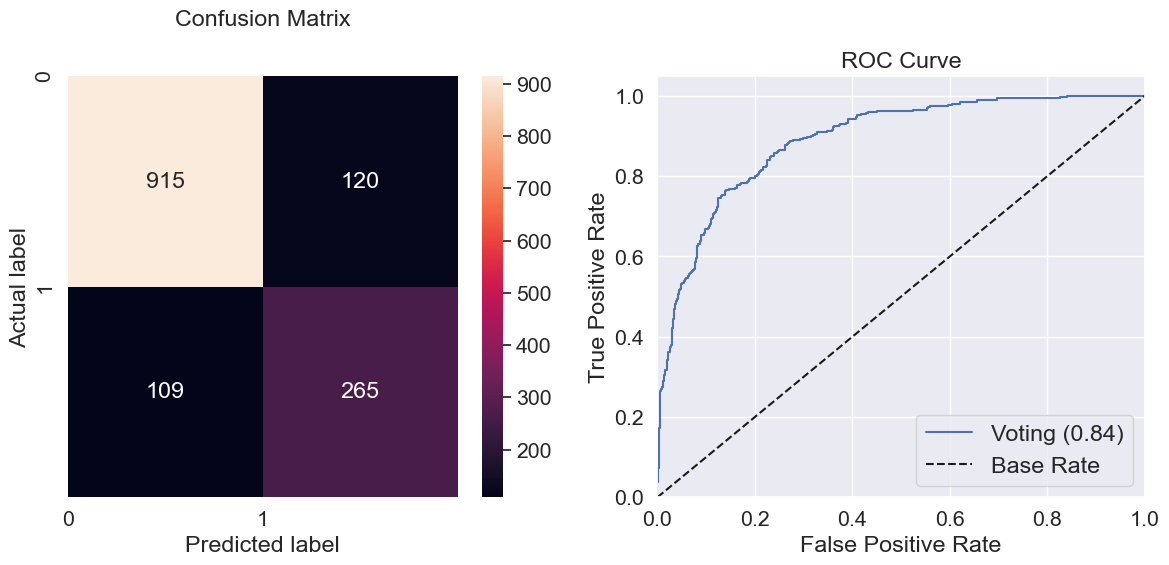

In [149]:
for model_name, model in models.items():

    print(f"{model_name} 훈련 시작")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
    print(results)

    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print(f"{model_name} Accuracy : {accuracies.mean():.2f} (+/- {accuracies.std() * 2:.2f})")
    
    cm = confusion_matrix(y_test, y_pred)
    dfCM = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
    sns.set(font_scale = 1.4)
    sns.heatmap(dfCM, annot = True, fmt = 'g', ax=ax1) #, camp = "YlGnBu")
    class_names = [0, 1]
    tick_marks = np.arange(len(class_names))
    # ax1.tight_layout()
    ax1.set_title('Confusion Matrix', y = 1.1)
    ax1.set_xticks(tick_marks)
    ax1.set_xticklabels(class_names)
    ax1.set_yticks(tick_marks)
    ax1.set_yticklabels(class_names)
    ax1.set_ylabel('Actual label')
    ax1.set_xlabel('Predicted label')
    
    probs = model.predict_proba(X_test)[:, 1]
    modelROCAUC = accuracy_score(y_test, y_pred)
    rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)

    ax2.plot(rf_fpr, rf_tpr, label = f'{model_name} ({modelROCAUC:.2f})')

    ax2.plot([0,1], [0,1], 'k--', label = 'Base Rate')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_ylabel('True Positive Rate')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_title('ROC Curve')
    ax2.legend(loc='lower right', fontsize='medium')
    plt.tight_layout()
    plt.show()

# D. 모델 평가

## 16. Voting

In [150]:
model = VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)),
                                     ('rf', RandomForestClassifier(n_estimators=49, criterion='entropy', class_weight='balanced', random_state=0)), 
                                     ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))
                                    ], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print(results)

    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Voting  0.838893   0.692913  0.705882  0.699338   0.70325


In [151]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(f"Voting Classifier Accuracy : {accuracies.mean():.2f} (+/- {accuracies.std() * 2:.2f})")

Voting Classifier Accuracy : 0.84 (+/- 0.04)


<Figure size 600x600 with 0 Axes>

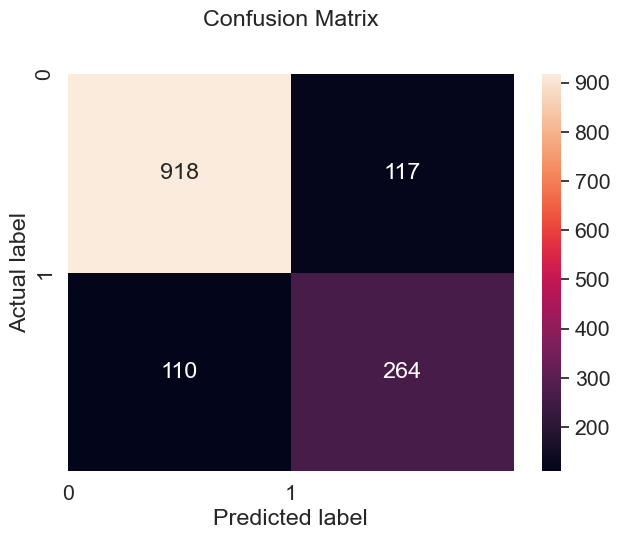

In [152]:
cm = confusion_matrix(y_test, y_pred)
dfCM = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (6,6))
fig, ax = plt.subplots()

sns.set(font_scale = 1.4)
sns.heatmap(dfCM, annot = True, fmt = 'g' ) #, camp = "YlGnBu")

class_names = [0, 1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

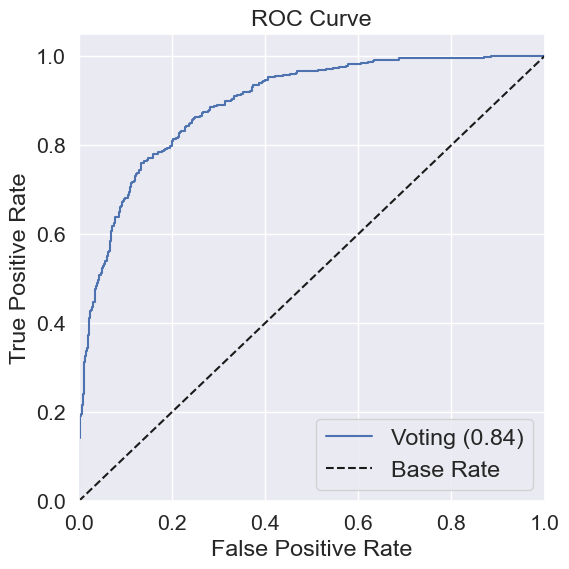

In [153]:
probs = model.predict_proba(X_test)[:, 1]
modelROCAUC = accuracy_score(y_test, y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize = (6,6))
plt.plot(rf_fpr, rf_tpr, label = f'{model_name} ({modelROCAUC:.2f})')

plt.plot([0,1], [0,1], 'k--', label = 'Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right', fontsize='medium')
plt.tight_layout()
plt.show()

## 17. 특성 중요도 예측
- Voting 모델 자체는 여러 개의 하위 모델들의 결정을 결합하는 앙상블 기법이다. 따라서 직접적으로 특성 중요도를 제공하지 않는다. 하지만 Voting 모델을 구성하는 하위모델은 각자 특성 중요도를 제공할 수 있다. 하위 모델의 특성 중요도를 확인한 후 이를 통합하여 분석하도록 한다.

In [154]:
X.columns[:-1]

Index(['gender', 'age', 'married', 'number_of_dependents',
       'number_of_referrals', 'tenure_in_months', 'phone_service',
       'avg_monthly_long_distance_charges', 'avg_monthly_gb_download',
       'paperless_billing', 'monthly_charge', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges', 'offer_None',
       'offer_Offer A', 'offer_Offer B', 'offer_Offer C', 'offer_Offer D',
       'offer_Offer E', 'multiple_lines_No', 'multiple_lines_No Phone Service',
       'multiple_lines_Yes', 'internet_type_Cable', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_No Internet Service',
       'online_security_No', 'online_security_No Internet Service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No Internet Service', 'online_backup_Yes',
       'device_protection_plan_No',
       'device_protection_plan_No Internet Service',
       'device_protection_plan_Yes', 'premium_tech_support_No',
       'premium_tech_su

In [155]:
X.head()

gender  age  married  number_of_dependents  number_of_referrals  \
0       0    0        1                     0                    2   
1       1    0        0                     0                    0   
2       1    0        0                     0                    0   
3       1    1        1                     0                    1   
4       0    1        1                     0                    3   

   tenure_in_months  phone_service  avg_monthly_long_distance_charges  \
0                 9              1                              42.39   
1                 9              1                              10.69   
2                 4              1                              33.65   
3                13              1                              27.82   
4                 3              1                               7.38   

   avg_monthly_gb_download  paperless_billing  ...  unlimited_data_No  \
0                     16.0                  1  ...                  0   
1                     10.0                  0  ...                  1   
2                     30.0                  1  ...                  0   
3                      4.0                  1  ...                  0   
4                     11.0                  1  ...                  0   

   unlimited_data_No Internet Service  unlimited_data_Yes  \
0                                   0                   1   
1                                   0                   0   
2                                   0                   1   
3                                   0                   1   
4                                   0                   1   

   contract_Month-to-Month  contract_One Year  contract_Two Year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   

   payment_method_Bank Withdrawal  payment_method_Credit Card  \
0                               0                           1   
1                               0                           1   
2                               1                           0   
3                               1                           0   
4                               0                           1   

   payment_method_Mailed Check  customer_id  
0                            0   0002-ORFBO  
1                            0   0003-MKNFE  
2                            0   0004-TLHLJ  
3                            0   0011-IGKFF  
4                            0   0013-EXCHZ  

[5 rows x 58 columns]

In [160]:
# 하위 모델 특성 중요도
lr = model.named_estimators_['lr']
lrImportance = np.abs(lr.coef_).flatten()
lrImportance

array([3.50708074e-02, 2.76342721e-01, 7.79123649e-01, 5.45197339e-01,
       1.56139462e+00, 6.65876741e-01, 6.24934160e-02, 1.84782313e-02,
       2.50176842e-02, 1.58771776e-01, 4.61360447e-01, 5.59787362e-02,
       2.79412526e-04, 9.36998625e-02, 2.13721377e-02, 1.72438087e-01,
       3.93032771e-02, 6.99193188e-02, 1.30850482e-01, 9.67693782e-02,
       6.05341647e-02, 6.24934160e-02, 2.35004601e-02, 7.12625544e-03,
       7.36093114e-02, 6.91823153e-02, 1.22569187e-02, 1.04273340e-01,
       1.22569187e-02, 1.04638704e-01, 2.54547227e-02, 1.22569187e-02,
       1.58791373e-02, 2.43879618e-03, 1.22569187e-02, 1.31395069e-02,
       8.04629241e-02, 1.22569187e-02, 7.75084140e-02, 5.83010367e-02,
       1.22569187e-02, 6.88369908e-02, 7.01287244e-02, 1.22569187e-02,
       6.00084380e-02, 1.11612889e-01, 1.22569187e-02, 1.26236302e-01,
       2.18608494e-02, 1.22569187e-02, 3.83871017e-03, 6.56950720e-01,
       3.71362722e-02, 7.04368011e-01, 7.66882484e-02, 1.58199038e-01,
      

In [176]:
featureImportance = pd.concat([
    pd.DataFrame(df.drop('customer_id', axis = 1).columns, columns = ['features']),
    pd.DataFrame(np.transpose(lr.coef_), columns = ['Logitic Regression'])
], axis = 1)
featureImportance.sort_values('Logitic Regression', ascending = False)

features  Logitic Regression
2                                      married            0.779124
51                          unlimited_data_Yes            0.656951
10                              monthly_charge            0.461360
1                                          age            0.276343
15                                  offer_None            0.172438
56                  payment_method_Credit Card            0.171323
9                            paperless_billing            0.158772
47         streaming_music_No Internet Service            0.126236
27           internet_type_No Internet Service            0.104273
19                               offer_Offer D            0.096769
13                 total_long_distance_charges            0.093700
36                  device_protection_plan_Yes            0.080463
54                           contract_Two Year            0.076688
42                            streaming_tv_Yes            0.070129
25                           internet_type_DSL            0.069182
41            streaming_tv_No Internet Service            0.068837
21                           multiple_lines_No            0.062493
30                         online_security_Yes            0.025455
22             multiple_lines_No Phone Service            0.023500
48                         streaming_music_Yes            0.021861
35  device_protection_plan_No Internet Service            0.013140
23                          multiple_lines_Yes            0.007126
12                    total_extra_data_charges           -0.000279
33                           online_backup_Yes           -0.002439
50          unlimited_data_No Internet Service           -0.003839
34                   device_protection_plan_No           -0.012257
49                           unlimited_data_No           -0.012257
37                     premium_tech_support_No           -0.012257
43                         streaming_movies_No           -0.012257
46                          streaming_music_No           -0.012257
40                             streaming_tv_No           -0.012257
28                          online_security_No           -0.012257
26                   internet_type_Fiber Optic           -0.012257
31                            online_backup_No           -0.012257
32           online_backup_No Internet Service           -0.015879
7            avg_monthly_long_distance_charges           -0.018478
14                                       churn           -0.021372
8                      avg_monthly_gb_download           -0.025018
0                                       gender           -0.035071
52                     contract_Month-to-Month           -0.037136
16                               offer_Offer A           -0.039303
11                               total_refunds           -0.055979
39                    premium_tech_support_Yes           -0.058301
44        streaming_movies_No Internet Service           -0.060008
20                               offer_Offer E           -0.060534
6                                phone_service           -0.062493
17                               offer_Offer B           -0.069919
24                         internet_type_Cable           -0.073609
38    premium_tech_support_No Internet Service           -0.077508
29         online_security_No Internet Service           -0.104639
45                        streaming_movies_Yes           -0.111613
18                               offer_Offer C           -0.130850
55              payment_method_Bank Withdrawal           -0.158199
3                         number_of_dependents           -0.545197
5                             tenure_in_months           -0.665877
53                           contract_One Year           -0.704368
4                          number_of_referrals           -1.561395
57                 payment_method_Mailed Check                 NaN

In [172]:
rf = model.named_estimators_['rf']
rfImportance = rf.feature_importances_
rfImportance

array([0.01462687, 0.01627584, 0.01200674, 0.03215969, 0.07875297,
       0.09333379, 0.00241492, 0.06333824, 0.04919363, 0.01499866,
       0.07955   , 0.00799624, 0.01092099, 0.07473299, 0.01114942,
       0.00252292, 0.00686031, 0.00375299, 0.00483703, 0.0086609 ,
       0.00945543, 0.00257053, 0.0081317 , 0.00529463, 0.00781744,
       0.01694714, 0.00222649, 0.02442209, 0.00494533, 0.01115279,
       0.00838451, 0.00709408, 0.00932873, 0.00939384, 0.00452049,
       0.00773593, 0.02582718, 0.00043963, 0.0077777 , 0.00742737,
       0.00154443, 0.00824748, 0.00601188, 0.0073046 , 0.00771146,
       0.00672652, 0.00157076, 0.0075255 , 0.00586271, 0.00320897,
       0.00580824, 0.06428153, 0.01754747, 0.05505172, 0.01031778,
       0.01648031, 0.00582049])

In [173]:
gb = model.named_estimators_['gb']
gbImportance = gb.feature_importances_

In [174]:
# 각 특성 중요도 데이터프레임화
features = X.columns[:-1]
importanceDF = pd.DataFrame({'Feature': features,
                            'Logistic Regression': lrImportance,
                            'Random Forest': rfImportance,
                            'Gradient Boosting': gbImportance
                            })

In [175]:
importanceDF

Feature  Logistic Regression  \
0                                       gender             0.035071   
1                                          age             0.276343   
2                                      married             0.779124   
3                         number_of_dependents             0.545197   
4                          number_of_referrals             1.561395   
5                             tenure_in_months             0.665877   
6                                phone_service             0.062493   
7            avg_monthly_long_distance_charges             0.018478   
8                      avg_monthly_gb_download             0.025018   
9                            paperless_billing             0.158772   
10                              monthly_charge             0.461360   
11                               total_refunds             0.055979   
12                    total_extra_data_charges             0.000279   
13                 total_long_distance_charges             0.093700   
14                                  offer_None             0.021372   
15                               offer_Offer A             0.172438   
16                               offer_Offer B             0.039303   
17                               offer_Offer C             0.069919   
18                               offer_Offer D             0.130850   
19                               offer_Offer E             0.096769   
20                           multiple_lines_No             0.060534   
21             multiple_lines_No Phone Service             0.062493   
22                          multiple_lines_Yes             0.023500   
23                         internet_type_Cable             0.007126   
24                           internet_type_DSL             0.073609   
25                   internet_type_Fiber Optic             0.069182   
26           internet_type_No Internet Service             0.012257   
27                          online_security_No             0.104273   
28         online_security_No Internet Service             0.012257   
29                         online_security_Yes             0.104639   
30                            online_backup_No             0.025455   
31           online_backup_No Internet Service             0.012257   
32                           online_backup_Yes             0.015879   
33                   device_protection_plan_No             0.002439   
34  device_protection_plan_No Internet Service             0.012257   
35                  device_protection_plan_Yes             0.013140   
36                     premium_tech_support_No             0.080463   
37    premium_tech_support_No Internet Service             0.012257   
38                    premium_tech_support_Yes             0.077508   
39                             streaming_tv_No             0.058301   
40            streaming_tv_No Internet Service             0.012257   
41                            streaming_tv_Yes             0.068837   
42                         streaming_movies_No             0.070129   
43        streaming_movies_No Internet Service             0.012257   
44                        streaming_movies_Yes             0.060008   
45                          streaming_music_No             0.111613   
46         streaming_music_No Internet Service             0.012257   
47                         streaming_music_Yes             0.126236   
48                           unlimited_data_No             0.021861   
49          unlimited_data_No Internet Service             0.012257   
50                          unlimited_data_Yes             0.003839   
51                     contract_Month-to-Month             0.656951   
52                           contract_One Year             0.037136   
53                           contract_Two Year             0.704368   
54              payment_method_Bank Withdrawal             0.076688   
55                  payment_method_Credit Card             0.15

In [177]:
# 각 모델 중요도 정규화 (비교할 수 있도록)
importanceDF['Logistic Regression'] = importanceDF['Logistic Regression'] / importanceDF['Logistic Regression'].sum()
importanceDF['Random Forest'] = importanceDF['Random Forest'] / importanceDF['Random Forest'].sum()
importanceDF['Gradient Boosting'] = importanceDF['Gradient Boosting'] / importanceDF['Gradient Boosting'].sum()

In [178]:
importanceDF['Voting'] = importanceDF[['Logistic Regression', 'Random Forest', 'Gradient Boosting']].mean(axis = 1)
importanceDF = importanceDF.sort_values(by='Voting', ascending = False)
importanceDF

Feature  Logistic Regression  \
51                     contract_Month-to-Month             0.077969   
4                          number_of_referrals             0.185312   
5                             tenure_in_months             0.079028   
10                              monthly_charge             0.054756   
3                         number_of_dependents             0.064706   
53                           contract_Two Year             0.083597   
1                                          age             0.032797   
2                                      married             0.092469   
13                 total_long_distance_charges             0.011121   
27                          online_security_No             0.012376   
7            avg_monthly_long_distance_charges             0.002193   
55                  payment_method_Credit Card             0.018776   
36                     premium_tech_support_No             0.009550   
8                      avg_monthly_gb_download             0.002969   
9                            paperless_billing             0.018844   
56                 payment_method_Mailed Check             0.020333   
52                           contract_One Year             0.004407   
25                   internet_type_Fiber Optic             0.008211   
29                         online_security_Yes             0.012419   
19                               offer_Offer E             0.011485   
15                               offer_Offer A             0.020466   
47                         streaming_music_Yes             0.014982   
18                               offer_Offer D             0.015530   
45                          streaming_music_No             0.013247   
0                                       gender             0.004162   
54              payment_method_Bank Withdrawal             0.009102   
41                            streaming_tv_Yes             0.008170   
44                        streaming_movies_Yes             0.007122   
20                           multiple_lines_No             0.007184   
38                    premium_tech_support_Yes             0.009199   
24                           internet_type_DSL             0.008736   
42                         streaming_movies_No             0.008323   
11                               total_refunds             0.006644   
39                             streaming_tv_No             0.006919   
16                               offer_Offer B             0.004665   
14                                  offer_None             0.002537   
12                    total_extra_data_charges             0.000033   
17                               offer_Offer C             0.008298   
30                            online_backup_No             0.003021   
22                          multiple_lines_Yes             0.002789   
32                           online_backup_Yes             0.001885   
21             multiple_lines_No Phone Service             0.007417   
33                   device_protection_plan_No             0.000289   
6                                phone_service             0.007417   
48                           unlimited_data_No             0.002595   
35                  device_protection_plan_Yes             0.001559   
43        streaming_movies_No Internet Service             0.001455   
31           online_backup_No Internet Service             0.001455   
23                         internet_type_Cable             0.000846   
28         online_security_No Internet Service             0.001455   
50                          unlimited_data_Yes             0.000456   
34  device_protection_plan_No Internet Service             0.001455   
49          unlimited_data_No Internet Service             0.001455   
26           internet_type_No Internet Service             0.001455   
46         streaming_music_No Internet Service             0.001455   
40            streaming_tv_No Internet Service             0.00

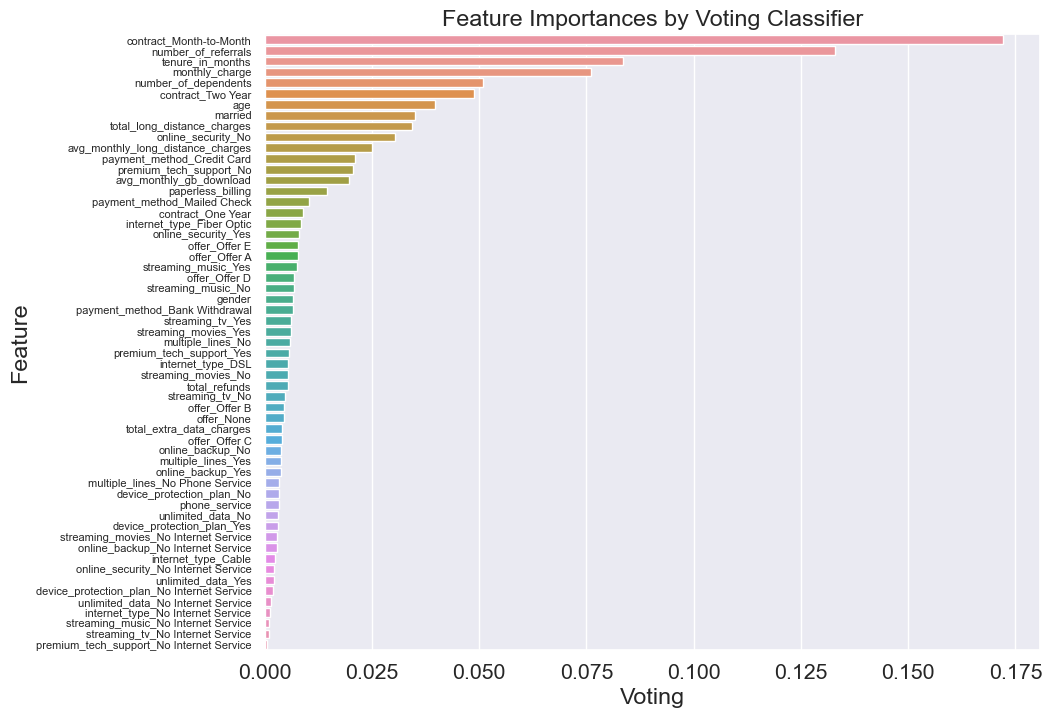

In [179]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Voting', y='Feature', data=importanceDF)
plt.title('Feature Importances by Voting Classifier')
plt.yticks(fontsize = 8)
plt.show()

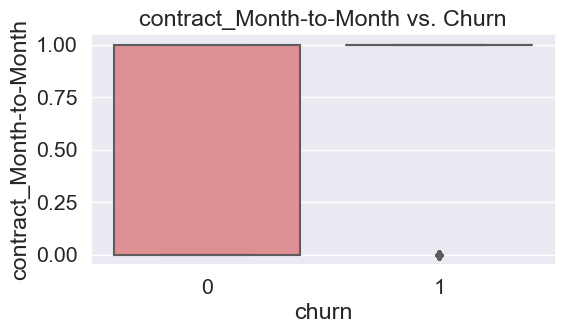

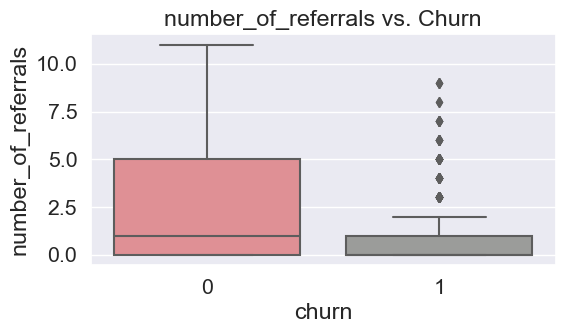

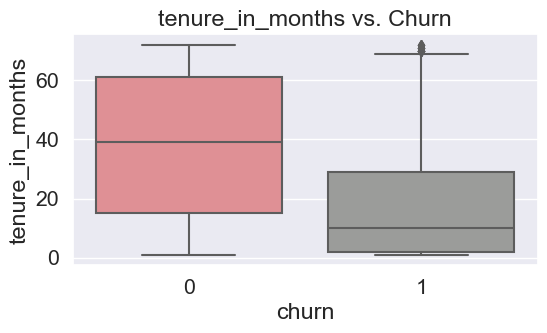

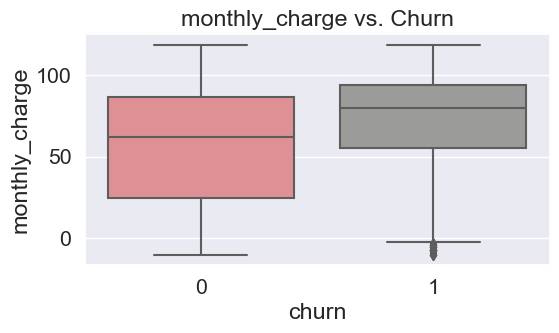

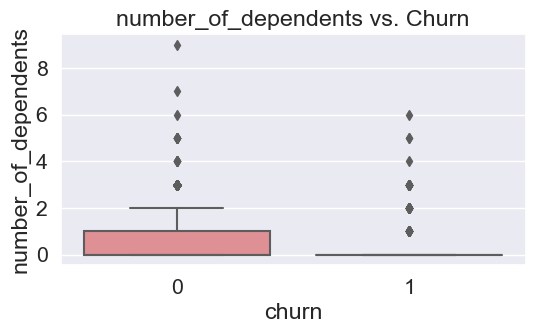

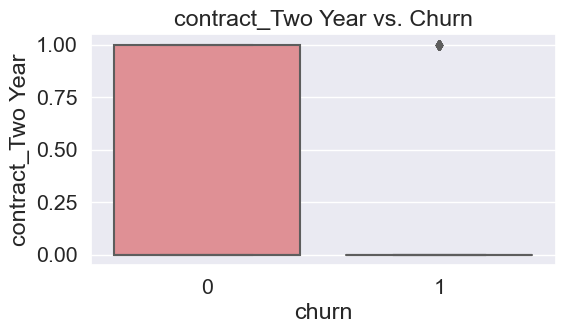

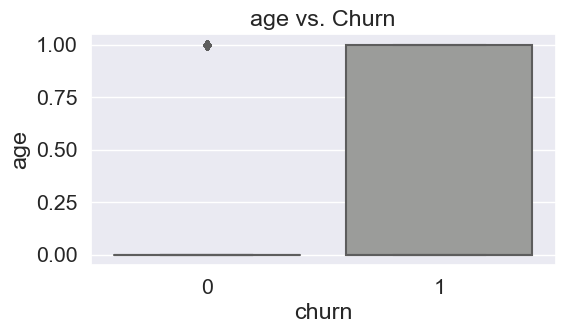

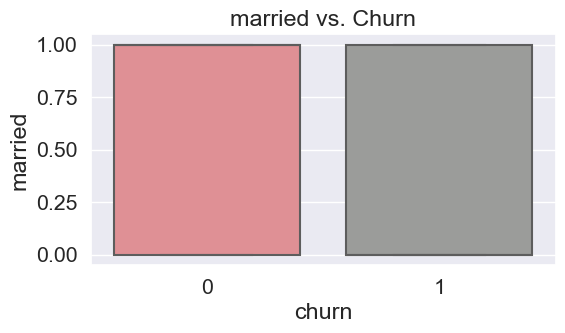

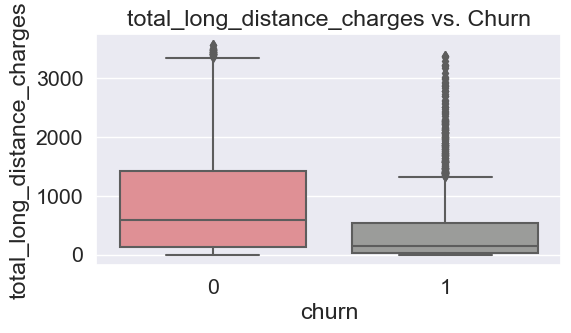

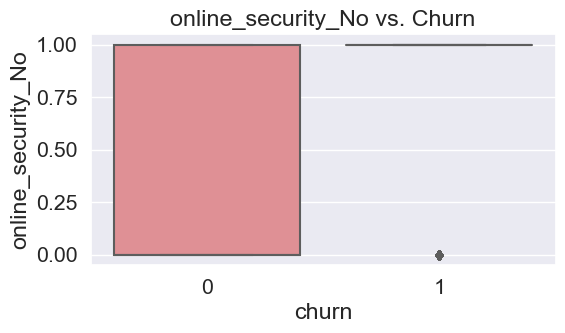

In [180]:
# 중요도 상위 특징이 이탈 여부와 어떤 관계를 가지는지 확인
topFeatures = importanceDF.head(10)['Feature'].tolist()
for feature in topFeatures:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=y_train, y=X[feature], palette = color)
    plt.title(f'{feature} vs. Churn')
    plt.show()

1. contract_Month-to-Month vs. Churn : 월간 계약을 하는 고객이 이탈할 가능성이 매우 높습니다. 이탈하지 않은 고객은 거의 모두 월간 계약을 하지 않는 반면, 이탈한 고객 중 대부분이 월간 계약을 하고 있습니다.
2. number_of_referrals vs. Churn : 이탈하지 않은 고객이 더 많은 추천 횟수를 가지고 있습니다. 추천 횟수가 많을수록 이탈할 가능성이 낮아지는 경향이 있습니다.
3. tenure_in_months vs. Churn : 이탈하지 않은 고객은 회사에 더 오랜 기간 머무르는 반면, 이탈한 고객은 비교적 짧은 기간 동안만 머문 경향이 있습니다. 즉, 회사와의 계약 기간이 짧은 고객일수록 이탈할 가능성이 높습니다.
4. monthly_charge vs. Churn : 이탈한 고객의 월 청구 금액이 더 높은 경향이 있습니다. 즉, 월 청구 금액이 높은 고객일수록 이탈할 가능성이 높아집니다.
5. number_of_dependents vs. Churn : 이탈하지 않은 고객은 부양가족 수가 더 많은 경향이 있습니다. 부양가족 수가 많을수록 이탈할 가능성이 낮아집니다.
6. contract_Two Year vs. Churn : 2년 계약을 하는 고객은 거의 이탈하지 않습니다. 2년 계약을 맺은 고객은 이탈할 가능성이 매우 낮습니다.
7. married vs. Churn : 결혼 여부와 이탈 여부 간에는 큰 차이가 없는 것으로 보이나, 미혼인 경우에 기혼인 경우보다 이탈률이 두 배 가량 높습니다. 즉, 미혼인 고객일수록 이탈할 가능성이 높습니다.
8. age vs. Churn : 이탈한 고객의 나이가 더 높은 경향이 있습니다. 나이가 많은 고객일수록 이탈할 가능성이 높아집니다.
9. total_long_distance_charges vs. Churn : 이탈하지 않은 고객은 총 장거리 통화 요금이 더 높은 경향이 있습니다. 장거리 통화 요금이 높은 고객일수록 이탈할 가능성이 낮아집니다.
10. premium_tech_support_No vs. Churn : 프리미엄 기술 지원을 받지 않는 고객이 이탈할 가능성이 매우 높습니다. 프리미엄 기술 지원을 받지 않는 고객이 이탈하는 비율이 높습니다.

이 결과를 종합적으로 분석해보면, 고객 이탈을 줄이기 위해서는 월간 계약을 장기 계약으로 유도하고, 고객의 추천을 장려하며, 프리미엄 기술 지원을 제공하는 등의 전략을 고려할 수 있습니다.

In [181]:
from scipy.stats import chi2_contingency

contingencyTable = pd.crosstab(y_train, X['married'])
chi2, p, dof, ex = chi2_contingency(contingencyTable)
print(f"Chi-Squared Test Statistics: {chi2}")
print(f"P-value: {p}")
if p > 0.05:
    print("married 변수는 이탈 여부와 독립적입니다")
else:
    print("married 변수는 이탈 여부와 유의미한 관계가 있습니다.")

Chi-Squared Test Statistics: 128.87508933836702
P-value: 7.222351253384384e-30
married 변수는 이탈 여부와 유의미한 관계가 있습니다.


# E. 모델개선

## 18-1.하이퍼 파라미터 튜닝

In [182]:
def scoring(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    
    return f1, f2, acc, prec, rec, rocauc

In [184]:

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear'],
                'class_weight': ['balanced']}
gs = GridSearchCV(LogisticRegression(random_state=0), param_grid_lr, cv = 10, scoring ='roc_auc')
gs.fit(X_train, y_train)

bestLR = gs.best_estimator_
print(f'Best parameters for Logistic Regression: {gs.best_params_}')

f1, f2, acc, prec, rec, rocauc = scoring(bestLR, X_train, y_train, X_test, y_test)

print(f"Best model       : {bestLR}")
print(f"Best score       : {gs.best_score_}")
print(f"ROC AUC Score    : {rocauc}")
print(f"Accuracy Score   : {acc}")
print(f"precision        : {prec}")
print(f"Recall           : {rec}")
print(f"F1 Score         : {f1}")
print(f"F2 Score         : {f2}")

Best parameters for Logistic Regression: {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best model       : LogisticRegression(C=100, class_weight='balanced', random_state=0,
                   solver='liblinear')
Best score       : 0.9000980616586747
ROC AUC Score    : 0.7940026867136841
Accuracy Score   : 0.7814052519517388
precision        : 0.5602189781021898
Recall           : 0.820855614973262
F1 Score         : 0.665943600867679
F2 Score         : 0.7509784735812133


In [186]:
param_grid_rf = {'max_depth': [10, 20, 30, None],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'class_weight': ['balanced'],
                 'n_estimators': [11, 49, 92],
                 'criterion': ['entropy']
                }

gs = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv = 10, n_jobs = -1, scoring ='roc_auc')
gs.fit(X_train, y_train)

bestRF = gs.best_estimator_
print(f'Best parameters for Random Forest: {gs.best_params_}')

f1, f2, acc, prec, rec, rocauc = scoring(bestRF, X_train, y_train, X_test, y_test)

print(f"Best model       : {bestRF}")
print(f"Best score       : {gs.best_score_}")
print(f"ROC AUC Score    : {rocauc}")
print(f"Accuracy Score   : {acc}")
print(f"precision        : {prec}")
print(f"Recall           : {rec}")
print(f"F1 Score         : {f1}")
print(f"F2 Score         : {f2}")

Best parameters for Random Forest: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best model       : RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       random_state=0)
Best score       : 0.9003452796959645
ROC AUC Score    : 0.7951497067865354
Accuracy Score   : 0.8282469836763662
precision        : 0.6609756097560976
Recall           : 0.7245989304812834
F1 Score         : 0.6913265306122449
F2 Score         : 0.710912906610703


In [192]:
rs = RandomizedSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, n_iter=50, cv=10, scoring='balanced_accuracy', random_state=0)
rs.fit(X_train, y_train)

bestRF2 = rs.best_estimator_
print(f'Best parameters for Random Forest: {rs.best_params_}')

f1, f2, acc, prec, rec, rocauc = scoring(bestRF2, X_train, y_train, X_test, y_test)

print(f"Best model       : {bestRF}")
print(f"Best score       : {rs.best_score_}")
print(f"ROC AUC Score    : {rocauc}")
print(f"Accuracy Score   : {acc}")
print(f"precision        : {prec}")
print(f"Recall           : {rec}")
print(f"F1 Score         : {f1}")
print(f"F2 Score         : {f2}")

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best model       : RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       random_state=0)
Best score       : 0.8195946657597852
ROC AUC Score    : 0.7972835774626055
Accuracy Score   : 0.801277501774308
precision        : 0.594758064516129
Recall           : 0.7887700534759359
F1 Score         : 0.6781609195402298
F2 Score         : 0.7404618473895582


In [196]:
bestRF

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       random_state=0)

In [194]:
bestRF2

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, random_state=0)

In [197]:
param_grid_gb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=0), param_grid_gb, n_iter=50, n_jobs = -1, cv = 10, scoring ='balanced_accuracy')
rs.fit(X_train, y_train)
# gs = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid_gb, cv = 10, scoring ='roc_auc')
# gs.fit(X_train, y_train)

bestGB2 = rs.best_estimator_
print(f'Best parameters for Gradient Boosting: {rs.best_params_}')

f1, f2, acc, prec, rec, rocauc = scoring(bestGB2, X_train, y_train, X_test, y_test)

print(f"Best model       : {bestGB2}")
print(f"Best score       : {rs.best_score_}")
print(f"ROC AUC Score    : {rocauc}")
print(f"Accuracy Score   : {acc}")
print(f"precision        : {prec}")
print(f"Recall           : {rec}")
print(f"F1 Score         : {f1}")
print(f"F2 Score         : {f2}")

Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Best model       : GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=4,
                           random_state=0, subsample=0.8)
Best score       : 0.7887762193893167
ROC AUC Score    : 0.7704345242708415
Accuracy Score   : 0.8396025550035486
precision        : 0.7327044025157232
Recall           : 0.6229946524064172
F1 Score         : 0.6734104046242775
F2 Score         : 0.6422271223814774


## 18-2. 최종 튜닝

In [199]:
voting_clf = VotingClassifier(estimators=[
                                            ('lr', bestLR),
                                            ('rf', bestRF),
                                            ('gb', bestGB2)
                                         ], voting='soft', weights = [3, 3, 4])

param_grid_voting = {
    'lr__C': [0.1, 1, 10],
    'rf__n_estimators': [100, 200],
    'voting': ['hard', 'soft']
}

gsVoting = GridSearchCV(voting_clf, param_grid_voting, cv=5, scoring='roc_auc')
gsVoting.fit(X_train, y_train)

bestVoting = gsVoting.best_estimator_
print(f'Best parameters for Voting Classifier: {gsVoting.best_params_}')

f1, f2, acc, prec, rec, rocauc = scoring(bestVoting, X_train, y_train, X_test, y_test)

print(f"Best model       : {bestVoting}")
print(f"Best score       : {rs.best_score_}")
print(f"ROC AUC Score    : {rocauc}")
print(f"Accuracy Score   : {acc}")
print(f"precision        : {prec}")
print(f"Recall           : {rec}")
print(f"F1 Score         : {f1}")
print(f"F2 Score         : {f2}")


Best parameters for Voting Classifier: {'lr__C': 10, 'rf__n_estimators': 200, 'voting': 'soft'}
Best model       : VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight='balanced',
                                                 random_state=0,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=0)),
                             ('gb',
                              GradientBoostingClassi

In [202]:
bestVoting.fit(X_train, y_train)
y_pred = bestVoting.predict(X_test)
y_pred_probs = bestVoting.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1035
           1       0.68      0.72      0.70       374

    accuracy                           0.84      1409
   macro avg       0.79      0.80      0.79      1409
weighted avg       0.84      0.84      0.84      1409

[[908 127]
 [104 270]]


## 19. 테스트 세트 예측값 비교

[[908 127]
 [104 270]]
Test Data Accuracy : 0.8361


<Figure size 1200x1200 with 0 Axes>

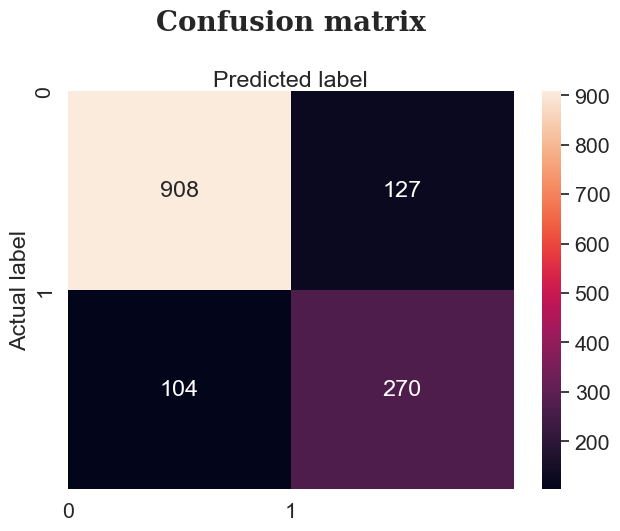

In [203]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

pd.crosstab(y_test, pd.Series(y_pred), rownames = ['ACTUAL'], colnames = ['PRED'])

df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (12,12))
fig, ax = plt.subplots()
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 20, fontfamily = 'serif', fontweight = 'bold')
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(f"Test Data Accuracy : {accuracy_score(y_test, y_pred):.4f}")

## 20. 최종 결과

In [206]:
final = pd.concat([test_identity, y_test], axis = 1).dropna()

final['predictions'] = y_pred
final['propensity_to_churn(%)'] = y_pred_probs
final['propensity_to_churn(%)'] = final['propensity_to_churn(%)'] * 100
final['propensity_to_churn(%)'] = final['propensity_to_churn(%)'].round(2)

final = final[['customer_id', 'churn', 'predictions', 'propensity_to_churn(%)']]
final['ranking'] = pd.qcut(final['propensity_to_churn(%)'].rank(method = 'first'), 10, labels = range(10, 0, -1))
final

customer_id  churn  predictions  propensity_to_churn(%) ranking
539   0794-YVSGE      0            0                    0.39      10
3026  4325-NFSKC      1            1                   72.05       2
5238  7379-POKDZ      1            1                   86.89       1
237   0365-BZUWY      0            1                   83.24       1
3697  5204-HMGYF      0            0                    2.36       9
...          ...    ...          ...                     ...     ...
5585  7861-UVUFT      1            1                   88.71       1
2095  3005-NFMTA      1            1                   57.40       3
2612  3721-WKIIL      0            0                    3.67       8
328   0486-LGCCH      0            0                    1.08      10
349   0516-QREYC      0            0                    2.43       9

[1409 rows x 5 columns]

In [207]:
final.to_csv('finalResult.csv', index = False)

In [208]:
# filename = 'final_model.model'
# i = [bestVoting]
# joblib.dump(i, filename)

NameError: name 'joblib' is not defined